

# <font size="+3"><span style='color:#2994ff'> **P7 - Implémentez un modèle de scoring** </span></font>


<a id='LOADING_LIBRARIES'></a>

---

---

<font size="+1"> **LOADING THE LIBRARIES** </font>

---

In [1]:

# ----------------
# Packages Update
# ----------------
# !pip install --upgrade pip
# !pip install phik
# !pip install pycodestyle
# !pip install flake8 pycodestyle_magic

# General libraries
import sys
import os
import glob
import pandas as pd
import numpy as np
import csv
import time
import datetime
import tools_dataframe
import EDA_kernel_kaggle


# Data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



# Validation code PEP8
# %load_ext pycodestyle_magic
# %pycodestyle_on

# Warnings
# import warnings
# from warnings import simplefilter
# warnings.filterwarnings(action='once')
# simplefilter(action='ignore', category=FutureWarning)
# simplefilter(action='ignore', category=ValueError)
# simplefilter(action='ignore', category=UserWarning)

# Versions
print('Version of used libraries :')

print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Dataframe tools      : ' + tools_dataframe.__version__)
print('EDA KERNEL KAGGLE     : ' + EDA_kernel_kaggle.__version__)
now = datetime.datetime.now().isoformat()
print('Launched on : ' + now)

Version of used libraries :
Python                : 3.9.13 (main, Aug 25 2022, 23:26:10) 
[GCC 11.2.0]
NumPy                 : 1.23.5
Pandas                : 1.5.3
Dataframe tools      : 0.0.0
EDA KERNEL KAGGLE     : 0.0.0
Launched on : 2023-06-08T14:56:01.176952



<a id='USED_PARAMETERS'></a>


<br>


---
---

<font size="+1"> **PARAMETERS USED IN THIS NOTEBOOK** </font>

---


In [2]:
# Parameters used in this notebook

seed = 84

palette4 = ["#253d85", "#618576", "#cba87d", "#faec4d"]

palette5 = ["#253d85", "#618576", "#9595b1", "#cba87d", "#faec4d"]

palette6 = ["#253d85", "#618576", "#9595b1", "#cba87d", "#dcd2a3", "#faec4d"]


<a id='USED_FUNCTIONS'></a>


<br>


---
---

<font size="+1"> **FUNCTIONS USED IN THIS NOTEBOOK** </font>

---



<font size="+3"><span style='color:#2994ff'> **P7 - Implémentez un modèle de scoring** </span></font>

Loans are an important part of people’s lives. Each individual has different reasons for borrowing a loan. It could be to buy a dream car or a home, to set up a business, or to buy some products. Even wealthy people prefer taking loans overspending their cash so as to get tax benefits and to keep the cash available for future unexpected and unconventional expenses.

Loans are also as important to Lenders as they are for Borrowers. Almost all Banking Organizations make most of their revenues from the interests generated through loans. However, the caveat here is that the lenders make a profit only if the loan gets repaid. The Lending Organizations are faced with the tough task of analyzing the risk associated with each client. Therefore, it is important to identify the risky behaviors of clients and make educated decisions.


<center><img src="./img/logo_projet.png" style="height: 250px;"/></center>

**Prêt à dépenser** wants to implement a **credit scoring tool to calculate the probability of a customer repaying their loan**, and then **classify the application as either granted or refused credit**. It therefore wants to develop a classification algorithm based on a variety of data sources (behavioural data, data from other financial institutions, etc.).

In addition, customer relationship managers have pointed out that customers are increasingly demanding transparency in credit granting decisions. This demand for transparency from customers is entirely in line with the values that the company wishes to embody.

Prêt à dépenser therefore decided to **develop an interactive dashboard** so that customer relations managers could explain credit granting decisions as transparently as possible, but also allow their customers to access and explore their personal information easily.

**Objectives:**
* The main objective is to **identify the potential Defaulters** based on the given data about the applicants.
* The **probability of classification** is essential because we want to be very sure when we classify someone as a Non-Defaulter, as the cost of making a mistake can be very high to the company.

**Constraints:**
* **Interpretability is important** for classifying someone as a Defaulter or not.
* **No strict latency constraint**, as the objective is more about making the right decision rather than a quick decision. It would be fine and acceptable if the model takes few seconds to make a prediction.
* The **cost of making an error** can be very high. This is due to the large amounts of funds associated with each loan. We do not want the model to miss out on potential defaulters which could incur huge financial losses to the organization.


---
---

**This notebook** includes **data cleaning and exploratory analysis**.<br>



## <font color = '#0085dd'>**Table of content**</font>


[Librairies loading](#LOADING_LIBRARIES)<br>

[Functions used in this notebook](#USED_FUNCTIONS)<br>

---

[**Datasets**](#datasets)
 * [Description](#datasets_description)
   * [orders_dataset](#orders_dataset)
   * [customers_dataset](#customers_dataset)
   * [order_items](#order_items)
   * [products_dataset](#products_dataset)
   * [product_category_name_translation](#product_category_name_translation)   
   * [sellers_dataset](#sellers_dataset)
   * [order_payments](#order_payments)
   * [order_reviews](#order_reviews)
   * [geolocation_dataset](#geolocation_dataset)<br> 
<br>
 * [Columns preparation](#columns_preparation)
   * [Zip codes centroids calculation](#centroid_zipCode)
   * [Product category check and update](#cat_products)   
   
   
[**Datasets joining**](#datasets_joining)
 * [Data description](#data_description)
 * [Evaluation of missing values](#missing_values)  
 * [Column filling analysis](#column_fill)   
 * [Row filling analysis](#row_filling)  
 * [Features pre-selection](#features_preSelection)

[**Features engineering**](#features_engineering)
 * [Customers spatial distribution](#customers_spatial_distribution)
 * [RFM features](#RFM_features)  
 * [Products](#products)   
 * [Orders](#Orders)  
 * [Dates](#dates)
 * [Joining customers information](#join_customers_datasets)
 * [Features analysis](#features_analysis)  

[**Dataset for segmentation**](#segmentation_dataset)
<br>

---


<a id='datasets'></a>

---
---

# <span style='background:#2994ff'><span style='color:white'>**Datasets description** </span></span>


In [3]:
# Define the folder containing the files with the project data
P7_source = "/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/p7_source"

os.chdir(P7_source)

# .csv files number and name
allFilesCsv = glob.glob('*.csv')

print("The data is divided into : " + str(len(allFilesCsv)) + " datasets.\n")
print("The available dataset are : " + str(allFilesCsv))

The data is divided into : 10 datasets.

The available dataset are : ['bureau_balance.csv', 'installments_payments.csv', 'previous_application.csv', 'sample_submission.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'application_train.csv', 'bureau.csv', 'application_test.csv', 'HomeCredit_columns_description.csv']


<font size="+1">**Files are related to each other as shown in the following figure:**</font>
 <center><img src="./img/home_credit_file_tree.png" style="height: 700px;"/></center>

<a id='HomeCredit_columns_description_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset HomeCredit_columns_description</span></span>

This file contains descriptions for the columns in the various data files.

In [5]:
# -----------------------------
# File upload: HomeCredit_columns_description
# -----------------------------
HomeCredit_columns = pd.read_csv('HomeCredit_columns_description.csv',
                                 low_memory=False,
                                 encoding='unicode_escape',
                                 index_col=0)

# --------------
# Dataset size
# --------------
print("The dataset 'HomeCredit_columns_description' contains " +
      str(HomeCredit_columns.shape[0]) + " rows and " +
      str(HomeCredit_columns.shape[1]) + " columns.\n")

# ---------------
# Data overview
# ---------------
# pd.options.display.max_rows= None
HomeCredit_columns.sample(10)

The dataset 'HomeCredit_columns_description' contains 219 rows and 4 columns.



Table                       Row  \
68   application_{train|test}.csv            FLOORSMAX_MODE   
109  application_{train|test}.csv          FLAG_DOCUMENT_12   
13   application_{train|test}.csv           AMT_GOODS_PRICE   
158       credit_card_balance.csv  AMT_DRAWINGS_ATM_CURRENT   
147          POS_CASH_balance.csv            MONTHS_BALANCE   
84   application_{train|test}.csv             LANDAREA_MEDI   
204      previous_application.csv      NAME_SELLER_INDUSTRY   
30   application_{train|test}.csv                FLAG_EMAIL   
177      previous_application.csv                SK_ID_CURR   
187      previous_application.csv    NFLAG_LAST_APPL_IN_DAY   

                                           Description  \
68   Normalized information about building where th...   
109                     Did client provide document 12   
13   For consumer loans it is the price of the good...   
158  Amount drawing at ATM during the month of the ...   
147  Month of balance relative to application date ...   
84   Normalized information about building where th...   
204                         The industry of the seller   
30              Did client provide email (1=YES, 0=NO)   
177                           ID of loan in our sample   
187  Flag if the application was the last applicati...   

                                   Special  
68                              normalized  
109                                    NaN  
13                                     NaN  
158                                    NaN  
147  time only relative to the application  
84                              normalized  
204                                    NaN  
30                                     NaN  
177                                 hashed  
187                                    NaN

In [5]:
# --------------------
# Column description
# --------------------
# pd.options.display.max_rows = None
info_homeCred = tools_dataframe.complet_description(HomeCredit_columns)
info_homeCred

Variable    Type null Duplicated Filling percentage count unique  \
0      Special  object  133         79          39.269406    86      7   
1        Table  object    0        212              100.0   219      7   
2          Row  object    0         23              100.0   219    196   
3  Description  object    0         56              100.0   219    163   

                                                 top freq  
0                                         normalized   53  
1                       application_{train|test}.csv  122  
2                                         SK_ID_CURR    6  
3  Normalized information about building where th...   47

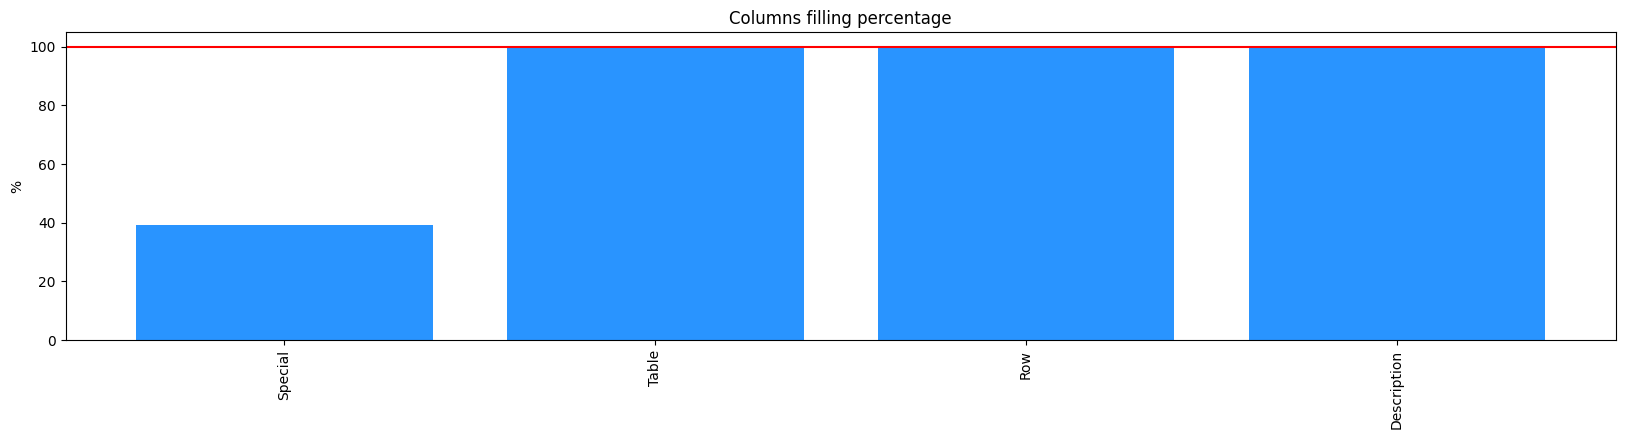

In [6]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_homeCred)

In [7]:
# Unique pairs 'Row'/'Description'
column_description = HomeCredit_columns[["Row", "Description"]]\
                                        .drop_duplicates()

pd.set_option('display.max_colwidth', None)
column_description.sort_values("Row")

Row  \
141                   AMT_ANNUITY   
12                    AMT_ANNUITY   
179                   AMT_ANNUITY   
180               AMT_APPLICATION   
156                   AMT_BALANCE   
..                            ...   
77   YEARS_BEGINEXPLUATATION_MEDI   
63   YEARS_BEGINEXPLUATATION_MODE   
50                YEARS_BUILD_AVG   
78               YEARS_BUILD_MEDI   
64               YEARS_BUILD_MODE   

                                                                                                                                                                                                                                                                              Description  
141                                                                                                                                                                                                                                                   Annuity of the Credit Bureau credit  
12                                                                                                                                                                                                                                                                           Loan annuity  
179                                                                                                                                                                                                                                                       Annuity of previous application  
180                                                                                                                                                                                                                        For how much credit did client ask on the previous application  
156                                                                                                                                                                                                                                           Balance during the month of previous credit  
..                                                                                                                                                                                                                                                                                    ...  
77   Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor  
63   Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor  
50   Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor  
78   Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor  
64   Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor  

[213 rows x 2 columns]

In [8]:
HomeCredit_columns.loc[HomeCredit_columns["Row"] == "AMT_ANNUITY"]

Table          Row  \
12   application_{train|test}.csv  AMT_ANNUITY   
141                    bureau.csv  AMT_ANNUITY   
179      previous_application.csv  AMT_ANNUITY   

                             Description Special  
12                          Loan annuity     NaN  
141  Annuity of the Credit Bureau credit     NaN  
179      Annuity of previous application     NaN

* Le dataset HomeCredit_columns_description.csv contains 219 rows et 4 variables.
* There are 196 unique Row representing the variables available in all other datasets.
* Some values of Row variable are asociated to slightly different Descriptions. **It must be verified whether the variables referred to in the Row column are actually the same or not.**
<br>

<a id='application_train_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset application_train</span></span>

This is the main table, broken into two files for **Train (with TARGET)** and Test (without TARGET). <br>
Static data for all applications. One row represents one loan in our data sample.

In [14]:
# -----------------------------
# File upload: application_train
# -----------------------------

# linked by 'SK_ID_CURR' to "previous_application", "credit_card_balance",
# "bureau", "POS_CASH_balance" and "installments_payments"

application_train = pd.read_csv('application_train.csv', low_memory=False,
                            encoding='utf-8')
application_train.name = 'application_train'

# --------------
# Dataset size
# --------------
print("The dataset 'application_train' contains " +
      str(application_train.shape[0]) + " rows and " +
      str(application_train.shape[1]) + " columns.\n")

The dataset 'application_train' contains 307511 rows and 122 columns.



In [10]:
# ---------------
# Data overview
# ---------------
pd.options.display.max_columns = None
application_train.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [11]:
# Columns name description
HomeCredit_columns.loc[HomeCredit_columns["Table"] ==
                       "application_{train|test}.csv"].sort_values("Row")\
                        .style.hide(axis=0)

---
**Comment:**<br>

There are numerous "FLAG_" variables, some have coded values of "Yes", "No" : 1=YES, 0=NO  <br>
Check if all values of "FLAG_" variables are binary. If so, homogenise and code them : 1=YES, 0=NO.<br>

---

In [16]:
# --------------------
# Column description
# --------------------
pd.options.display.max_rows = None
info_train = tools_dataframe.complet_description(application_train)
info_train

Variable     Type    null Duplicated  \
0                 COMMONAREA_MEDI  float64  214865      89444   
1                 COMMONAREA_MODE  float64  214865      89518   
2                  COMMONAREA_AVG  float64  214865      89465   
3         NONLIVINGAPARTMENTS_AVG  float64  213514      93611   
4        NONLIVINGAPARTMENTS_MODE  float64  213514      93830   
5        NONLIVINGAPARTMENTS_MEDI  float64  213514      93783   
6              FONDKAPREMONT_MODE   object  210295      97212   
7           LIVINGAPARTMENTS_MEDI  float64  210199      96215   
8           LIVINGAPARTMENTS_MODE  float64  210199      96576   
9            LIVINGAPARTMENTS_AVG  float64  210199      95444   
10                 FLOORSMIN_MODE  float64  208642      98844   
11                 FLOORSMIN_MEDI  float64  208642      98822   
12                  FLOORSMIN_AVG  float64  208642      98564   
13               YEARS_BUILD_MODE  float64  204488     102869   
14                YEARS_BUILD_AVG  float64  204488     102874   
15               YEARS_BUILD_MEDI  float64  204488     102872   
16                    OWN_CAR_AGE  float64  202929     104520   
17                  LANDAREA_MODE  float64  182590     121358   
18                  LANDAREA_MEDI  float64  182590     121361   
19                   LANDAREA_AVG  float64  182590     121394   
20              BASEMENTAREA_MEDI  float64  179943     123796   
21              BASEMENTAREA_MODE  float64  179943     123727   
22               BASEMENTAREA_AVG  float64  179943     123788   
23                   EXT_SOURCE_1  float64  173378      19549   
24              NONLIVINGAREA_AVG  float64  169682     134539   
25             NONLIVINGAREA_MODE  float64  169682     134502   
26             NONLIVINGAREA_MEDI  float64  169682     134506   
27                 ELEVATORS_MODE  float64  163891     143594   
28                 ELEVATORS_MEDI  float64  163891     143574   
29                  ELEVATORS_AVG  float64  163891     143363   
30             WALLSMATERIAL_MODE   object  156341     151163   
31                 APARTMENTS_AVG  float64  156061     149111   
32                APARTMENTS_MODE  float64  156061     150690   
33                APARTMENTS_MEDI  float64  156061     150302   
34                 ENTRANCES_MEDI  float64  154828     152637   
35                 ENTRANCES_MODE  float64  154828     152653   
36                  ENTRANCES_AVG  float64  154828     152398   
37                LIVINGAREA_MODE  float64  154350     147860   
38                 LIVINGAREA_AVG  float64  154350     147962   
39                LIVINGAREA_MEDI  float64  154350     147880   
40                 HOUSETYPE_MODE   object  154297     153211   
41                 FLOORSMAX_MODE  float64  153020     154466   
42                  FLOORSMAX_AVG  float64  153020     154088   
43                 FLOORSMAX_MEDI  float64  153020     154442   
44    YEARS_BEGINEXPLUATATION_AVG  float64  150007     157219   
45   YEARS_BEGINEXPLUATATION_MODE  float64  150007     157283   
46   YEARS_BEGINEXPLUATATION_MEDI  float64  150007     157259   
47                 TOTALAREA_MODE  float64  148431     153964   
48            EMERGENCYSTATE_MODE   object  145755     161754   
49                OCCUPATION_TYPE   object   96391     211102   
50                   EXT_SOURCE_3  float64   60965     245732   
51      AMT_REQ_CREDIT_BUREAU_QRT  float64   41519     265981   
52     AMT_REQ_CREDIT_BUREAU_HOUR  float64   41519     265987   
53      AMT_REQ_CREDIT_BUREAU_DAY  float64   41519     265983   
54     AMT_REQ_CREDIT_BUREAU_WEEK  float64   41519     265983   
55      AMT_REQ_CREDIT_BUREAU_MON  float64   41519     265968   
56     AMT_REQ_CREDIT_BUREAU_YEAR  float64   41519     265967   
57                NAME_TYPE_SUITE   object    1292     306212   
58       OBS_30_CNT_SOCIAL_CIRCLE  float64    1021     306457   
59       DEF_60_CNT_SOCIAL_CIRCLE  float64    1021     306481   
60       DEF_30_CNT_SOCIAL_CIRCLE  float64    1021     30648

---
**Comment:**<br>

A large part of variables of type int64 have many duplicate values. <br>
It should be checked whether they are discrete numerical variables or categorical variables.<br>

---

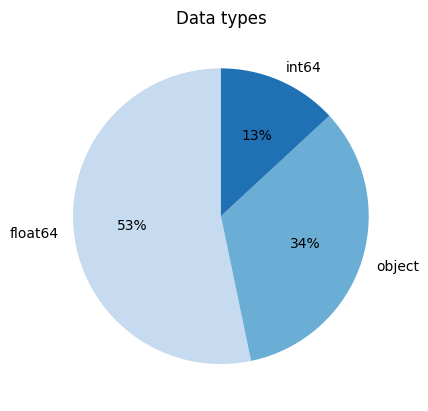

In [17]:
# Visualization data types
tools_dataframe.visu_dataTypes(info_train)

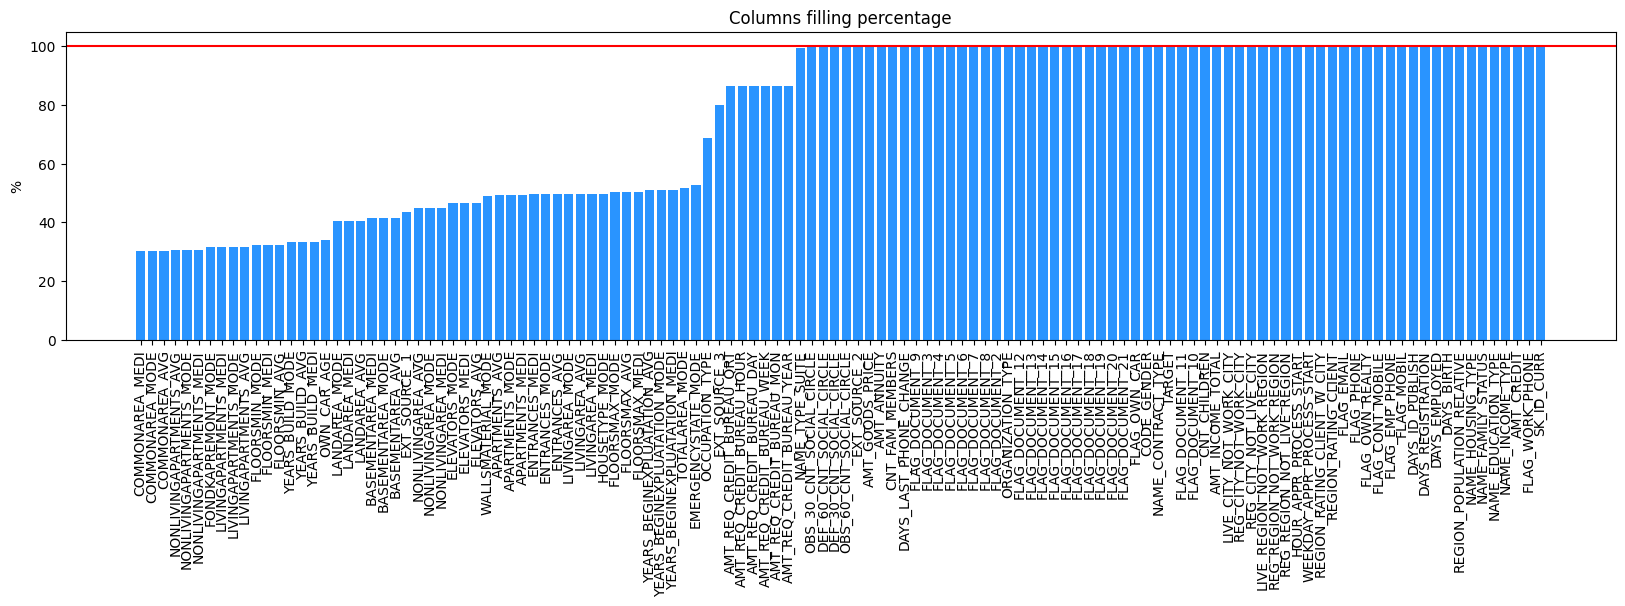

In [18]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_train)

In [19]:
# TARGET variable
HomeCredit_columns.loc[HomeCredit_columns["Row"] ==
                       "TARGET"].style.hide(axis=0)

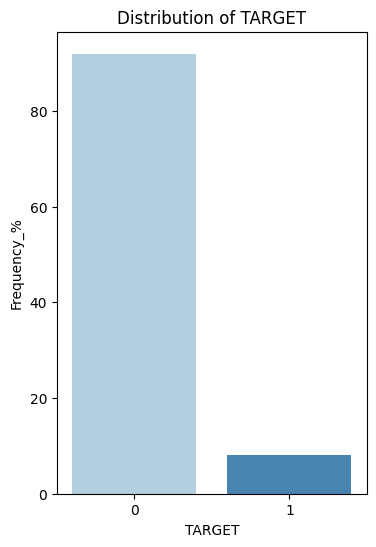

In [20]:
tools_dataframe.univ_cate_vari(application_train, "TARGET")

* Le dataset application_train.csv contains 307511 rows et 122 variables.
* These variables contain the personal statistics of a particular applicant, such as age, income, type of loan, flat statistics, etc.
* There are 307511 unique SK_ID_CURR representing unique loan applications.
* The TARGET valiable illustrates the clients with payment difficulties (he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample) :
    * 1 for client with payment difficulties, those are "Defaulters"
    * 0 for all other cases, those are "Non-Defaulters"
* The dataset is an **imbalanced dataset**, where the Negative class dominates the Positive class, as there are only a few number of defaulters among all the applicants. This aspect conditions the way the project is approached.
    * For imbalanced dataset, during building the model, we cannot feed the data as is to some algorithms, which are imbalance sensitive.
    * Similar is the case with the Performance Metrics.
    * One more important thing to note here is that there are very few people who actually default, and they tend to show some sort of different behaviour. Thus in such cases of Fraud, Default and Anomaly Detection, we need to focus on outliers too, and we cannot remove them, as they could be the differentiating factor between Defaulter and Non-Defaulter.

The **aim of the project** is to implement a credit scoring tool to **calculate the probability of a customer repaying their loan**, and then **classify the application as either granted or refused credit**.<br>
We assume the value equivalence between the variable Target and the project objectif.

| Target | Meaning | Objectif | Meaning|
| --- | --- | --- | --- |
| 1 | client with payment difficulties | 1 | refused credit |
| 0 | all other cases | 0 | granted credit |


<a id='app_train_plot_categ_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting categorical variables</span></span>

In [21]:
# Lis of categorical variables
cols_cat_train = \
    application_train.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_train

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

We will now plot some of the Categorical Variables of the table application_train, and see their impact on the Target Variable.

---
---

**NAME_CONTRACT_TYPE**

This column contains information about the type of loan for the given applicant. As per the documentation provided by Home Credit, there are two types of loans, i.e. Revolving Loans and Cash Loans.

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_CONTRACT_TYPE' are:
['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------


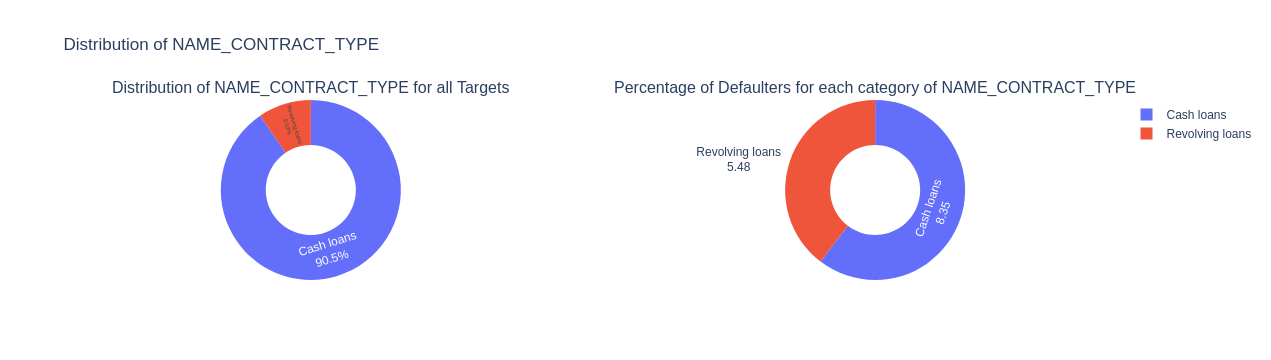

In [22]:
#let us first see the unique categories of 'NAME_CONTRACT_TYPE'
EDA_kernel_kaggle.print_unique_categories(application_train,
                                          'NAME_CONTRACT_TYPE')

#plotting the Pie Plot for the column
EDA_kernel_kaggle.plot_categorical_variables_pie(application_train,
                                                 'NAME_CONTRACT_TYPE',
                                                 hole = 0.5)

**Observations and Conclusions**

From the above plot, we can draw following observations and conclusions:
<ol><li>From the first subplot, i.e. the overall distribution:
        <ul><li>It can be seen that most of the loans that the customers take are Cash Loans.</li>
            <li>Only 9.52% of the people have taken Revolving Loans.</li></ul></li>
<li>From the second subplot, i.e. Percentage of Defaulters:
        <ul><li>We see is that there are more percentage of people who have defaulted with Cash Loans (8.35%) as compared to those who defaulted with Revolving Loans (5.48%).</li></ul></li></ol>

---
**CODE_GENDER**

This column contains information about the Gender of the Client/Applicant.<br>
Here <b>M</b> stands for <b>Male</b> and <b>F</b> for <b>Female</b>.

----------------------------------------------------------------------------------------------------
The unique categories of 'CODE_GENDER' are:
['M' 'F' 'XNA']
----------------------------------------------------------------------------------------------------
Counts of each category are:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------


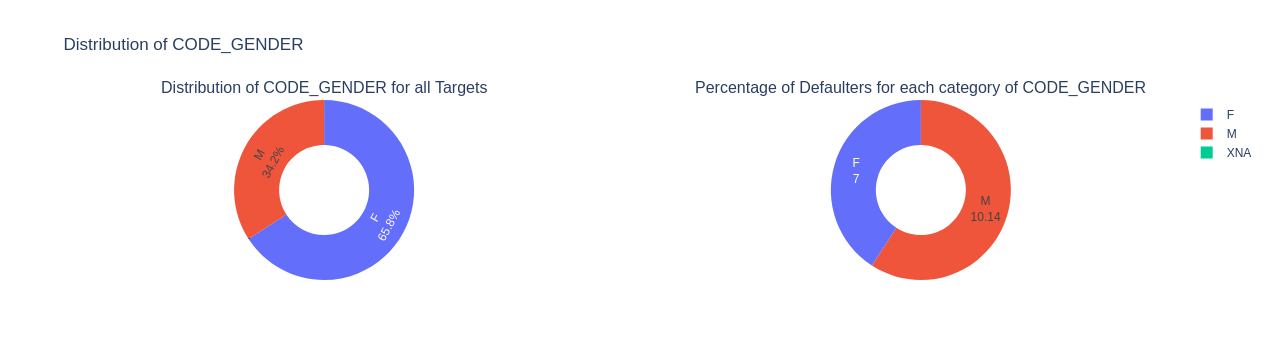

In [23]:
#let us first see the unique categories of 'CODE_GENDER'
EDA_kernel_kaggle.print_unique_categories(application_train, 'CODE_GENDER',
                                          show_counts = True)

#plotting the Pie Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_pie(application_train,
                                                 'CODE_GENDER', hole = 0.5)

**Observations and Conclusions:**

The Distribution of CODE_GENDER feature seems interesting. Here are some talking points:
<ol><li>First point to observe is that there are 4 rows in the application_train table which have 'XNA' genders, which dont make much sense, and can be counted as NaN values. Since they are only 4 in Number and only belong to Non-Defaulter Category. So, we can eliminate those rows without much hesitation.</li>
    <li>From the subplot 1 we see that for the given dataset, there are more number of Female applicants (65.8%) than Male applicants (34.2%). </li>
    <li>However, contrary to the number of Female applicants, from the second plot we note that it has been seen that Male applicants tend to default more (10.14%) as compared to Female applicants (7%). </li></ol>
Thus, it can be said that Male have more tendency to default than Female as per the given dataset.

---
**Distribution of Categorical Variable FLAG_OWN_CAR**

This column is a boolean column, which tells whether if the client owns a car or not.<br>
Here <b>1</b> stands for <b>Yes</b> and <b>0</b> stands for <b>No</b>.

----------------------------------------------------------------------------------------------------
The unique categories of 'FLAG_OWN_CAR' are:
['N' 'Y']
----------------------------------------------------------------------------------------------------


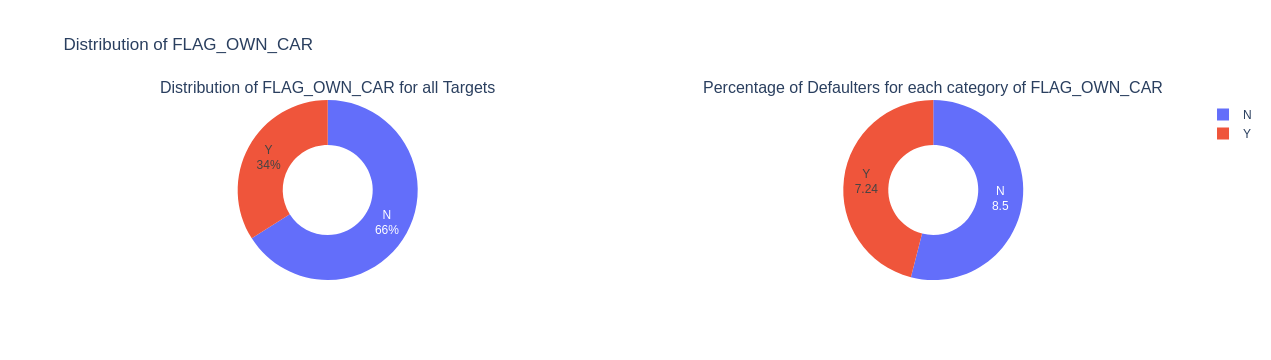

In [24]:
#let us first see the unique categories of 'FLAG_OWN_CAR'
EDA_kernel_kaggle.print_unique_categories(application_train, 'FLAG_OWN_CAR')

#plotting the Pie Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_pie(application_train,
                                                 column_name = 'FLAG_OWN_CAR',
                                                 hole = 0.5)

---
**Distribution of Categorical Variable FLAG_OWN_REALTY**

This column is a boolean column, which tells whether if the client owns a house or flat.<br>
Here <b>1</b> stands for <b>Yes</b> and <b>0</b> stands for <b>No</b>.

----------------------------------------------------------------------------------------------------
The unique categories of 'FLAG_OWN_REALTY' are:
['Y' 'N']
----------------------------------------------------------------------------------------------------


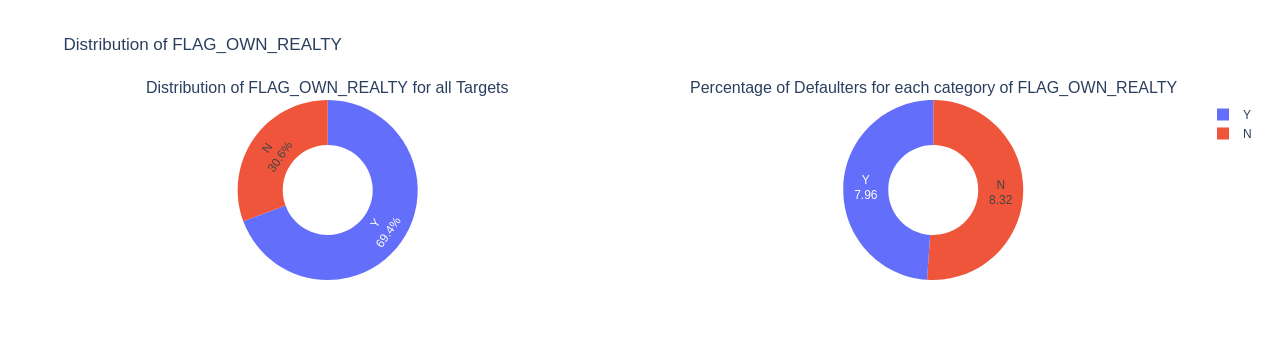

In [25]:
#let us first see the unique categories of 'FLAG_OWN_REALTY'
EDA_kernel_kaggle.print_unique_categories(application_train,
                                          'FLAG_OWN_REALTY')

#plotting the Pie Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_pie(application_train,
                                            column_name = 'FLAG_OWN_REALTY',
                                                 hole = 0.5)

---
**Distribution of Categorical Variable NAME_TYPE_SUITE**

This column is a boolean column, which tells whether if the client owns a house or flat.<br>
Here <b>1</b> stands for <b>Yes</b> and <b>0</b> stands for <b>No</b>.

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_TYPE_SUITE' are:
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
----------------------------------------------------------------------------------------------------


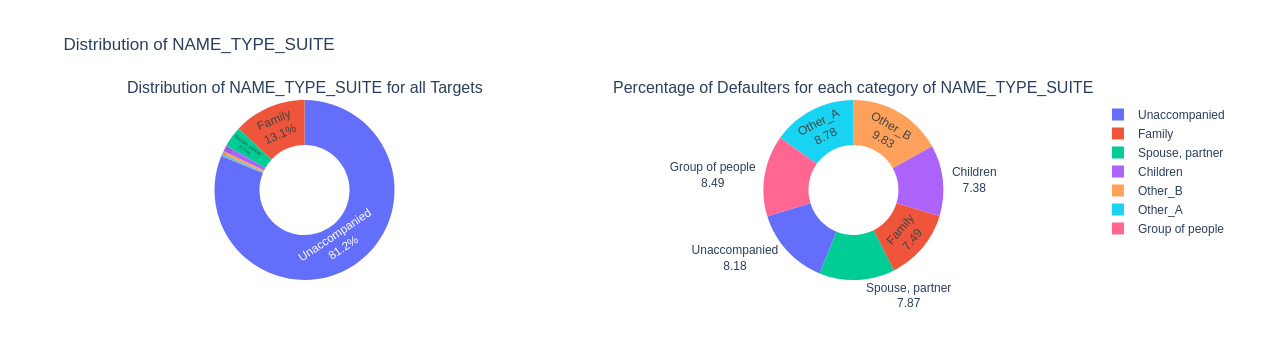

In [26]:
#let us first see the unique categories of 'NAME_TYPE_SUITE'
EDA_kernel_kaggle.print_unique_categories(application_train,
                                          'NAME_TYPE_SUITE')

#plotting the Pie Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_pie(application_train,
                                            column_name = 'NAME_TYPE_SUITE',
                                                 hole = 0.5)

---
**Distribution of Categorical Variable FLAG_EMP_PHONE**

This column is a boolean column, which tells whether if the client provided his Work Phone Number or not.<br>
Here <b>1</b> stands for <b>Yes</b> and <b>0</b> stands for <b>No</b>.

----------------------------------------------------------------------------------------------------
The unique categories of 'FLAG_EMP_PHONE' are:
[1 0]
----------------------------------------------------------------------------------------------------


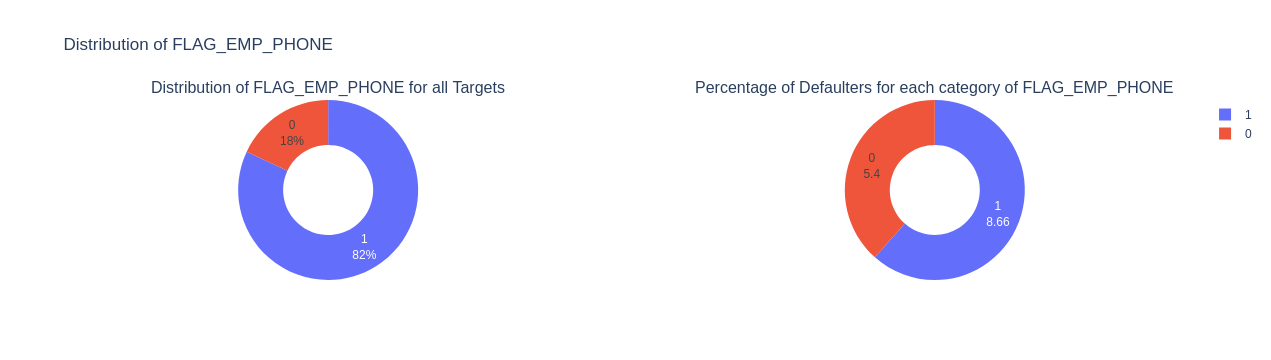

In [27]:
#let us first see the unique categories of 'FLAG_EMP_PHONE'
EDA_kernel_kaggle.print_unique_categories(application_train, 'FLAG_EMP_PHONE')

#plotting the Pie Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_pie(application_train, column_name = 'FLAG_EMP_PHONE', hole = 0.5)

**Observations and Conclusions:**

This feature contains two categories, i.e. if the client had provided his Work Phone Number during registration/application process or not.
<ol><li>From the first subplot we see that most of the applicants do not provide their Work Phone Number (82%) and only 18% have provided their Work Phone Number.
    <li>It can also be seen that the Default tendency for those who do provide Work Phone Number is more than those who do not provide Work Phone Number.<br>
        This is characteristic could be attributed to the fact that the Defaulters might be providing their Work Phone Numbers so that they don't get disturbed on their personal phone.

---
**REGION_RATING_CLIENT_W_CITY**

This feature is the rating provided by the Home Credit to each client's region based on the surveys that they might have done. This rating also takes into account the City in which the client lives. <br>
Taking City into account is important because even if some regions have a good rating in a particular City, but that City doesn't have high rating, then applicant would be given a medium rating and not a high rating.<br>
It contains values in the range from 1 to 3.

----------------------------------------------------------------------------------------------------
The unique categories of 'REGION_RATING_CLIENT_W_CITY' are:
[2 1 3]
----------------------------------------------------------------------------------------------------


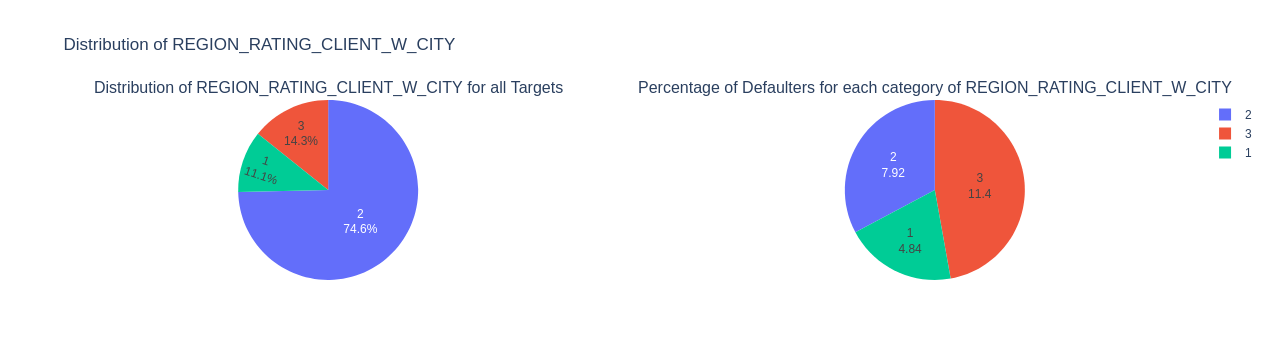

In [28]:
#let us first see the unique categories of 'REGION_RATING_CLIENT_W_CITY'
EDA_kernel_kaggle.print_unique_categories(application_train,
                                          'REGION_RATING_CLIENT_W_CITY')

#plotting the Pie Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_pie(application_train,
                                column_name = 'REGION_RATING_CLIENT_W_CITY')

**Observations and Conclusions:**

From the above plots, we can draw following insights:
<ol><li>From the first subplot, we see that most of the clients (74.6%) have a region rating of 2. This is the middle value which is for most of the applicants.<br>Very few applicants have a region rating of 1 (only 11.1%) and some have a rating of 3 (14.3%).</li>
    <li>Among the Defaulters, it is seen that most of the defaulters have a region rating of 3 (11.4%) which is comparably higher to the other two ratings, i.e. clients with rating of 1 have a Defaulting percentage of just 4.84% and with rating 2 have a percentage of 7.92%.</li>
    </ol>
This shows that the rating 3 could be an important attribute for making a decision on Defaulting Characteristics.

---
**NAME_EDUCAtION_TYPE**

This feature descibes/enlists the Highest Education that the client had achieved.

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_EDUCATION_TYPE' are:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_EDUCATION_TYPE = 5


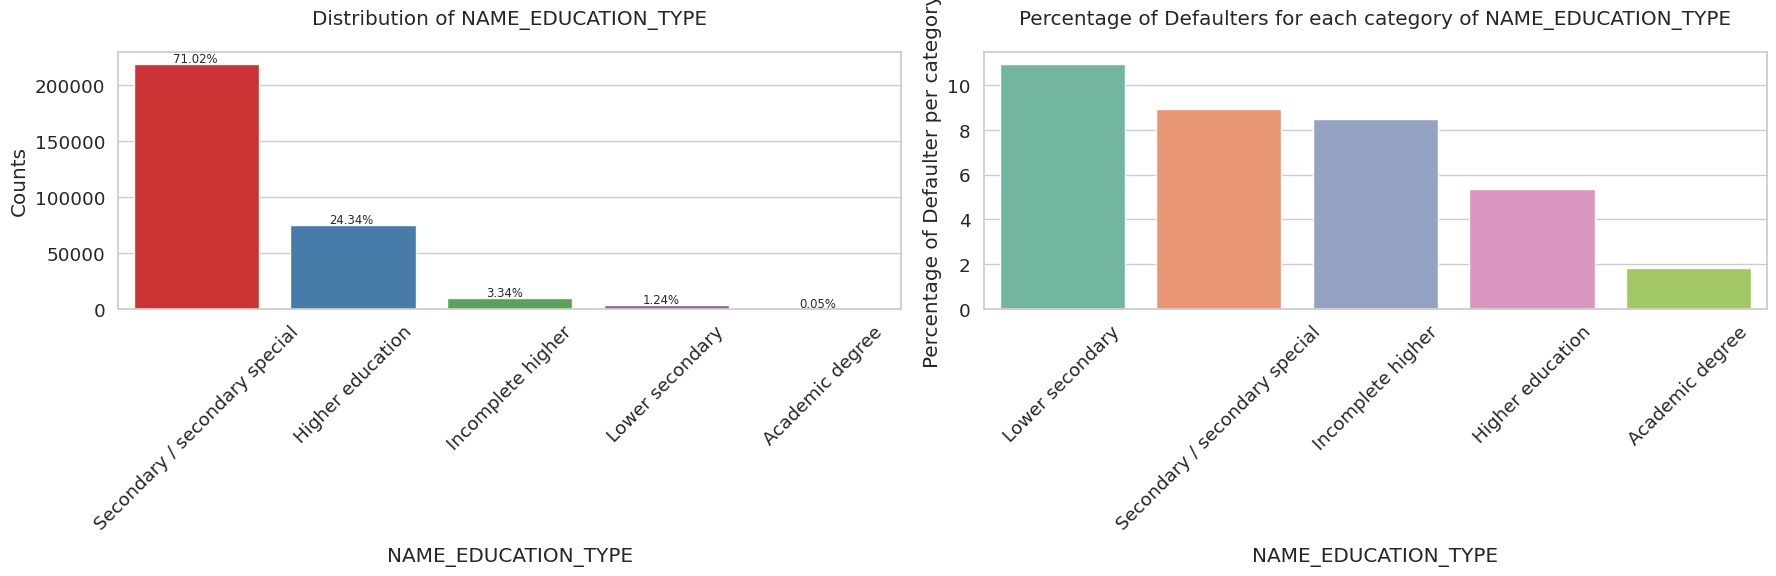

In [29]:
#let us first see the unique categories of 'NAME_EDUCATION_TYPE'
EDA_kernel_kaggle.print_unique_categories(application_train,
                                          'NAME_EDUCATION_TYPE',
                                          show_counts = True)

#plotting the Bar Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_bar(application_train,
                                        column_name = 'NAME_EDUCATION_TYPE',
                                                 rotation = 45,
                                                 horizontal_adjust = 0.25)

**Observations and Conclusions:**

Looking at the above plots, we can conclude the following:
<ol><li>About 71% of people have had their education only till Secondary/Secondary Special, along with 24.34% clients having done Higher Education. This suggests that most of the clients/borrowers don't have a high education level.</li>
    <li>From the second plot, we see that the people who have had their studies till only Lower Secondary have the highest Defaulting Characterists, with Secondary and Incomplete higher having similar defaulting tendencies.</li>
    <li>The group of people with Higher Education have comparably lower defaulting tendency, which is logical too. Also, people with Academic Degree show the least Defaulting Rate. However, the Academic Degree group are very few in numbers, so it might not be very useful.</li></ol>
   

---
**OCCUPATION_TYPE**

This feature tells about the type of Occupation that the client has. This can be a very important feature which could describe the Defaulting Characteristics of a client. Let us see the plots for them.

----------------------------------------------------------------------------------------------------
The unique categories of 'OCCUPATION_TYPE' are:
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of OCCUPATION_TYPE = 19


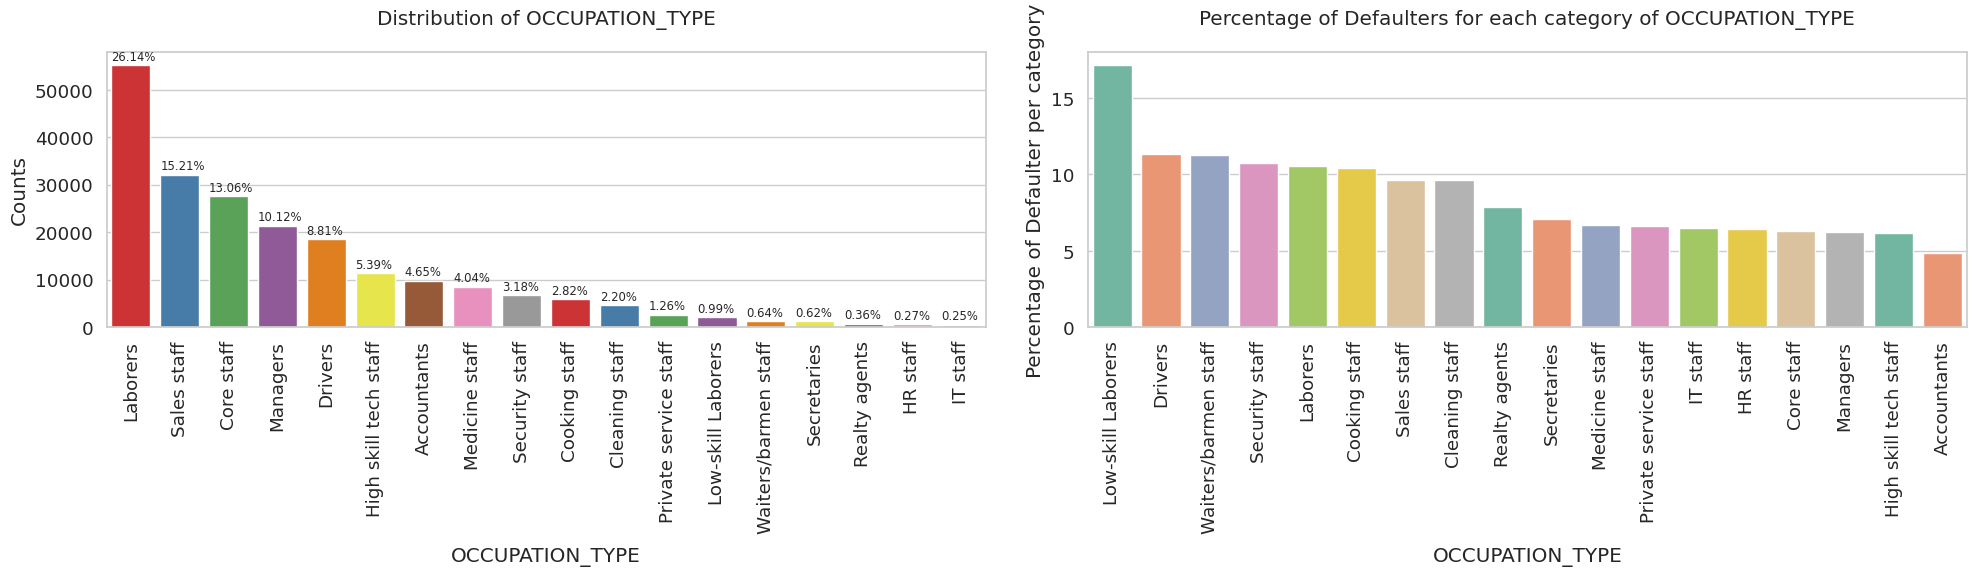

In [30]:
#let us first see the unique categories of 'OCCUPATION_TYPE'
EDA_kernel_kaggle.print_unique_categories(application_train,
                                          'OCCUPATION_TYPE')

#plotting the Bar Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_bar(application_train,
                                            column_name = 'OCCUPATION_TYPE',
                                                 figsize = (20,6),
                                                 rotation = 90)

**Observations and Conclusions:**

From the plots of Occupation Type, we can draw following observations:
<ol><li>Among the applicants, the most common type of Occupation is Laborers contributing to close to 26% applications. The next most frequent occupation is Sales Staff, followed by Core Staff and Managers.</li>
    <li>The Defaulting Rate for Low-Skill Laborers is the highest among all the occupation types (~17.5%). This is followed by Drivers, Waiters, Security Staff, Laborers, Cooking Staff, etc. All the jobs are low-level jobs. This shows that low-level Jobs people tend to have higher default rate.</li>
    <li>The lowest Defaulting Rate are among Accountants, Core Staff, Managers, High skill tech staff, HR staff, etc. which are from medium to high level jobs.</li></ol>

Thus it can be concluded that Low-level job workers tend to have a higher defaulting tendency compared to medium-high level jobs.

---
**ORGANIZATION_TYPE**

Similar to Occupation Type, Organization Type that the client belongs to could also be an important feature for predicting the Default Risk of that client. Let us visualize this feature in more detail.

Total Number of categories of ORGANIZATION_TYPE = 58


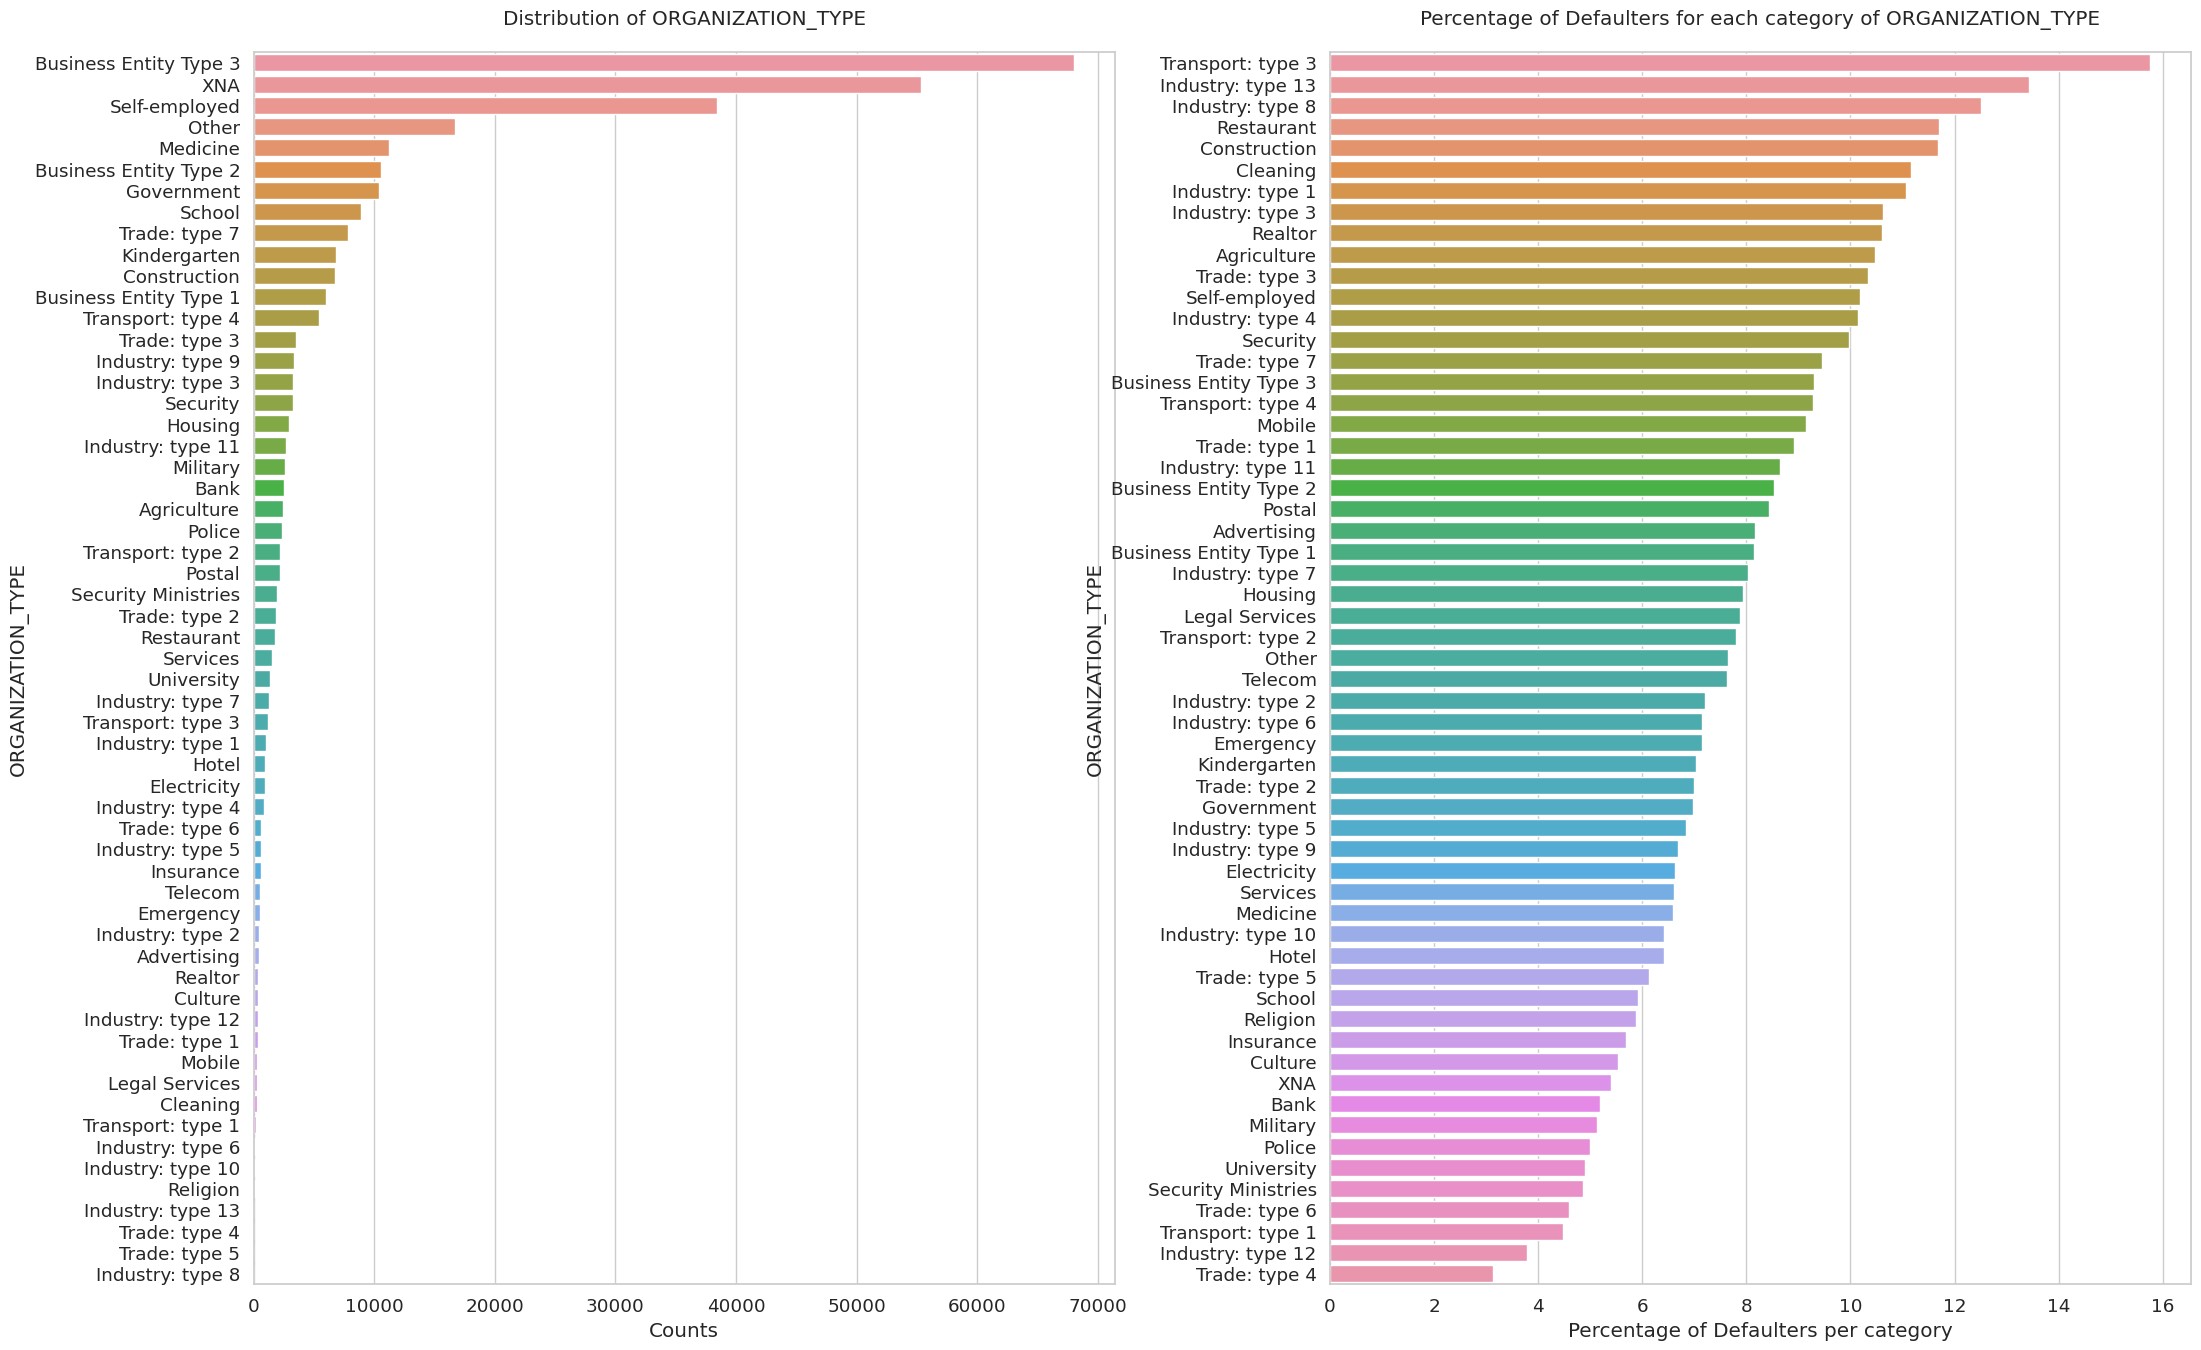

In [31]:
print(f"Total Number of categories of ORGANIZATION_TYPE = {len(application_train.ORGANIZATION_TYPE.unique())}")

plt.figure(figsize = (25,16))
sns.set(style = 'whitegrid', font_scale = 1.2)
plt.subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
count_organization = application_train.ORGANIZATION_TYPE.value_counts().sort_values(ascending = False)
sns.barplot(x = count_organization, y = count_organization.index)
plt.title('Distribution of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Counts')
plt.ylabel('ORGANIZATION_TYPE')

plt.subplot(1,2,2)
percentage_default_per_organization = application_train[application_train.TARGET == 1].ORGANIZATION_TYPE.value_counts() * 100 / count_organization
percentage_default_per_organization = percentage_default_per_organization.dropna().sort_values(ascending = False)
sns.barplot(x = percentage_default_per_organization, y = percentage_default_per_organization.index)
plt.title('Percentage of Defaulters for each category of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Percentage of Defaulters per category')
plt.ylabel('ORGANIZATION_TYPE')

plt.show()

**Observations and Conclusions:**

There are a lots of organization types which the client belongs to, 58 to be precise. The plots above give the following observations:
<ol><li>From the first plot we see that most of the applicants work in Organizations of Type 'Business Entity Type3', 'XNA' or 'Self Employed'. The Organization Type 'XNA' could probably denote unclassified Organization TYpe.</li>
    <li>From the second plot, we notice that the applicants belonging to 'Transport: type 3' have the highest defaulting tendency as compared to the rest. They are followed by organizations of types: 'Industry: type 13', 'Industry: type 8', 'Restaurant', 'Construction', etc.</li>
    <li>The organizations which show lowest default rates are 'Trade: type 4', 'Industry: type 12', etc.</li>
</ol>
These type numbers also would say something more about the Organization, however, we don't have any information related to that, so we will stick with the naming provided to us only.

---
**REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY**
<br><br>
<i>REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY:</i><br>
These columns include flags whether if the the client's permanent address matches with his Contact Address or Work Address or not at region level <br><br>
<i>LIVE_CITY_NOT_WORK_CITY</i>
This column indicates whether if the client's permanent address matches with his Contact Address at city level or not.<br><br>
Here 1 indicates different addresses and 0 indicates same addresses.

Total Number of unique categories of REG_CITY_NOT_LIVE_CITY = 2


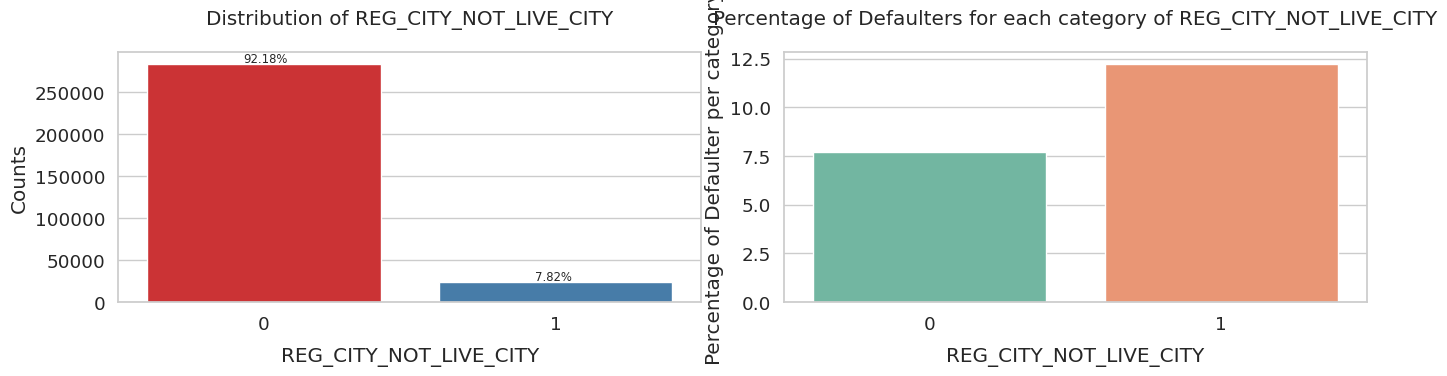

----------------------------------------------------------------------------------------------------

Total Number of unique categories of REG_CITY_NOT_WORK_CITY = 2


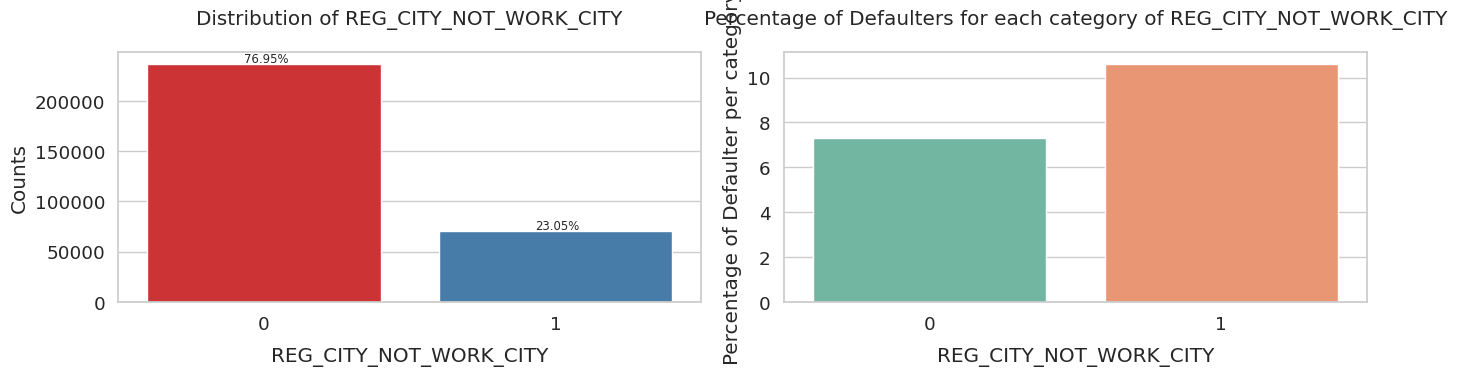

----------------------------------------------------------------------------------------------------

Total Number of unique categories of LIVE_CITY_NOT_WORK_CITY = 2


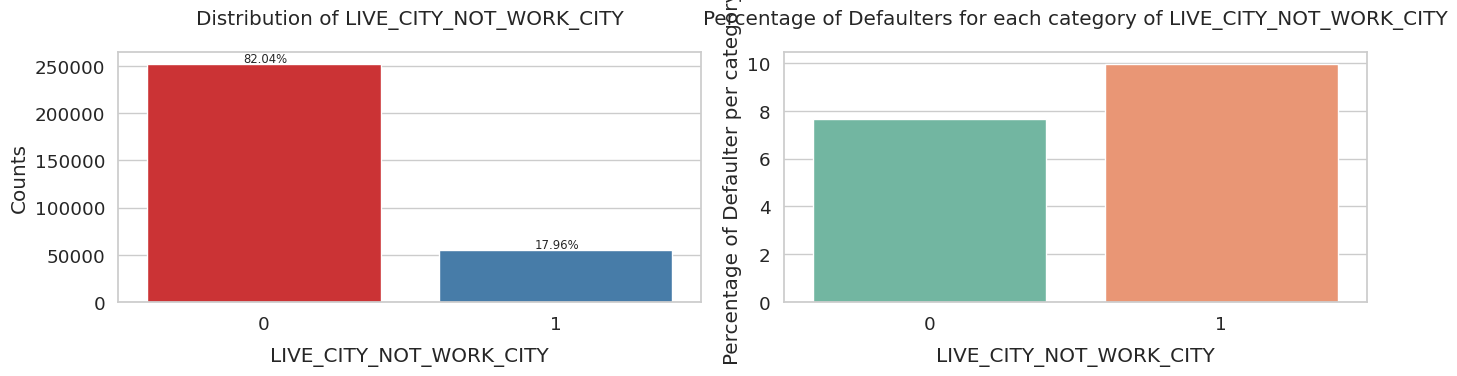

----------------------------------------------------------------------------------------------------



In [32]:

EDA_kernel_kaggle.plot_categorical_variables_bar(application_train,
                                    column_name = 'REG_CITY_NOT_LIVE_CITY',
                                                 figsize = (14, 4),
                                                 horizontal_adjust = 0.33)
print('-'*100)
print()

EDA_kernel_kaggle.plot_categorical_variables_bar(application_train,
                                    column_name = 'REG_CITY_NOT_WORK_CITY',
                                                 figsize = (14, 4),
                                                 horizontal_adjust = 0.33)
print('-'*100)
print()

EDA_kernel_kaggle.plot_categorical_variables_bar(application_train,
                                    column_name = 'LIVE_CITY_NOT_WORK_CITY',
                                                 figsize = (14, 4),
                                                 horizontal_adjust = 0.33)
print('-'*100)
print()

**Observations and Conclusions:**

From the above 3 plots, following insights can be drawn:
<ol><li>Of all the applicants there are only a minority of applicants whose addresses do not match.
    <ul><li>Firstly, there are only 7.52% people who have different permanent address from their contact address at region level.</li>
        <li>Secondly, there are around 23.05% people who have different permanent address from their work address at region level. This higher number is explainable, because it is possible that they work in different region as compared to their permanent address.</li>
        <li>Lastly, there are around 17.96% people who have different permanent address from their contact address at city level.</li>
    </ul>
    <li>
        <ul><li>If we look at the defaulting characteristics, we find that there is maximum defaulting tendency of those people who have their permanent and contact addresses different at region level, which is followed by different permanent and work address and lastly different permanent and contact address at city level.</li>
            <li>For all the cases it is seen that the Defaulting tendency of those people who have different addresses is higher than those who have same address. This means that somewhere, this difference in address may suggest Defaulting Risk.</li>
        </ul>
    </li>
    </ol>

---
**FLAG_DOCUMENT_3**


This columns contains the flag about a document that was to be submitted by the applicant. It's value is 0 if the client had provided the document and 1 if not.

Total Number of unique categories of FLAG_DOCUMENT_3 = 2


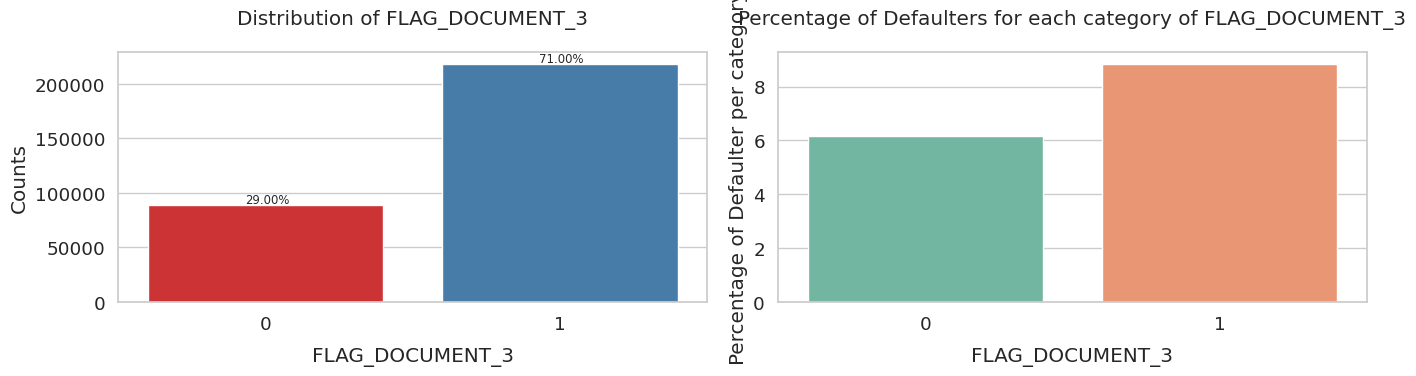

In [33]:
EDA_kernel_kaggle.plot_categorical_variables_bar(application_train,
                                            column_name = 'FLAG_DOCUMENT_3',
                                                 figsize = (14, 4),
                                                 horizontal_adjust = 0.33)

**Observations and Conclusions:**

From the above plot, we see that:
<ol><li>From the first subplot, we see that most of the clients hadn't provided this document (~71%) and only 29% did. </li>
    <li>From the second subplot, we see that those who had provided this document had a higher defaulting rate than those who didn't. This means that the applicants who had provided the Document_3 tend to default more than those who don't. </li>
    <li>Perhaps this could be something related to BPL certificate or something, but we haven't been provided with that information, so we cannot say anything about the kind of document it could have been.</li>
</ol>

<a id='app_train_plot_conti_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting continous variables</span></span>

---
**Age of Applicant**
For the given dataset, the age is given in Days, which can be harder to interpret. Thus, we will create a latent variable to store the ages in Years, which would be easier to analyse and interpret.

/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:263: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:265: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

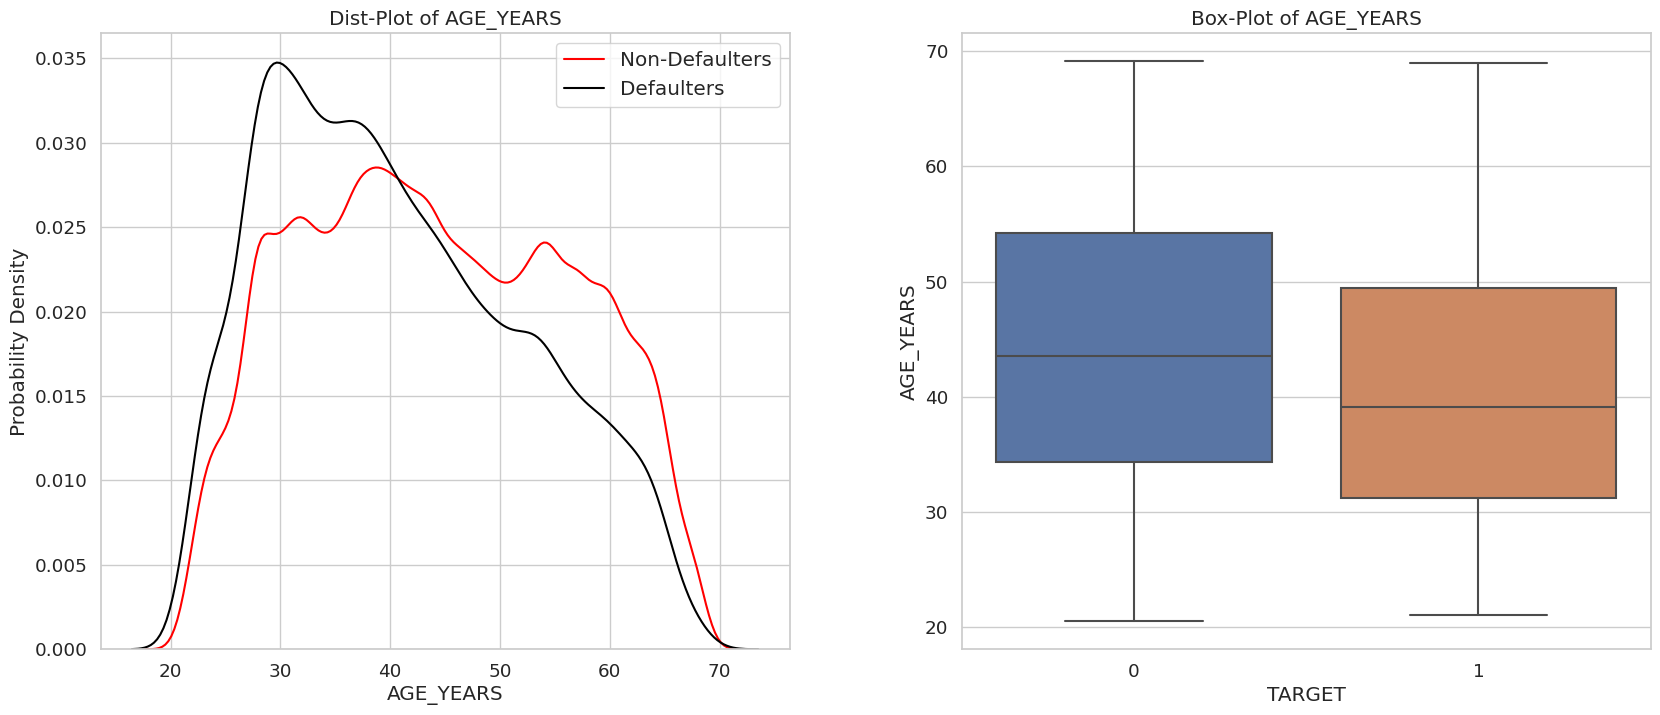

In [34]:
application_train['AGE_YEARS'] = application_train['DAYS_BIRTH'] * -1 / 365

EDA_kernel_kaggle.plot_continuous_variables(application_train, 'AGE_YEARS',
                                            plots = ['distplot','box'])
_ = application_train.pop('AGE_YEARS')

**Observations and Conclusions:**

From the above two plots, we can draw some important insights.
<ol><li>From the distplot, we can observe the peak of Age of people who Default to be close to 30 years. Also, at this point, the Non-Defaulters have a quite smaller PDF. One more thing to note is that the PDF of Age for Defaulters starts a bit left from the Non-Defaulters, and also is a bit throughtout the range. This means that the Defaulters are usually younger than Non-Defaulters.</li>
    <li>From CDF too we see that the probability
    <li>From the box-plot too, we can better visualize the same thing. The Age of Defaulters is usually lesser than the Non-Defaulters. All the quantiles of ages of Defaulters is lesser than Non-Defaulters. The 75th percentile value of Non-Defaulters is around 54 years while for Defaulters it is near to 49 years.</li></ol>
These observations imply that the Defaulters are usually younger than Non-Defaulters.

---
---
**Distribution of Continuous Variables with DAYS features**

---
---



**DAYS_EMPLOYED**

This feature tells about the number of days from the day of application the applicant had been employed. For easy interpretation, we will convert the days to years.

----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_EMPLOYED is -17912.0
The 25th percentile value of DAYS_EMPLOYED is -2760.0
The 50th percentile value of DAYS_EMPLOYED is -1213.0
The 75th percentile value of DAYS_EMPLOYED is -289.0
The 90th percentile value of DAYS_EMPLOYED is 365243.0
The 92th percentile value of DAYS_EMPLOYED is 365243.0
The 94th percentile value of DAYS_EMPLOYED is 365243.0
The 96th percentile value of DAYS_EMPLOYED is 365243.0
The 98th percentile value of DAYS_EMPLOYED is 365243.0
The 100th percentile value of DAYS_EMPLOYED is 365243.0
----------------------------------------------------------------------------------------------------


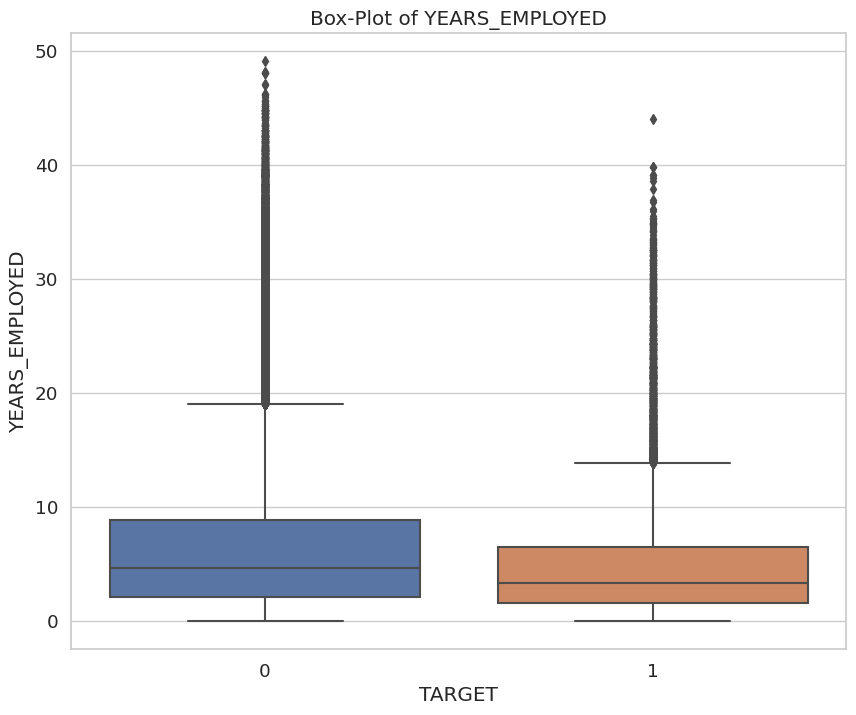

In [35]:
application_train['YEARS_EMPLOYED'] = application_train.DAYS_EMPLOYED * -1 / 365

EDA_kernel_kaggle.print_percentiles(application_train, 'DAYS_EMPLOYED')

EDA_kernel_kaggle.plot_continuous_variables(application_train, 'YEARS_EMPLOYED', plots = ['box'], scale_limits = [0,70], figsize = (10,8))

_ = application_train.pop('YEARS_EMPLOYED')

**Observations and Conclusions:**

<ol><li>We see that the DAYS_EMPLOYED column contains some erroneous datapoints with values 365243. These seem like some erroneous/non-sensicle values.</li>
    <li>From the box plot we observe that the Defaulters seem to have less number of years being employed as compared to Non-Defaulters. All the 25th, 50th and 75th quantile for Defaulters are lesser than those of Non-Defaulters.

<b>DAYS_ID_PUBLISH</b><br>

This columns tells about how many days ago from the day of registration did the client change his Identity Document with which he applied for loan.

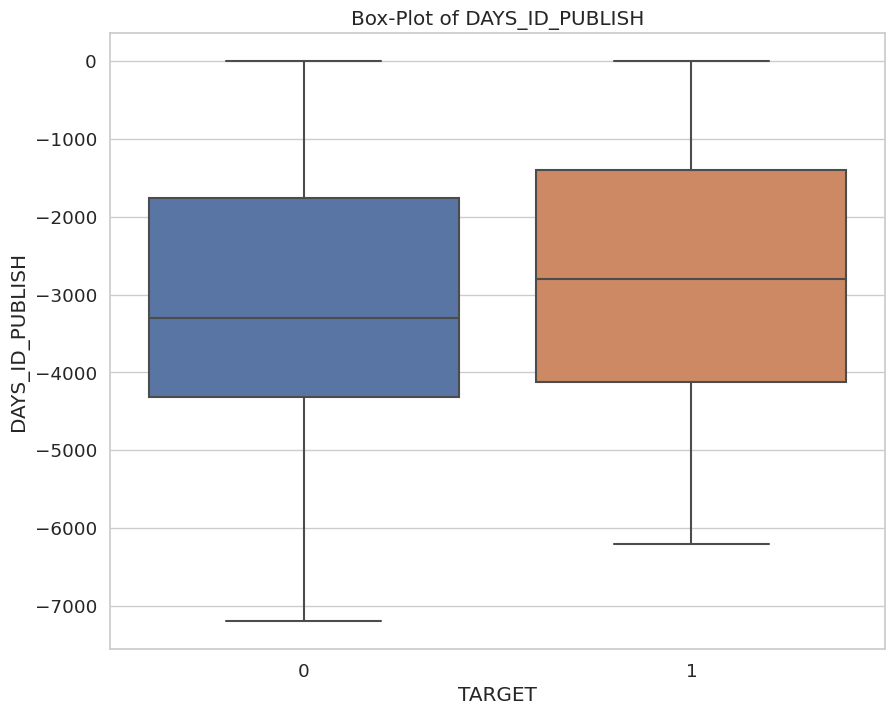

In [37]:
EDA_kernel_kaggle.plot_continuous_variables(application_train,
                                            'DAYS_ID_PUBLISH',
                                            plots = ['box'], figsize = (10,8))

**Observations and Conclusions:**

From the above box plot, we see a similar trend as seen with DAYS_REGISTRATION, in which the Defaulters usually had lesser number of days since they changed their identity. The Non-Defaulters show to have more number of days for all the quantiles since they changed their identity document.

<b><u>Distribution of EXT_SOURCES</u></b>

There are three EXT_SOURCES columns, which contain values between 0 and 1. They are normalized scores from different sources

/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:263: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:265: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

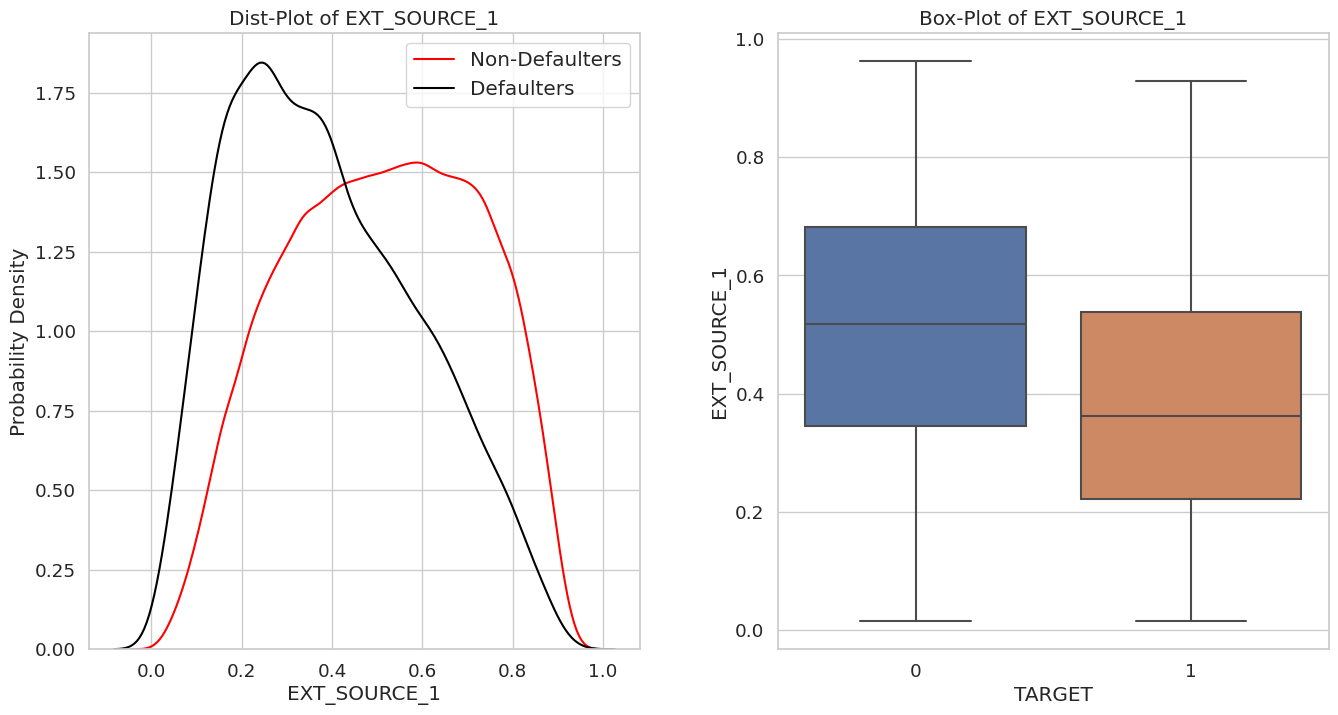

----------------------------------------------------------------------------------------------------



/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:263: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:265: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

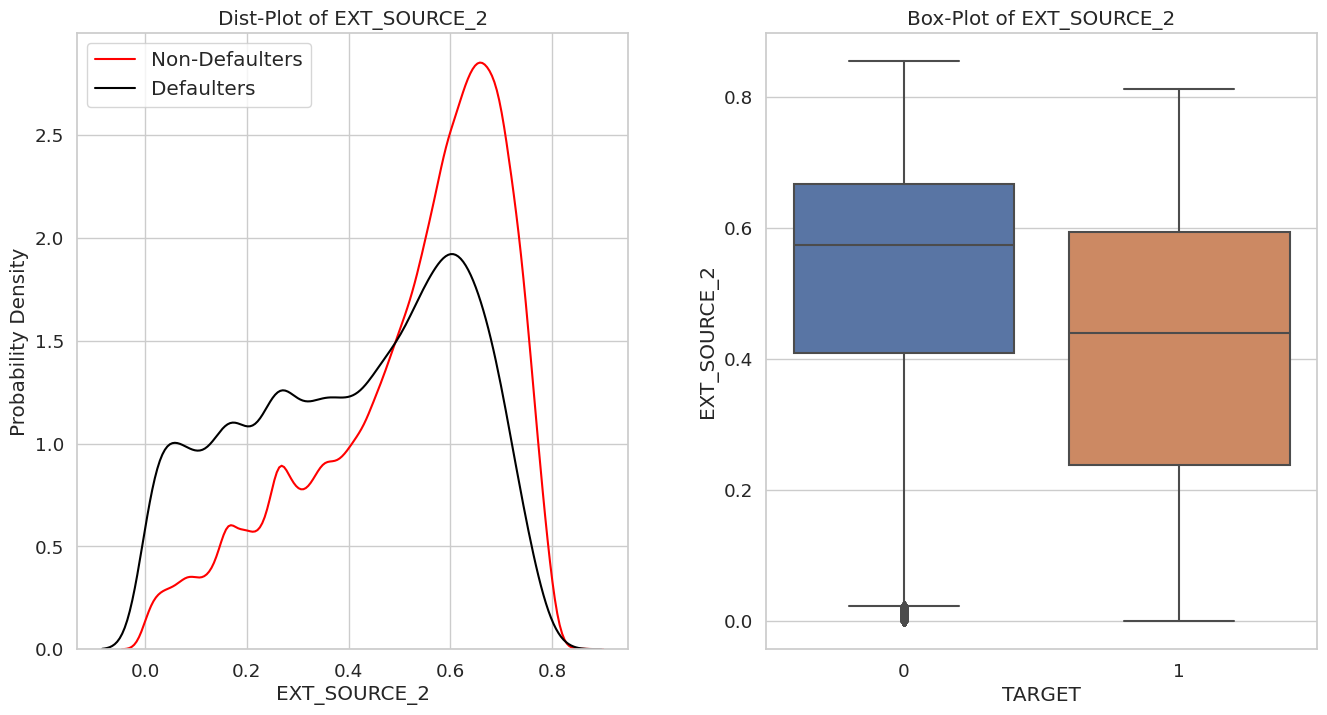

----------------------------------------------------------------------------------------------------



/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:263: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:265: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

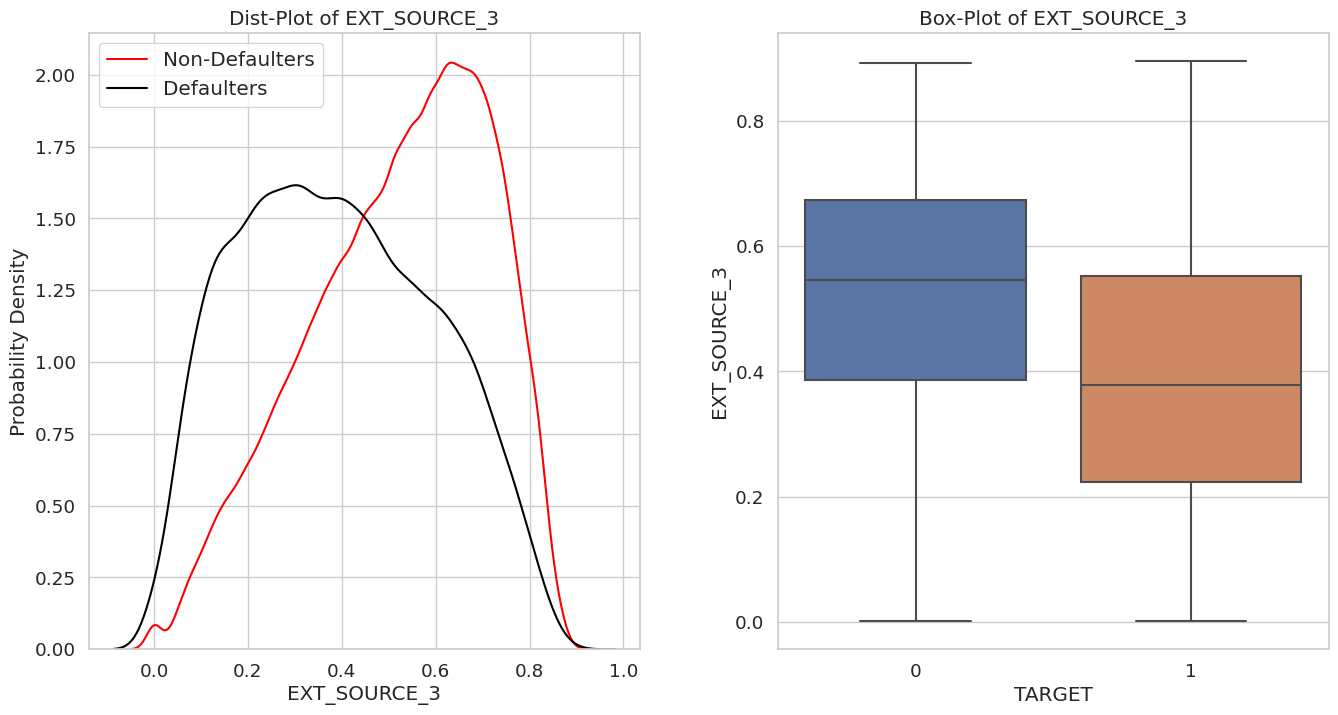

In [38]:
print()
EDA_kernel_kaggle.plot_continuous_variables(application_train, 'EXT_SOURCE_1',
                                            plots = ['distplot', 'box'],
                                            figsize = (16,8))
print('-'*100)
print()
EDA_kernel_kaggle.plot_continuous_variables(application_train, 'EXT_SOURCE_2',
                                            plots = ['distplot', 'box'],
                                            figsize = (16,8))
print('-'*100)
print()
EDA_kernel_kaggle.plot_continuous_variables(application_train, 'EXT_SOURCE_3',
                                            plots = ['distplot', 'box'],
                                            figsize = (16,8))

**Observations and Conclusions:**

From the above three plots, we can draw following conclusions:
<ol><li>If we look at the box-plots, we can clearly see a similar trend for all three EXT_SOURCE columns, which is that the Defaulters tend to have considerably lower values.
    <li>This trend can also be seen with the PDFs. The Non-Defaulters show a higher peak at high EXT_SOURCE values, and the Probability Densities are very low for low values. This implies that Non-Defaulters generally have high values of these scores.
    <li>It is interesting to note that the median value for defaulters is almost equal to or lower than 25th percentile values of Non-Defaulters.</li>
    <li>EXT_SOURCE_1 and EXT_SOURCE_3 columns tend to show better discrimination/separability as compared to EXT_SOURCE_2.
    <li>These 3 features look to be best separating the Defaulters and Non-Defaulters linearly among all the features so far.

<b><u>Distribution of FLOORSMAX_AVG and FLOORSMIN_MODE</u></b>

These columns describe the normalized scores of Average of Maximum number of Floors and Mode of Minimum number of Floors in applicant's building 

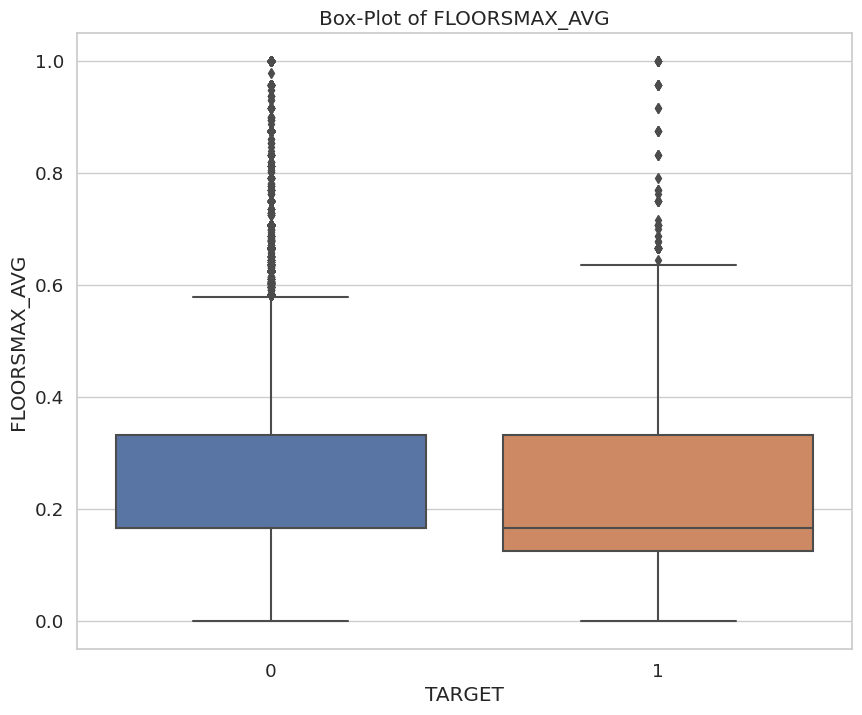

In [39]:
EDA_kernel_kaggle.plot_continuous_variables(application_train,
                                            'FLOORSMAX_AVG', plots = ['box'],
                                            figsize = (10,8))

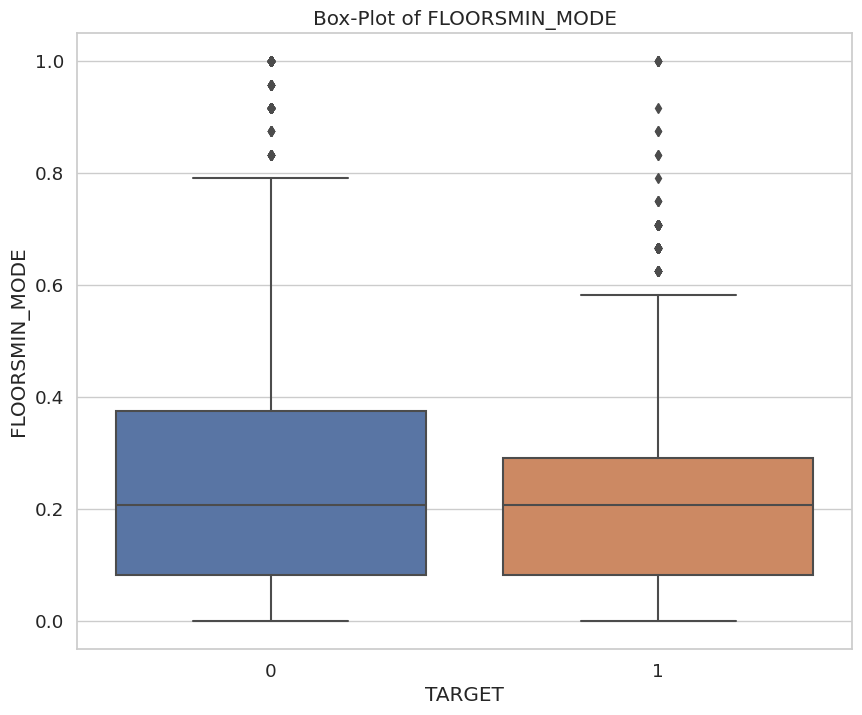

In [40]:
EDA_kernel_kaggle.plot_continuous_variables(application_train,
                                            'FLOORSMIN_MODE', plots = ['box'],
                                            figsize = (10,8))

**Observations and Conclusions**

From the above plot, we can draw the following insights:
<ol><li>The defaulters have lower median value of FLOORSMAX_AVG feature as compared to Non-Defaulters. The 75th percentile values of both the Defaulters and Non-Defaulters is more or less the same, but the 25th percentile value of Non-Defaulters is almost more than the median of Defaulters, thus this could be an important feature.</li>
    <li>The Non-Defaulters also tend to show a higher value of FLLORSMIN_MODE as compared to Defaulters. The 75th percentile value of Non-Defaulters is significantly higher than the 75th percentile value of Defaulters.

<a id='app_train_phik_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Phi-K matrix</span></span>

We will plot a heatmap of the values of Phi-K Correlation Coefficient between each of the feature with the other. <br>
The Phi-K coefficient is similar to Correlation Coefficient except that it can be used with a pair of categorical features to check if one feature shows some sort of association with the other categorical feature. It's max value can be 1 which would show a maximum association between two categorical variables.

-------------------------------------------------------------------------------


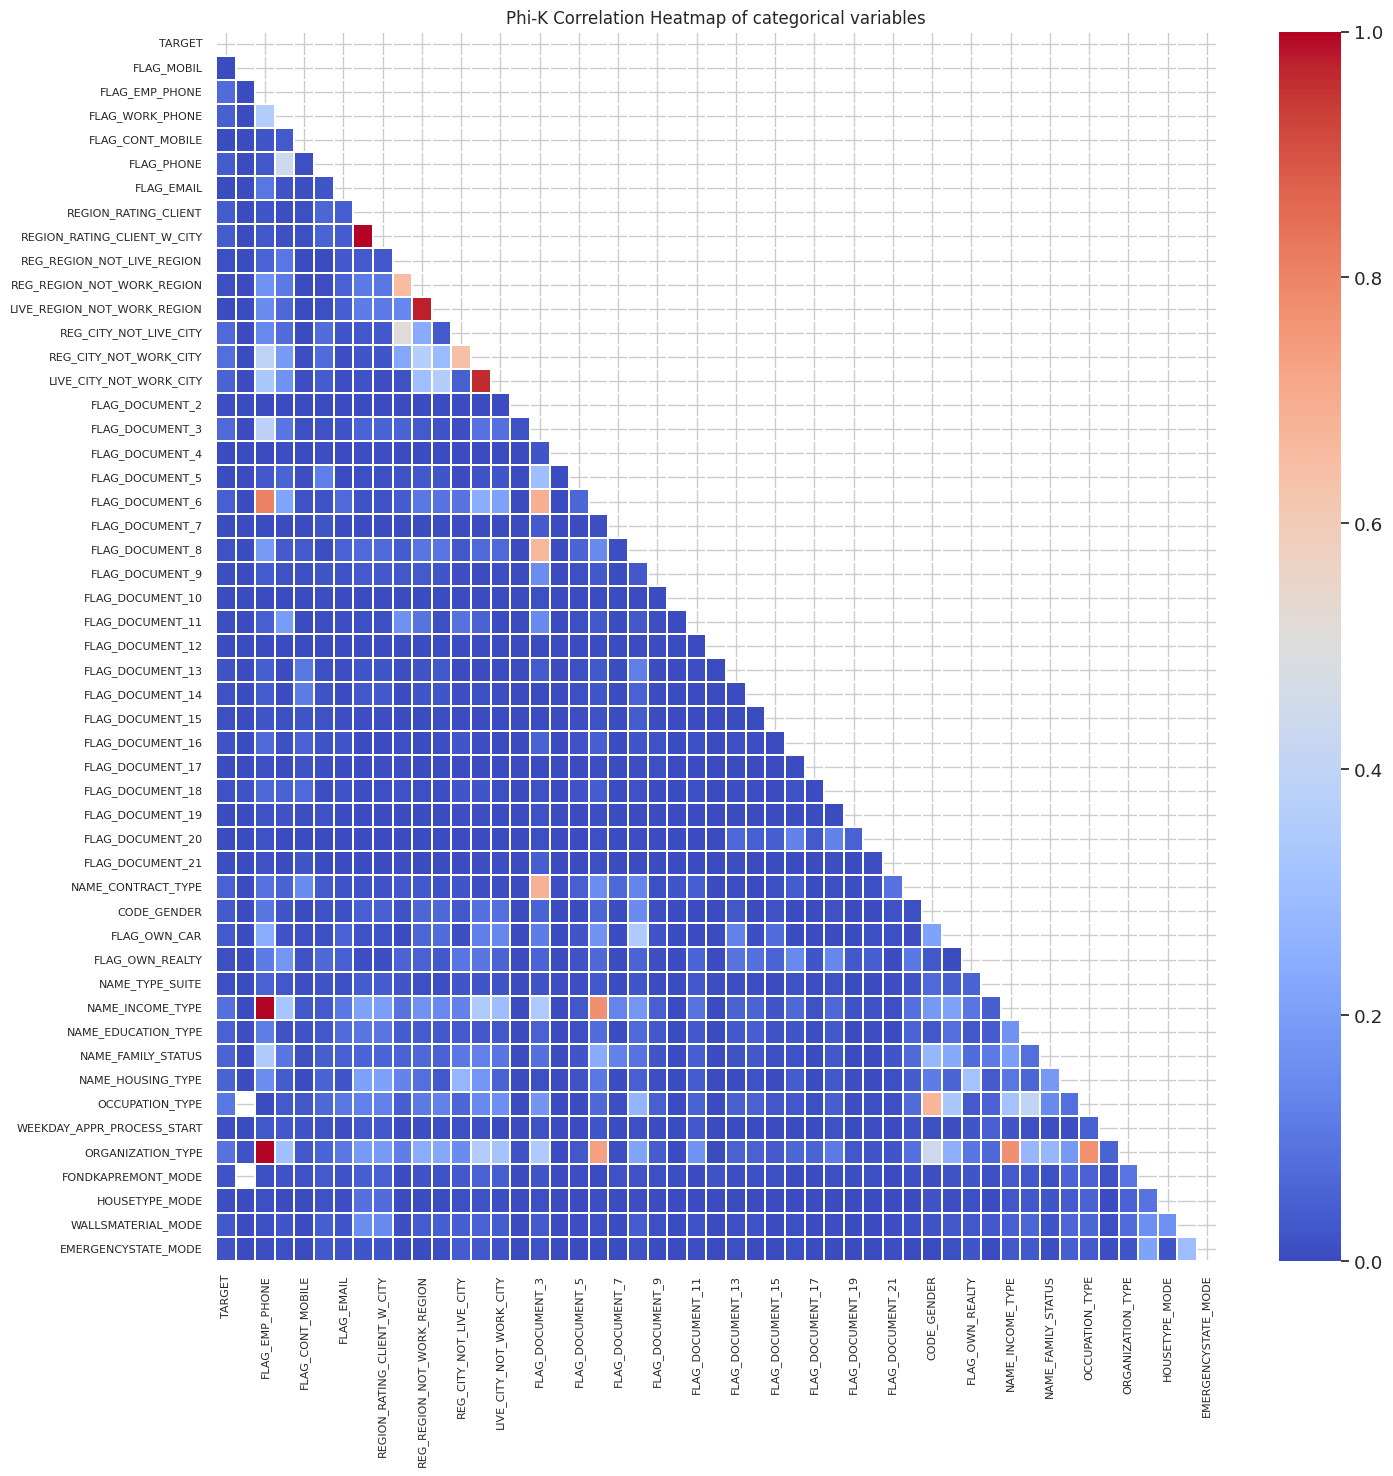

-------------------------------------------------------------------------------
The categories with the highest values of Phi-K correlation with the target variable are as follows :


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:391: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



-------------------------------------------------------------------------------


In [101]:
categorical_columns = ['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                       'FLAG_EMAIL', 'REGION_RATING_CLIENT',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REG_REGION_NOT_LIVE_REGION',
                       'REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION', 
                       'REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'] \
            + ['FLAG_DOCUMENT_' + str(i) for i in range(2, 22)] \
            + application_train.dtypes[application_train.dtypes == 'object'] \
                .index.tolist()
EDA_kernel_kaggle.plot_phik_matrix(application_train,
                                   categorical_columns,
                                   figsize=(15, 15), fontsize=8,
                                   cmap='coolwarm')


**Summary**

---
---


* The Phi-K correlation heat map above shows that most of the categorical variables are not correlated with each other, but that some of them are highly correlated.

* Some of the highly correlated category pairs are :
    * REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT - This is understandable as they more or less tell a similar story.
    * LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION
    * NAME_INCOME_TYPE, ORGANIZATION_TYPE and FLAG_EMP_PHONE

* We can also observe a certain correlation between the type of organisation and the type of income of an applicant.

* Similarly, there is a correlation between the type of occupation and the type of organisation.

* We note that the categories :
    * OCCUPATION_TYPE,
    * ORGANISATION_TYPE,
    * NAME_INCOME_TYPE,
    * and REG_CITY_NOT_WORK_CITY
    are among the categories most strongly correlated with the TARGET variable. They may be important in the classification task and would require further EDA analysis.

**Observations and Conclusions:**

<ol><li>From the above heatmap of Phi-K Correlation, we see that most of the categorical features are not correlated to each other, however some of them show strong correlation.</li>
    <li>Some of the highly correlated Category pairs are:
        <ul><li>REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT -  This is understandable as they would more or less tell a similar story.</li>
            <li>LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION</li>
            <li>NAME_INCOME_TYPE, ORGANIZATION_TYPE and FLAG_EMP_PHONE</li>
        </ul>
    </li>
    <li>We can also see some correlation between the Organization type and the income type of a client. Similarly we see a correlation between the Occupation Type and the Organization Type too.</li>
    <li>We find that the category OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_INCOME_TYPE, REG_CITY_NOT_WORK_CITY are some of the highest correlated categories with the TARGET variable. These maybe important in the classification task, and would need further EDA</li></ol>
    

<a id='app_train_correlation_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Correlation matrix</span></span>

We will plot a heatmap of the correlation of each numeric feature with respect to other features. We have excluded the column SK_ID_CURR, as it does not have any relevance. This heatmap will help us identify the highly correlated numeric features and will also help us to identify features which are highly correlated with Target Variable.

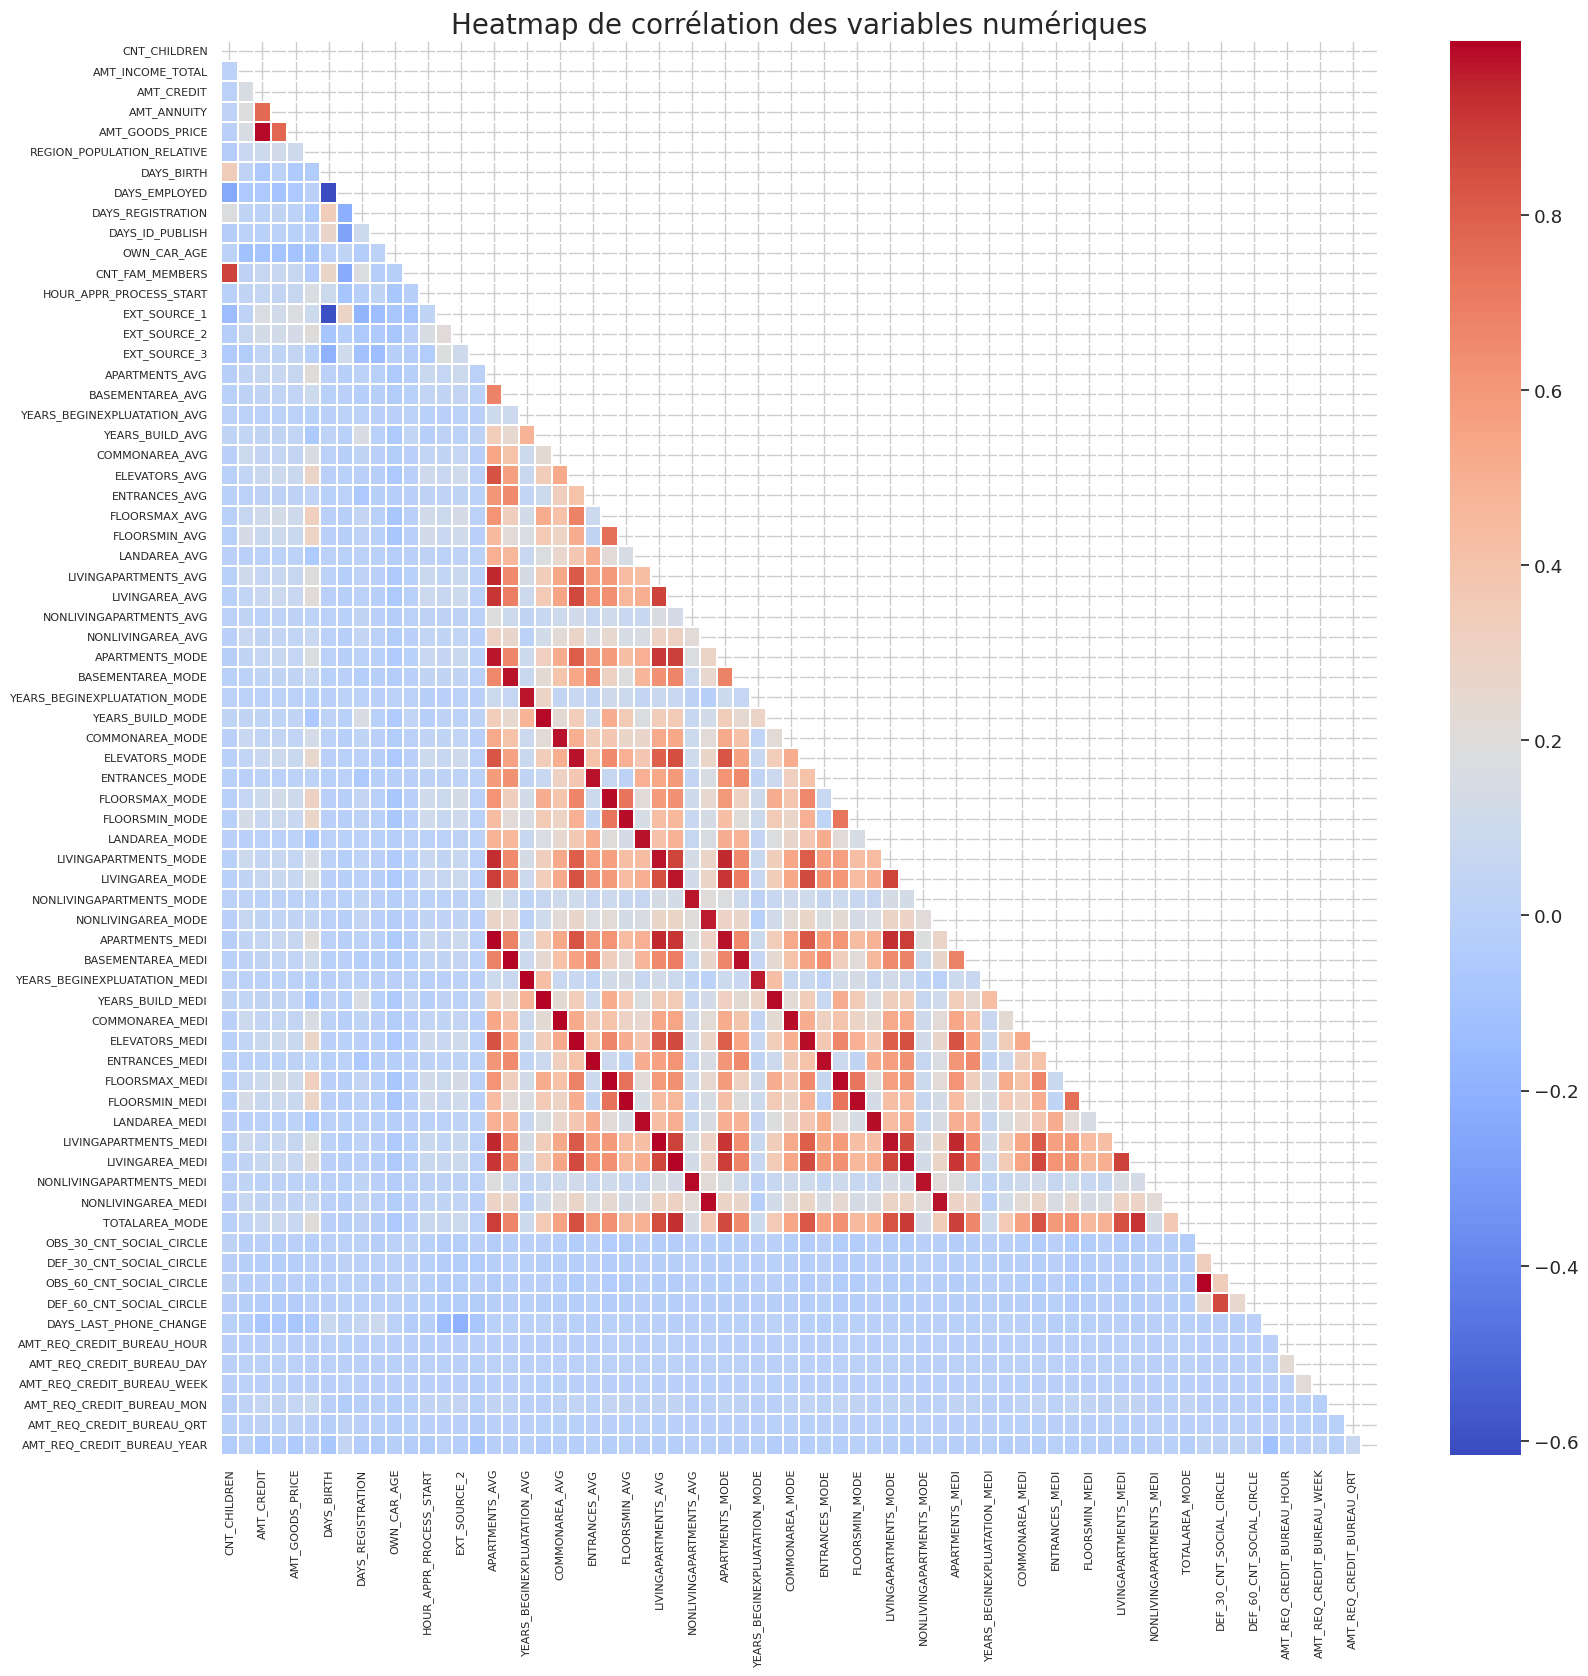

In [103]:

columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns)\
                                        - set(['TARGET']))
corr_mat = EDA_kernel_kaggle.correlation_matrix(application_train,
                                                columns_to_drop,
                                                figsize=(17, 17),
                                                fontsize=8,
                                                cmap='coolwarm')
corr_mat.plot_correlation_matrix()

In [104]:
# View the columns with the highest phik correlation with the target variable
# in the application_train table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 79)
titre1 = 'The variables with the highest Phik'
print(titre1 + '-correlation with the target variable are :')
display(top_corr_target_df.style.hide_index())
print("-"*79)

interval columns not set, guessing: ['TARGET', 'CNT_CHILDREN']
interval columns not set, guessing: ['TARGET', 'AMT_INCOME_TOTAL']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'REGION_POPULATION_RELATIVE']
interval columns not set, guessing: ['TARGET', 'DAYS_BIRTH']
interval columns not set, guessing: ['TARGET', 'DAYS_EMPLOYED']
interval columns not set, guessing: ['TARGET', 'DAYS_REGISTRATION']
interval columns not set, guessing: ['TARGET', 'DAYS_ID_PUBLISH']
interval columns not set, guessing: ['TARGET', 'OWN_CAR_AGE']
interval columns not set, guessing: ['TARGET', 'CNT_FAM_MEMBERS']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_1']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_2']
interval columns 

/tmp/ipykernel_30418/158340801.py:7: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



-------------------------------------------------------------------------------



**Summary**

---
---

* The heat map clearly shows the value or level of correlation that each particular variable has with all the other characteristics.

* Part of the heat map contains a blue colour, indicating a very low correlation value. This implies that some of the features are effectively uncorrelated with the others.

* However, we can see contrasting shades in the middle of the heat map. These shades represent a high correlation value between features. These are the features that are linked to the flat statistics.

* If we look at the variables in the train_application, we can clearly see that the flat statistics are given in terms of Mean, Median and Mode, so we can expect the mean, median and mode to be correlated with each other. It should also be noted that variables in a particular category, for example the mean, are also correlated with other mean variables, such as the number of lifts, living area, non-liveable area, basement area, etc.

* There is also a strong correlation between :
    * AMT_GOODS_PRICE and AMT_CREDIT,
    * CNT_FAM_members and CNT_Children
    * and between DAYS_EMPLOYED and DAYS_BIRTH.

* We do not want highly correlated variables because they increase the temporal complexity of the model without adding much value. As a result, we remove intercorrelated variables.

* Among all the variables, we find a high correlation for the EXT_SOURCE variables with respect to the target variable. These may be important for our classification task.

<a id='application_test_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset application_test</span></span>

This is the main table, broken into two files for Train (with TARGET) and **Test (without TARGET)**. <br>
Static data for all applications. One row represents one loan in our data sample.

In [41]:
# -----------------------------
# File upload: application_test
# -----------------------------

# linked by 'SK_ID_CURR' to "previous_application", "credit_card_balance",
# "bureau", "POS_CASH_balance" and "installments_payments"

application_test = pd.read_csv('application_test.csv', low_memory=False,
                           encoding='utf-8')
application_test.name = 'application_test'

# --------------
# Dataset size
# --------------
print("The dataset 'application_test' contains " +
      str(application_test.shape[0]) + " rows and " +
      str(application_test.shape[1]) + " columns.\n")

The dataset 'application_test' contains 48744 rows and 121 columns.



In [42]:
# ---------------
# Data overview
# ---------------
pd.options.display.max_columns = None
application_test.head(3)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0       Kindergarten      0.752614      0.789654      0.159520   
1      Self-employed      0.564990      0.291656      0.432962   
2  Transport: type 3           NaN      0.699787      0.610991   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0           0.066             0.059                       0.9732   
1             NaN               NaN                          NaN   
2             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0              NaN             NaN            NaN         0.1379   
1              NaN             NaN            NaN            NaN   
2              NaN             NaN            NaN            NaN   

   FLOORSMAX_

In [43]:
# Columns name description
HomeCredit_columns.loc[HomeCredit_columns["Table"] ==
                       "application_{train|test}.csv"].style.hide(axis=0)

In [44]:
# --------------------
# Column description
# --------------------
pd.options.display.max_rows = None
info_test = tools_dataframe.complet_description(application_test)
info_test

Variable     Type   null Duplicated  \
0                  COMMONAREA_AVG  float64  33495      13207   
1                 COMMONAREA_MODE  float64  33495      13248   
2                 COMMONAREA_MEDI  float64  33495      13215   
3         NONLIVINGAPARTMENTS_AVG  float64  33347      15156   
4        NONLIVINGAPARTMENTS_MODE  float64  33347      15291   
5        NONLIVINGAPARTMENTS_MEDI  float64  33347      15263   
6              FONDKAPREMONT_MODE   object  32797      15943   
7            LIVINGAPARTMENTS_AVG  float64  32780      14753   
8           LIVINGAPARTMENTS_MODE  float64  32780      15362   
9           LIVINGAPARTMENTS_MEDI  float64  32780      15121   
10                  FLOORSMIN_AVG  float64  32466      16080   
11                 FLOORSMIN_MODE  float64  32466      16253   
12                 FLOORSMIN_MEDI  float64  32466      16234   
13                    OWN_CAR_AGE  float64  32312      16380   
14                YEARS_BUILD_AVG  float64  31818      16796   
15               YEARS_BUILD_MEDI  float64  31818      16797   
16               YEARS_BUILD_MODE  float64  31818      16794   
17                  LANDAREA_MODE  float64  28254      17930   
18                  LANDAREA_MEDI  float64  28254      17928   
19                   LANDAREA_AVG  float64  28254      17950   
20               BASEMENTAREA_AVG  float64  27641      18287   
21              BASEMENTAREA_MEDI  float64  27641      18298   
22              BASEMENTAREA_MODE  float64  27641      18268   
23             NONLIVINGAREA_MODE  float64  26084      20635   
24             NONLIVINGAREA_MEDI  float64  26084      20630   
25              NONLIVINGAREA_AVG  float64  26084      20634   
26                  ELEVATORS_AVG  float64  25189      23374   
27                 ELEVATORS_MEDI  float64  25189      23512   
28                 ELEVATORS_MODE  float64  25189      23529   
29             WALLSMATERIAL_MODE   object  23893      24844   
30                APARTMENTS_MEDI  float64  23887      23939   
31                 APARTMENTS_AVG  float64  23887      23314   
32                APARTMENTS_MODE  float64  23887      24221   
33                 HOUSETYPE_MODE   object  23619      25122   
34                 ENTRANCES_MEDI  float64  23579      25122   
35                  ENTRANCES_AVG  float64  23579      24965   
36                 ENTRANCES_MODE  float64  23579      25135   
37                LIVINGAREA_MODE  float64  23552      21350   
38                 LIVINGAREA_AVG  float64  23552      21344   
39                LIVINGAREA_MEDI  float64  23552      21307   
40                 FLOORSMAX_MEDI  float64  23321      25376   
41                  FLOORSMAX_AVG  float64  23321      25171   
42                 FLOORSMAX_MODE  float64  23321      25398   
43   YEARS_BEGINEXPLUATATION_MODE  float64  22856      25728   
44   YEARS_BEGINEXPLUATATION_MEDI  float64  22856      25719   
45    YEARS_BEGINEXPLUATATION_AVG  float64  22856      25713   
46                 TOTALAREA_MODE  float64  22624      22300   
47            EMERGENCYSTATE_MODE   object  22209      26533   
48                   EXT_SOURCE_1  float64  20532       1005   
49                OCCUPATION_TYPE   object  15605      33121   
50                   EXT_SOURCE_3  float64   8668      39374   
51     AMT_REQ_CREDIT_BUREAU_HOUR  float64   6049      42692   
52     AMT_REQ_CREDIT_BUREAU_WEEK  float64   6049      42692   
53      AMT_REQ_CREDIT_BUREAU_MON  float64   6049      42688   
54      AMT_REQ_CREDIT_BUREAU_DAY  float64   6049      42692   
55      AMT_REQ_CREDIT_BUREAU_QRT  float64   6049      42687   
56     AMT_REQ_CREDIT_BUREAU_YEAR  float64   6049      42679   
57                NAME_TYPE_SUITE   object    911      47826   
58       OBS_30_CNT_SOCIAL_CIRCLE  float64     29      48687   
59       DEF_30_CNT_SOCIAL_CIRCLE  float64     29      48707   
60       OBS_60_CNT_SOCIAL_CIRCLE  float64     29      48688   
61       DEF_60_CNT_SOCIAL_CIRCLE  float64     29      48

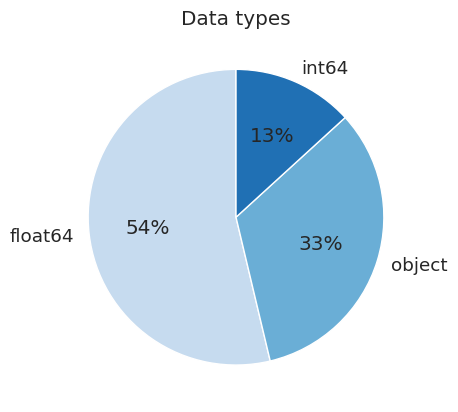

In [45]:
# Visualization data types
tools_dataframe.visu_dataTypes(info_test)

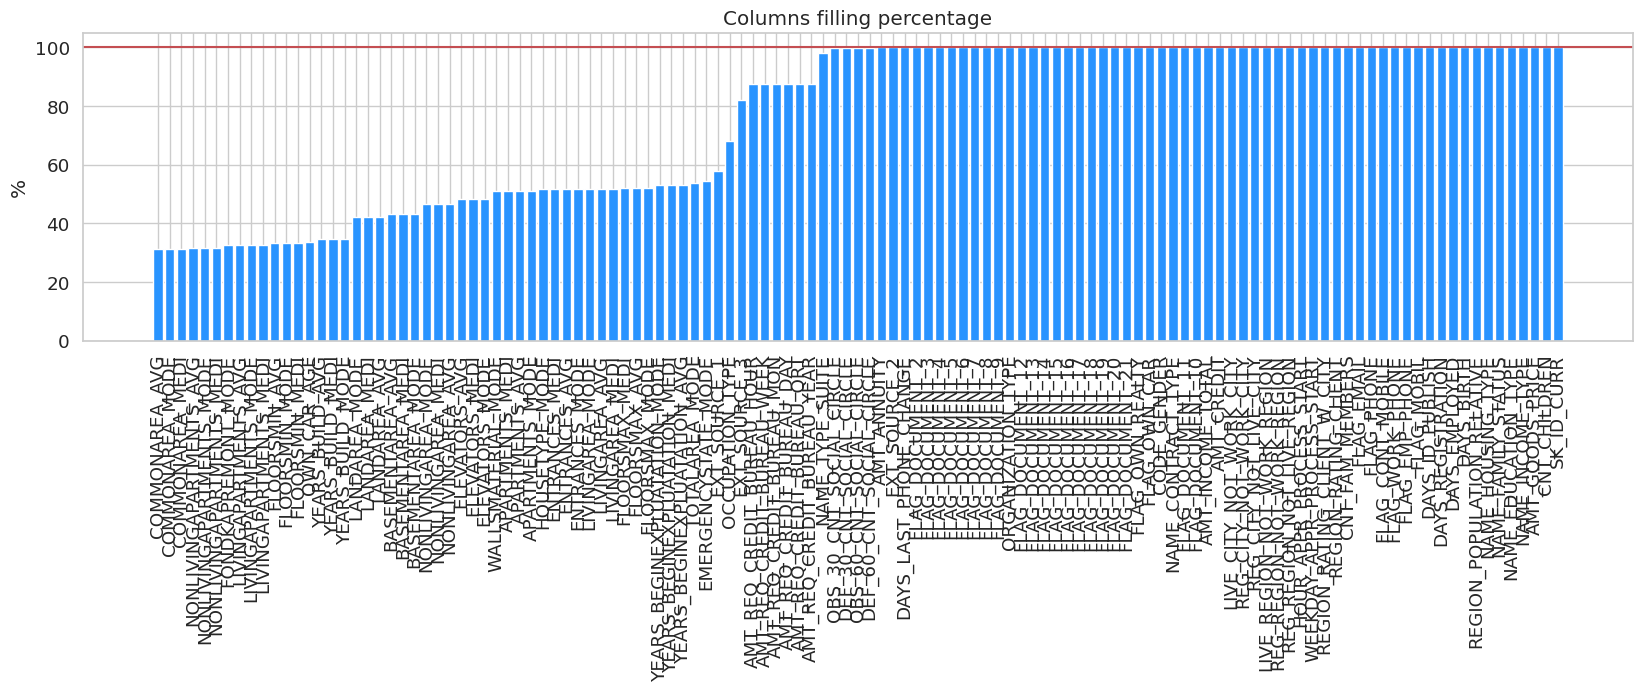

In [46]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_test)

* The application_test.csv file consists of 48744 rows and 121 variables
* The file consist on statistical data relating to loan applicants without the Target label.
* Each row represents a loan application.
* The application_test.csv dataframe contains the test dataset, and is similar to application_train.csv, except that the TARGET column has been omitted, which must be predicted using statistical and machine learning predictive models.
* Since the variables in the application_test are identical to those in application_train, the univariate analysis is not repeated.

<a id='bureau_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset bureau</span></span>

* All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
* For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [47]:
# -------------------------------
# File upload: bureau
# -------------------------------
# linked to application_{train|test} by 'SK_ID_CURR'
# linked to bureau_balance by 'SK_ID_BUREAU'
bureau = pd.read_csv('bureau.csv', low_memory=False, encoding='utf-8')
bureau.name = 'bureau'

# --------------
# Dataset size
# --------------
print("The dataset 'bureau.csv' contains " +
      str(bureau.shape[0]) + " rows and " +
      str(bureau.shape[1]) + " columns.\n")

# ---------------
# Data overview
# ---------------
bureau.head(3)

The dataset 'bureau.csv' contains 1716428 rows and 17 columns.



SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN

In [48]:
# Columns name description
HomeCredit_columns.loc[HomeCredit_columns["Table"] ==
                       "bureau.csv"].style.hide(axis=0)

In [49]:
# --------------------
# Column description
# --------------------
info_bureau = tools_dataframe.complet_description(bureau)
info_bureau

Variable     Type     null Duplicated Filling percentage  \
0              AMT_ANNUITY  float64  1226791     449316           28.52651   
1   AMT_CREDIT_MAX_OVERDUE  float64  1124488     523689          34.486736   
2        DAYS_ENDDATE_FACT  float64   633653    1079858          63.083042   
3     AMT_CREDIT_SUM_LIMIT  float64   591780    1072922          65.522585   
4      AMT_CREDIT_SUM_DEBT  float64   257669    1232222          84.988068   
5      DAYS_CREDIT_ENDDATE  float64   105553    1596779          93.850427   
6           AMT_CREDIT_SUM  float64       13    1479707          99.999243   
7            CREDIT_ACTIVE   object        0    1716424              100.0   
8          CREDIT_CURRENCY   object        0    1716424              100.0   
9              DAYS_CREDIT    int64        0    1713505              100.0   
10      CREDIT_DAY_OVERDUE    int64        0    1715486              100.0   
11      DAYS_CREDIT_UPDATE    int64        0    1713446              100.0   
12      CNT_CREDIT_PROLONG    int64        0    1716418              100.0   
13  AMT_CREDIT_SUM_OVERDUE  float64        0    1714812              100.0   
14             CREDIT_TYPE   object        0    1716413              100.0   
15            SK_ID_BUREAU    int64        0          0              100.0   
16              SK_ID_CURR    int64        0    1410617              100.0   

        count unique              top     freq            mean            std  \
0    489637.0    NaN              NaN      NaN      15712.7577  325826.949053   
1    591940.0    NaN              NaN      NaN     3825.417661  206031.606207   
2   1082775.0    NaN              NaN      NaN    -1017.437148     714.010626   
3   1124648.0    NaN              NaN      NaN      6229.51498   45032.031476   
4   1458759.0    NaN              NaN      NaN   137085.119952  677401.130952   
5   1610875.0    NaN              NaN      NaN      510.517362    4994.219837   
6   1716415.0    NaN              NaN      NaN   354994.591918  1149811.34398   
7     1716428      4           Closed  1079273             NaN            NaN   
8     1716428      4       currency 1  1715020             NaN            NaN   
9   1716428.0    NaN              NaN      NaN    -1142.107685     795.164928   
10  1716428.0    NaN              NaN      NaN        0.818167      36.544428   
11  1716428.0    NaN              NaN      NaN      -593.74832     720.747312   
12  1716428.0    NaN              NaN      NaN         0.00641       0.096224   
13  1716428.0    NaN              NaN      NaN       37.912758    5937.650035   
14    1716428     15  Consumer credit  1251615             NaN            NaN   
15  1716428.0    NaN              NaN      NaN  5924434.489032  532265.728552   
16  1716428.0    NaN              NaN      NaN   278214.933645  102938.558112   

           min         25%        50%         75%          max  
0          0.0         0.0        0.0     13500.0  118453423.5  
1          0.0         0.0        0.0         0.0  115987185.0  
2     -42023.0     -1489.0     -897.0      -425.0          0.0  
3  -586406.115         0.0        0.0         0.0   4705600.32  
4  -4705600.32         0.0        0.0     40153.5  170100000.0  
5     -42060.0     -1138.0     -330.0       474.0      31199.0  
6          0.0     51300.0   125518.5    315000.0  585000000.0  
7          NaN         NaN        NaN         NaN          NaN  
8          NaN         NaN        NaN         NaN          NaN  
9      -2922.0     -1666.0     -987.0      -474.0          0.0  
10         0.0         0.0        0.0         0.0       2792.0  
11    -41947.0      -908.0     -395.0       -33.0        372.0  
12         0.0         0.0        0.0         0.0          9.0  
13         0.0         0.0        0.0         0.0    3756681.0  
14         NaN         NaN        NaN         NaN          NaN  
15   5000000.0  5463953.75  5926303.5  6385681.25    6843457.0  
16    100001.0   188866.75   278055.0    367426.0

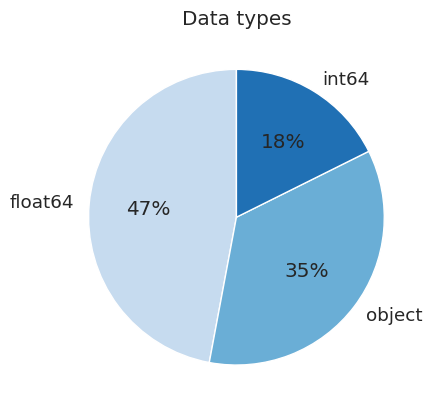

In [50]:
# Visualization data types
tools_dataframe.visu_dataTypes(info_bureau)

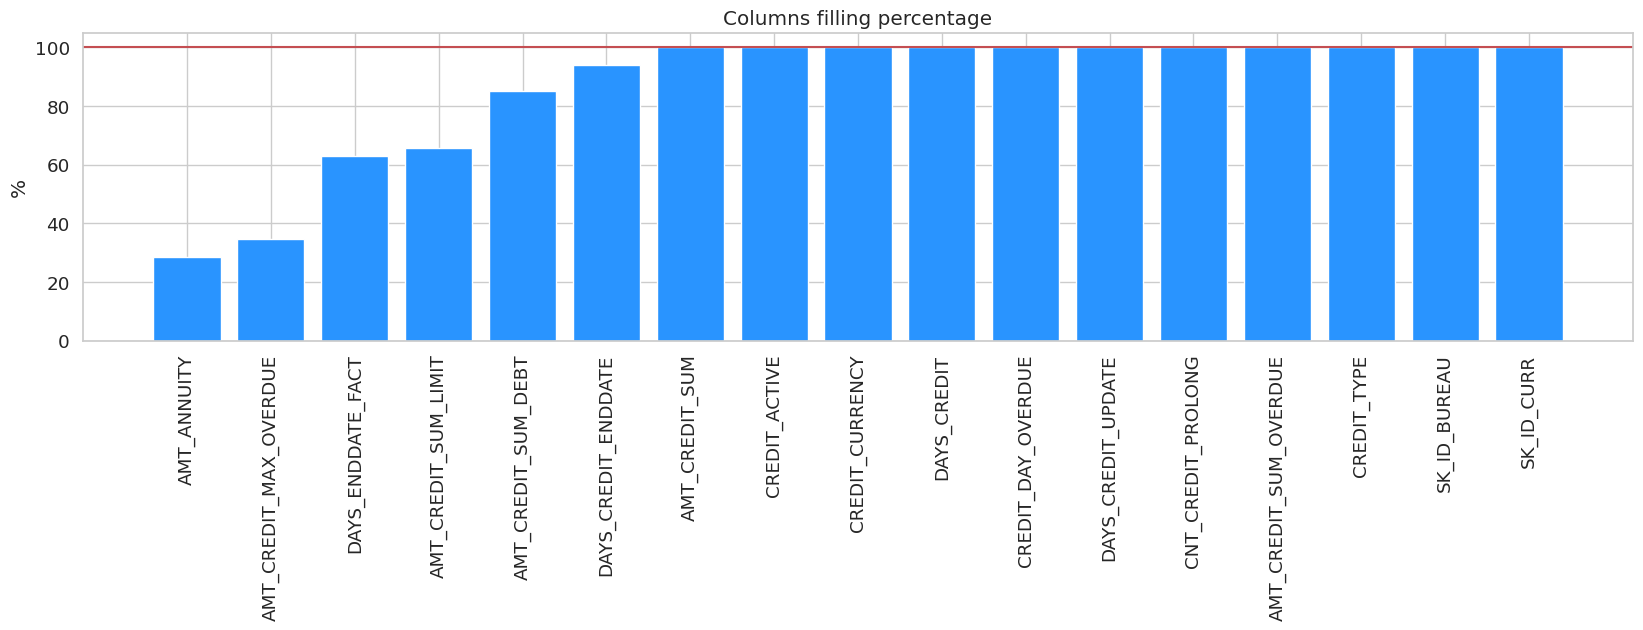

In [51]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_bureau)

In [52]:
# Analysis of common and unique values of SK_ID_BUREAU
EDA_kernel_kaggle.common_values_dataframes(bureau, application_train,
                                           application_test, 'SK_ID_BUREAU')

-------------------------------------------------------------------------------
Number of unique values for SK_ID_BUREAU in bureau.csv : 1716428
Number of unique values for SK_ID_CURR in bureau.csv : 305811
Number of unique values for SK_ID_CURR in application_train.csv and bureau.csv : 263491
Number of common values for SK_ID_CURR in application_train.csv and bureau.csv : 42320
-------------------------------------------------------------------------------
Number of duplicate values in bureau.csv : 0
-------------------------------------------------------------------------------


**Observations and Conclusions:**

<ol><li>The bureau.csv file contains close to 1.7M datapoints, with 17 features. Out of these 17 features, two are SK_ID_CURR and SK_ID_BUREAU.
    <ul><li>SK_ID_BUREAU is the loan ID of the client's previous loan from other financial institutions. There may be multiple previous loans corresponding to a single SK_ID_CURR which depends on client's borrowing pattern.
    <li>SK_ID_CURR is the loan ID of client's current loan with Home Credit.
    <li>The rest of the features contain other stats such as DAYS_CREDIT, AMT_CREDIT_SUM, CREDIT_TYPE, etc.
    </ul></li>
    <li>There are 305k unique SK_ID_CURR in bureau out of which:
        <ul><li>There are 263k SK_ID_CURR in bureau which are present in application_train out of total of total 307k of application_train's unique SK_ID_CURR. This means that some of the applicants in current loan application with Home Credit Group do not have any previous Credit history with Credit Bureau Department.<br>
        <li>Similarly, there are 42.3k SK_ID_CURR in bureau which are present in application_test, out of total 48k of application_test's unique SK_ID_CURR.</ul>

<b>Merging the TARGETS from application_train to bureau table.</b>

In [53]:
print("-"*100)
print("Merging TARGET with bureau Table")
bureau_merged = application_train.iloc[:,:2].merge(bureau, on = 'SK_ID_CURR', how = 'left')
print("-"*100)

----------------------------------------------------------------------------------------------------
Merging TARGET with bureau Table
----------------------------------------------------------------------------------------------------


<a id='bureau_plot_categ_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting categorical variables</span></span>

We will now plot some of the Categorical Variables of the table bureau, and see their impact on the Target Variable.

<b><u>Distribution of Categorical Variable CREDIT_ACTIVE</u></b>

This column describes the Status of the previous loan reported from Credit Bureau.

----------------------------------------------------------------------------------------------------
The unique categories of 'CREDIT_ACTIVE' are:
['Closed' 'Active' nan 'Sold' 'Bad debt']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Closed      917733
Active      541919
Sold          5653
Bad debt        20
Name: CREDIT_ACTIVE, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CREDIT_ACTIVE = 5


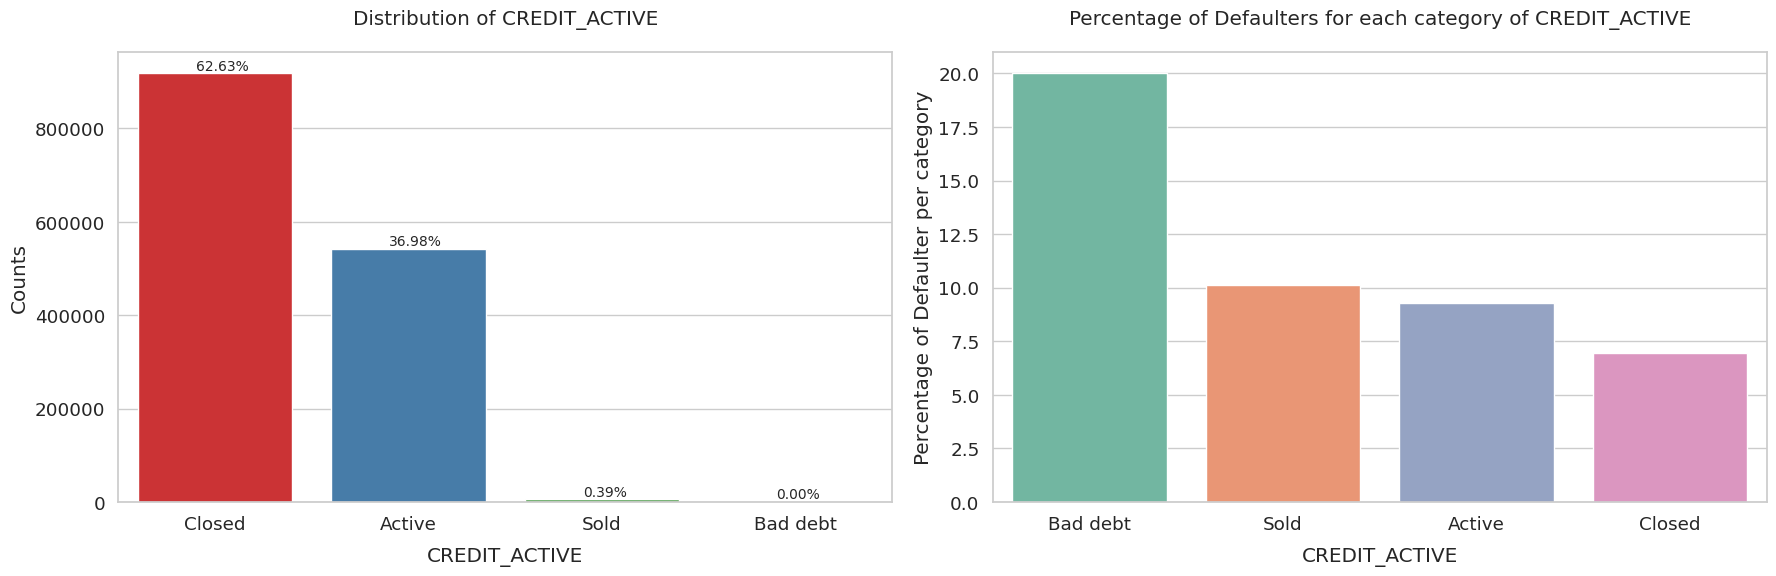

In [54]:
#let us first see the unique categories of 'CREDIT_ACTIVE'
EDA_kernel_kaggle.print_unique_categories(bureau_merged, 'CREDIT_ACTIVE',
                                          show_counts = True)

# plotting the Bar Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_bar(bureau_merged,
                                                column_name = 'CREDIT_ACTIVE',
                                                 horizontal_adjust = 0.3,
                                                 fontsize_percent = 'x-small')

**Observations and Conclusions:**

From the above plot, we can draw the following insights:
<ol><li>From the first subplot, we see that a majority of the previous loans from other financial institutions are Closed Loans (62.63%), followed by 36.98% active loans. The sold and Bad-Debt Loans are very less in number.</li>
    <li>If we look at the Defaulters Percentage per category, we see that about 20% of people from Bad-Debt defaulted, which is the highest default rate. This is followed by Sold loans and Active Loans. The lowest default rate is for Closed Loans, which show a good history about a client. Thus the patten observed here is quite logical and expected.

<a id='bureau_plot_conti_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting continous variables</span></span>

<u><b>Distribution of Continuous Variable with DAYS Features</b></u>

<b>DAYS_CREDIT</b>

This column describes about the number of days before current application when the client applied for Credit Bureau Credit. For ease of interpretability, we will convert these days to years.

/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:263: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:265: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

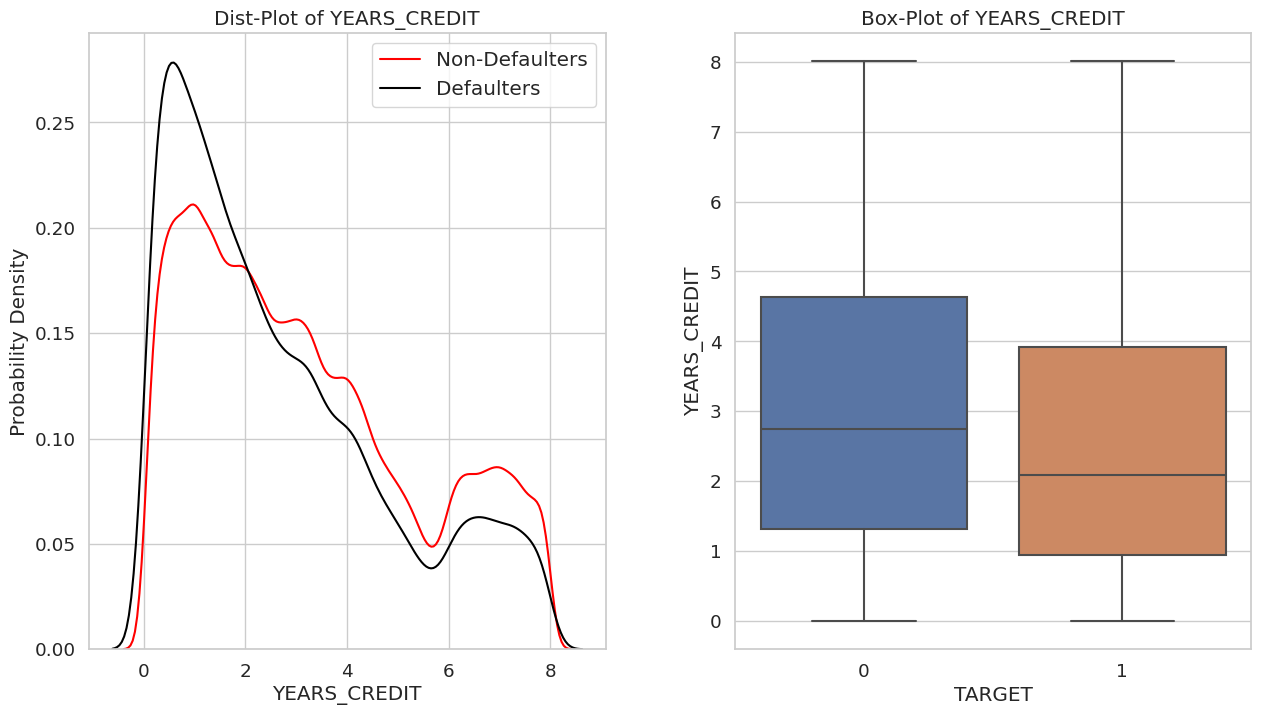

In [56]:
bureau_merged['YEARS_CREDIT'] = bureau_merged['DAYS_CREDIT'] / -365

EDA_kernel_kaggle.plot_continuous_variables(bureau_merged, 'YEARS_CREDIT',
                                            plots = ['distplot', 'box'],
                                            figsize = (15,8))
_ = bureau_merged.pop('YEARS_CREDIT')

**Observations and Conclusions:**

From the above plots, we see that:
<ol><li>From the PDF, we see that the Defaulters tend to have higher peaks compared to Non-Defaulters when the number of years are less.. This implies that the applicants who had applied for loans from Credit Bureau recently showed more defaulting tendency than those who had applied long ago. The PDF of Defaulters is also a bit towards left as compared to Non-Defaulters.</li>
    <li>Fro the box-plot as well, we see that Defaulters usually had less YEARS_CREDIT as compared to Non-Defaulters.

<b>DAYS_CREDIT_ENDDATE</b>

This column tells about the remaining duration of Credit Bureau credit at the time of application for loan in Home Credit.

----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_CREDIT_ENDDATE is -42060.0
The 2th percentile value of DAYS_CREDIT_ENDDATE is -2487.0
The 4th percentile value of DAYS_CREDIT_ENDDATE is -2334.0
The 6th percentile value of DAYS_CREDIT_ENDDATE is -2202.0
The 8th percentile value of DAYS_CREDIT_ENDDATE is -2073.9199999999983
The 10th percentile value of DAYS_CREDIT_ENDDATE is -1939.0
The 25th percentile value of DAYS_CREDIT_ENDDATE is -1144.0
The 50th percentile value of DAYS_CREDIT_ENDDATE is -334.0
The 75th percentile value of DAYS_CREDIT_ENDDATE is 473.0
The 100th percentile value of DAYS_CREDIT_ENDDATE is 31199.0
----------------------------------------------------------------------------------------------------


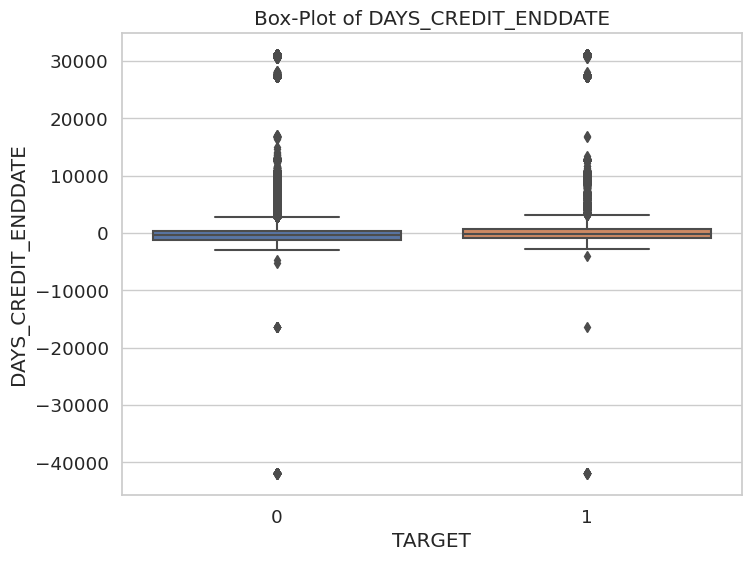

In [57]:
EDA_kernel_kaggle.print_percentiles(bureau_merged, 'DAYS_CREDIT_ENDDATE',
                                    percentiles = list(range(0,11,2)) +
                                    [25,50,75,100])
EDA_kernel_kaggle.plot_continuous_variables(bureau_merged,
                                            'DAYS_CREDIT_ENDDATE', 
                                            plots = ['box'], figsize = (8,6))

**Observations and Conclusions:**

From the above percentile values, and looking at the box-plot, we see that there seems to be erroneous value for DAYS_CREDIT_ENDDATE, where the 0th percentile value dates back to as long as 42060 days or 115 years. This does not make much sense as this implies that the previous loan the client had dates back to 115 years ago. This could be inherited loan too, but we cannot comment so surely about that. We would try to remove these values in the data preprocessing stage.

<b>DAYS_ENDDATE_FACT</b>

This column tells about the the number of days ago that the Credit Bureau credit had ended at the time of application for loan in Home Credit. These values are only for Closed Credits.

----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_ENDDATE_FACT is -42023.0
The 2th percentile value of DAYS_ENDDATE_FACT is -2561.0
The 4th percentile value of DAYS_ENDDATE_FACT is -2450.0
The 6th percentile value of DAYS_ENDDATE_FACT is -2351.0
The 8th percentile value of DAYS_ENDDATE_FACT is -2265.0
The 10th percentile value of DAYS_ENDDATE_FACT is -2173.0
The 25th percentile value of DAYS_ENDDATE_FACT is -1503.0
The 50th percentile value of DAYS_ENDDATE_FACT is -900.0
The 75th percentile value of DAYS_ENDDATE_FACT is -427.0
The 100th percentile value of DAYS_ENDDATE_FACT is 0.0
----------------------------------------------------------------------------------------------------


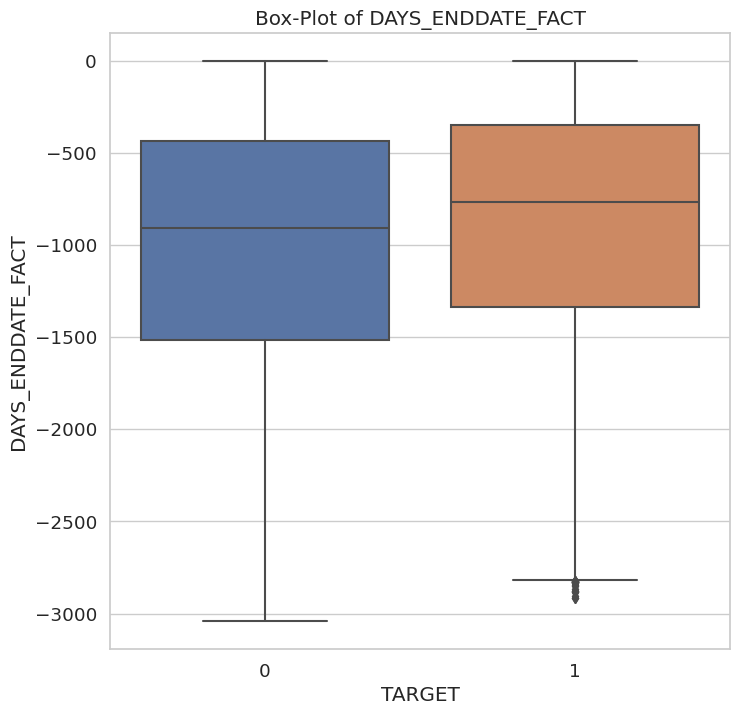

In [58]:
EDA_kernel_kaggle.print_percentiles(bureau_merged, 'DAYS_ENDDATE_FACT',
                                    percentiles = list(range(0,11,2)) +
                                    [25,50,75,100])
EDA_kernel_kaggle.plot_continuous_variables(bureau_merged, 'DAYS_ENDDATE_FACT', plots = ['box'], figsize = (8,8), 
                                            scale_limits = [-40000, 0])

**Observations and Conclusions:**

<ol><li>Just like previous column, we see that the 0th percentile for this column also seems erroneous, which is 42023 days or ~115 years. We would have to remove these values, as they don't make much sense.</li>
    <li>Looking at the box-plot, we see that the Defaulters tend to have lesser number of days since their Credit Bureau credit had ended. The Non-Defaulters usually have their previous credits ended longer before than Defaulters.

<b>DAYS_CREDIT_UPDATE</b>

This column tells about the the number of days ago that the information from Credit Bureau credit had come at the time of application for loan in Home Credit.

----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_CREDIT_UPDATE is -41947.0
The 2th percentile value of DAYS_CREDIT_UPDATE is -2415.0
The 4th percentile value of DAYS_CREDIT_UPDATE is -2213.0
The 6th percentile value of DAYS_CREDIT_UPDATE is -2002.0
The 8th percentile value of DAYS_CREDIT_UPDATE is -1766.0
The 10th percentile value of DAYS_CREDIT_UPDATE is -1582.0
The 25th percentile value of DAYS_CREDIT_UPDATE is -904.0
The 50th percentile value of DAYS_CREDIT_UPDATE is -406.0
The 75th percentile value of DAYS_CREDIT_UPDATE is -33.0
The 100th percentile value of DAYS_CREDIT_UPDATE is 372.0
----------------------------------------------------------------------------------------------------


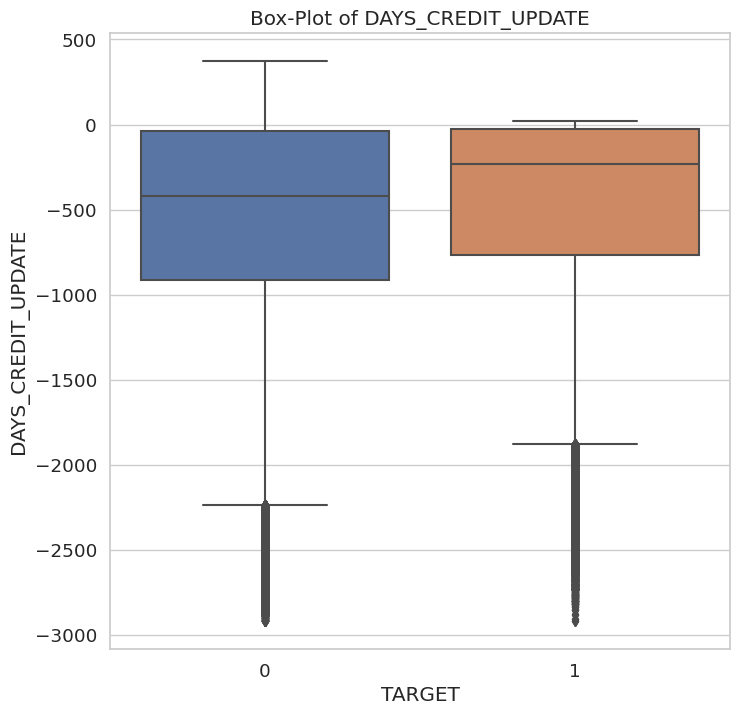

In [59]:
EDA_kernel_kaggle.print_percentiles(bureau_merged, 'DAYS_CREDIT_UPDATE',
                                    percentiles = list(range(0,11,2)) +
                                    [25,50,75,100])
EDA_kernel_kaggle.plot_continuous_variables(bureau_merged,
                                            'DAYS_CREDIT_UPDATE',
                                            plots = ['box'], figsize = (8,8),
                                            scale_limits = [-40000, 400])

**Observations and Conclusions:**

<ol><li>The trend of erroneious values is again very similar to the other days column where this 0th percentile value seems to be erroneous. Also since only the 0th percentile value is so odd, and the rest seem to be fine, thus this value is definitely erroneous. We will be removing this value too. 
    <li>From the box-plot, we can say that the Defaulters tend to have a lesser number of days since their Information about the Credit Bureau Credit were received. Their median, 75th percentile values all are lesser than those for Non-Defaulters.</ol>

<a id='bureau_phik_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Phi-K matrix</span></span>

-------------------------------------------------------------------------------


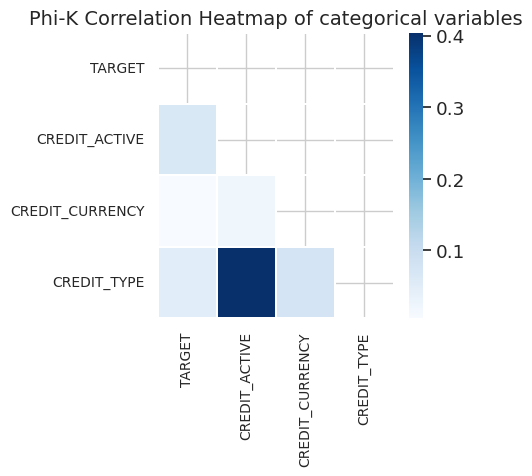

-------------------------------------------------------------------------------
The categories with the highest values of Phi-K correlation with the target variable are as follows :


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:391: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



-------------------------------------------------------------------------------


In [105]:
cols_for_phik = ['TARGET','CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
EDA_kernel_kaggle.plot_phik_matrix(bureau_merged, cols_for_phik,
                                   figsize = (5,5))

***Observations and Conclusions:***

The above heatmap shows the Phi-K Correlation values between categorical values.
<ol>
<li>From the Phi-K Correlation Coefficient, we see that the variable CREDIT_TYPE shows some association with the variable CREDIT_ACTIVE.</li>
<li>We see that the Categorical Variables don't really have a high association with TARGET variable, especially the CREDIT_CURRENCY feature.</li>
    </ol>

<a id='bureau_correlation_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Correlation matrix</span></span>

/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:467: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



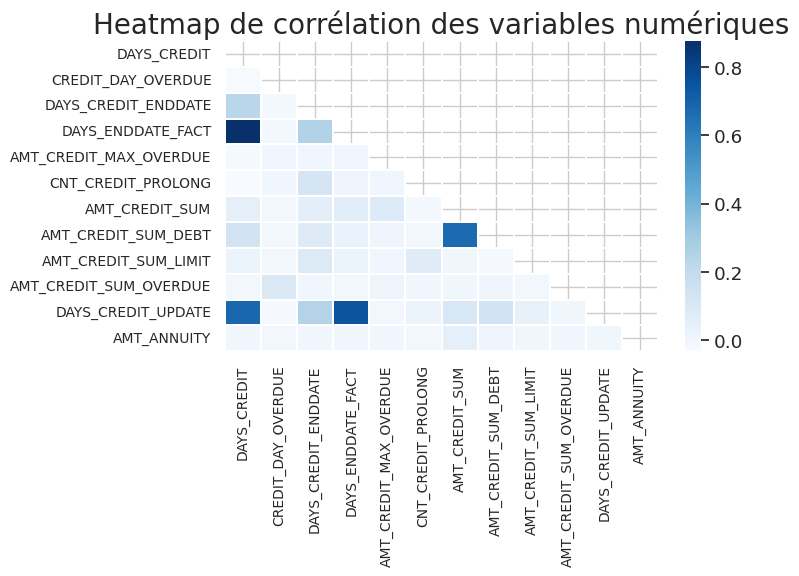

In [106]:
corr_mat = EDA_kernel_kaggle.correlation_matrix(bureau_merged,
                                                ['SK_ID_CURR','SK_ID_BUREAU'],
                                                cmap = 'Blues',
                                                figsize = (8,6))
corr_mat.plot_correlation_matrix()

In [107]:
#Seeing the top columns with highest phik-correlation with the target variable in bureau table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT']
interval columns not set, guessing: ['TARGET', 'CREDIT_DAY_OVERDUE']
interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT_ENDDATE']
interval columns not set, guessing: ['TARGET', 'DAYS_ENDDATE_FACT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_MAX_OVERDUE']
interval columns not set, guessing: ['TARGET', 'CNT_CREDIT_PROLONG']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_DEBT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_LIMIT']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_SUM_OVERDUE']
interval columns not set, guessing: ['TARGET', 'DAYS_CREDIT_UPDATE']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
----------------------------------------------------------------------------------------------------
Columns with highest values of Phik-correlation with Target Variable are:


Column Name  Phik-Correlation
0              DAYS_CREDIT          0.088651
2      DAYS_CREDIT_ENDDATE          0.018980
9   AMT_CREDIT_SUM_OVERDUE          0.005654
8     AMT_CREDIT_SUM_LIMIT          0.005192
4   AMT_CREDIT_MAX_OVERDUE          0.004280
5       CNT_CREDIT_PROLONG          0.003862
1       CREDIT_DAY_OVERDUE          0.002528
10      DAYS_CREDIT_UPDATE          0.002219
7      AMT_CREDIT_SUM_DEBT          0.001695
6           AMT_CREDIT_SUM          0.000670

----------------------------------------------------------------------------------------------------


**Observations and Conclusions:**

<ol>
    <li>The heatmap above shows the correlation between each feature in bureau table with the rest of the features.</li>
    <li>It can be observed that most of the heatmap has light colors, which shows little to no correlation.</li>
    <li>However, we can see some dark shades which represent high correlation.</li>
    <li>The high correlation is particularly observed for features:
        <ol><li>DAYS_CREDIT and DAYS_CREDIT_UPDATE</li>
            <li>DAYS_ENDDATE_FACT and DAYS_CREDIT_UPDATE</li>
            <li>AMT_CREDIT_SUM and AMT_CREDIT_SUM_DEBT</li>
            <li>DAYS_ENDDATE_FACT and DAYS_CREDIT</li></ol></li>
    <li>We can also see that the features don't particularly show good/high correlation with Target as such, except for DAYS_CREDIT feature. This implies that there isn't a direct linear relation between Target and the features.</li></ol>

<a id='bureau_balance_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset bureau_balance</span></span>

* Monthly balances of previous credits in Credit Bureau.
* This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [60]:
# -------------------------------
# File upload: bureau_balance
# -------------------------------
# linked to bureau by 'SK_ID_BUREAU'
bureau_balance = pd.read_csv('bureau_balance.csv', low_memory=False,
                                     encoding='utf-8')
bureau_balance.name = 'bureau_balance'

# --------------
# Dataset size
# --------------
print("The dataset 'bureau_balance.csv' contains " +
      str(bureau_balance.shape[0]) + " rows and " +
      str(bureau_balance.shape[1]) + " columns.\n")

# ---------------
# Data overview
# ---------------
bureau_balance.head(3)

The dataset 'bureau_balance.csv' contains 27299925 rows and 3 columns.



SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C

In [61]:
# Columns name description
HomeCredit_columns.loc[HomeCredit_columns["Table"] ==
                       "bureau_balance.csv"].style.hide(axis=0)

In [62]:
# --------------------
# Column description
# --------------------
info_bureau_balance = tools_dataframe.complet_description(bureau_balance)
info_bureau_balance

Variable    Type null Duplicated Filling percentage       count  \
0    SK_ID_BUREAU   int64    0   26482530              100.0  27299925.0   
1  MONTHS_BALANCE   int64    0   27299828              100.0  27299925.0   
2          STATUS  object    0   27299917              100.0    27299925   

  unique  top      freq            mean            std        min        25%  \
0    NaN  NaN       NaN  6036297.332974  492348.856904  5001709.0  5730933.0   
1    NaN  NaN       NaN      -30.741687      23.864509      -96.0      -46.0   
2      8    C  13646993             NaN            NaN        NaN        NaN   

         50%        75%        max  
0  6070821.0  6431951.0  6842888.0  
1      -25.0      -11.0        0.0  
2        NaN        NaN        NaN

In [63]:
print("-"*79)
val = len(bureau_balance.SK_ID_BUREAU.unique())
print(f'Nombre de valeurs uniques SK_ID_BUREAU : {val}')
print('-'*79)
val1 = len(bureau_balance.STATUS.unique())
val2 = bureau_balance.STATUS.unique()
print(f'Nombre de valeurs uniques STATUS : {val1}')
print(f"Liste des valeurs uniques de STATUS :\n{val2}")
print('-'*79)
val3 = np.abs(bureau_balance.MONTHS_BALANCE.min())
print(f"Nombre maximal de mois pour le solde des mois : {val3}")
print('-'*79)



-------------------------------------------------------------------------------
Nombre de valeurs uniques SK_ID_BUREAU : 817395
-------------------------------------------------------------------------------
Nombre de valeurs uniques STATUS : 8
Liste des valeurs uniques de STATUS :
['C' '0' 'X' '1' '2' '3' '5' '4']
-------------------------------------------------------------------------------
Nombre maximal de mois pour le solde des mois : 96
-------------------------------------------------------------------------------


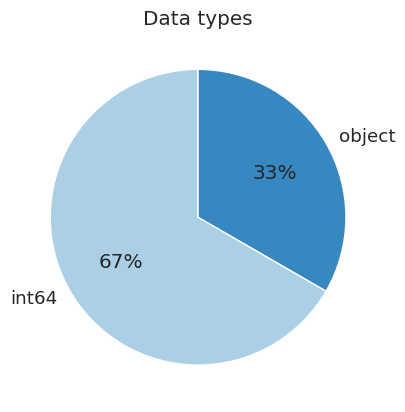

In [64]:
# Visualization data types
tools_dataframe.visu_dataTypes(info_bureau_balance)

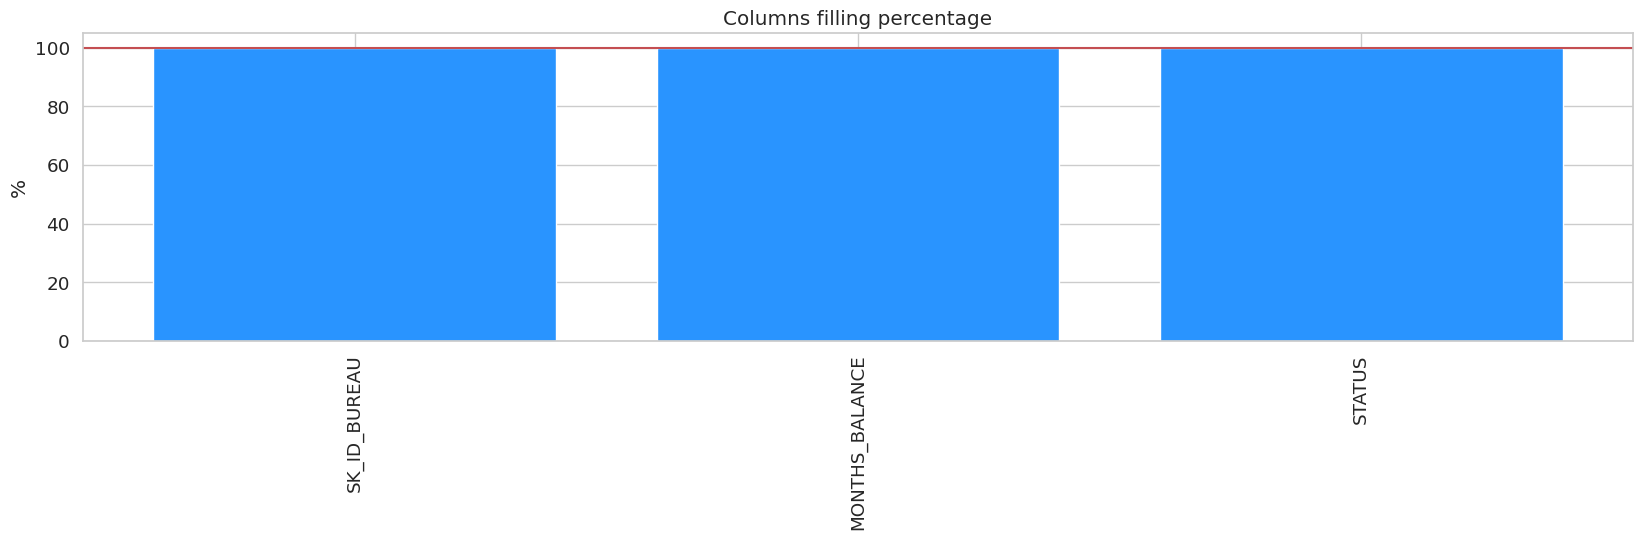

In [65]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_bureau_balance)

**Observations and Conclusions**

<ol><li>The bureau_balance.csv table contains approximately 27.29M rows, and 3 columns.</li>
    <li>This table contains the monthly status for each of the previous loan for a particular applicant reported by the Credit Bureau Department.
    <li>There are 8 unique values for the STATUS which are encoded. Each of them have a special meaning. <br>
        C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off.
     <li>The most earliest month's balance that we have is the 96 months back status, i.e. the Status has been provided upto 8 years of history for loans for which those exist.

<a id='previous_application_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset previous_application</span></span>

* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

In [66]:
# -------------------------------
# File upload: previous_application
# -------------------------------
# linked to application_{train|test} by 'SK_ID_BUREAU'
# linked by 'SK_ID_BUREAU' to POS_CASH_balance, instalments_payments
# and credit_card_balance
previous_application = pd.read_csv('previous_application.csv',
                                           low_memory=False,
                                           encoding='utf-8')
previous_application.name = 'previous_application'

# --------------
# Dataset size
# --------------
print("The dataset 'previous_application.csv' contains " +
      str(previous_application.shape[0]) + " rows and " +
      str(previous_application.shape[1]) + " columns.\n")

# ---------------
# Data overview
# ---------------
previous_application.head(3)

The dataset 'previous_application.csv' contains 1670214 rows and 37 columns.



SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0

In [67]:
# Columns name description
HomeCredit_columns.loc[HomeCredit_columns["Table"] ==
                       "previous_application.csv"].style.hide(axis=0)

In [68]:
# --------------------
# Column description
# --------------------
info_previous_appli = tools_dataframe.complet_description(previous_application)
info_previous_appli

Variable     Type     null Duplicated  \
0      RATE_INTEREST_PRIVILEGED  float64  1664263       5926   
1         RATE_INTEREST_PRIMARY  float64  1664263       5803   
2             RATE_DOWN_PAYMENT  float64   895844     567337   
3              AMT_DOWN_PAYMENT  float64   895844     745092   
4               NAME_TYPE_SUITE   object   820405     849802   
5     NFLAG_INSURED_ON_APPROVAL  float64   673065     997147   
6            DAYS_FIRST_DRAWING  float64   673065     994311   
7                DAYS_FIRST_DUE  float64   673065     994257   
8     DAYS_LAST_DUE_1ST_VERSION  float64   673065     992544   
9                 DAYS_LAST_DUE  float64   673065     994276   
10             DAYS_TERMINATION  float64   673065     994319   
11              AMT_GOODS_PRICE  float64   385515    1190814   
12                  AMT_ANNUITY  float64   372235     940020   
13                  CNT_PAYMENT  float64   372230    1297935   
14          PRODUCT_COMBINATION   object      346    1669851   
15                   AMT_CREDIT  float64        1    1583410   
16            NAME_PRODUCT_TYPE   object        0    1670211   
17             NAME_YIELD_GROUP   object        0    1670209   
18             SELLERPLACE_AREA    int64        0    1668117   
19         NAME_SELLER_INDUSTRY   object        0    1670203   
20                 CHANNEL_TYPE   object        0    1670206   
21               NAME_PORTFOLIO   object        0    1670209   
22                   SK_ID_PREV    int64        0          0   
23             NAME_CLIENT_TYPE   object        0    1670210   
24           CODE_REJECT_REASON   object        0    1670205   
25                DAYS_DECISION    int64        0    1667292   
26         NAME_CONTRACT_STATUS   object        0    1670210   
27       NAME_CASH_LOAN_PURPOSE   object        0    1670189   
28       NFLAG_LAST_APPL_IN_DAY    int64        0    1670212   
29  FLAG_LAST_APPL_PER_CONTRACT   object        0    1670212   
30      HOUR_APPR_PROCESS_START    int64        0    1670190   
31   WEEKDAY_APPR_PROCESS_START   object        0    1670207   
32              AMT_APPLICATION  float64        0    1576329   
33           NAME_CONTRACT_TYPE   object        0    1670210   
34                   SK_ID_CURR    int64        0    1331357   
35          NAME_GOODS_CATEGORY   object        0    1670186   
36            NAME_PAYMENT_TYPE   object        0    1670210   

   Filling percentage      count unique                      top     freq  \
0            0.356302     5951.0    NaN                      NaN      NaN   
1            0.356302     5951.0    NaN                      NaN      NaN   
2            46.36352   774370.0    NaN                      NaN      NaN   
3            46.36352   774370.0    NaN                      NaN      NaN   
4           50.880246     849809      7            Unaccompanied   508970   
5           59.701871   997149.0    NaN                      NaN      NaN   
6           59.701871   997149.0    NaN                      NaN      NaN   
7           59.701871   997149.0    NaN                      NaN      NaN   
8           59.701871   997149.0    NaN                      NaN      NaN   
9           59.701871   997149.0    NaN                      NaN      NaN   
10          59.701871   997149.0    NaN                      NaN      NaN   
11          76.918227  1284699.0    NaN                      NaN      NaN   
12          77.713335  1297979.0    NaN                      NaN      NaN   
13          77.713634  1297984.0    NaN                      NaN      NaN   
14          99.979284    1669868     17                     Cash   285990   
15           99.99994  1670213.0    NaN                      NaN      NaN   
16              100.0    1670214      3                      XNA  1063666   
17              100.0    1670214      5                      XNA   517215   
18              100.0  1670214.0    NaN                      NaN      NaN   
19              100.0    1670214     11           

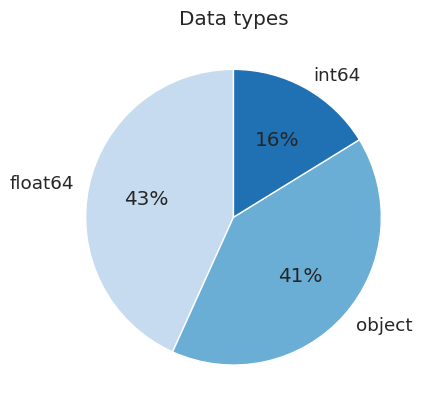

In [69]:
# Visualization data types
tools_dataframe.visu_dataTypes(info_previous_appli)

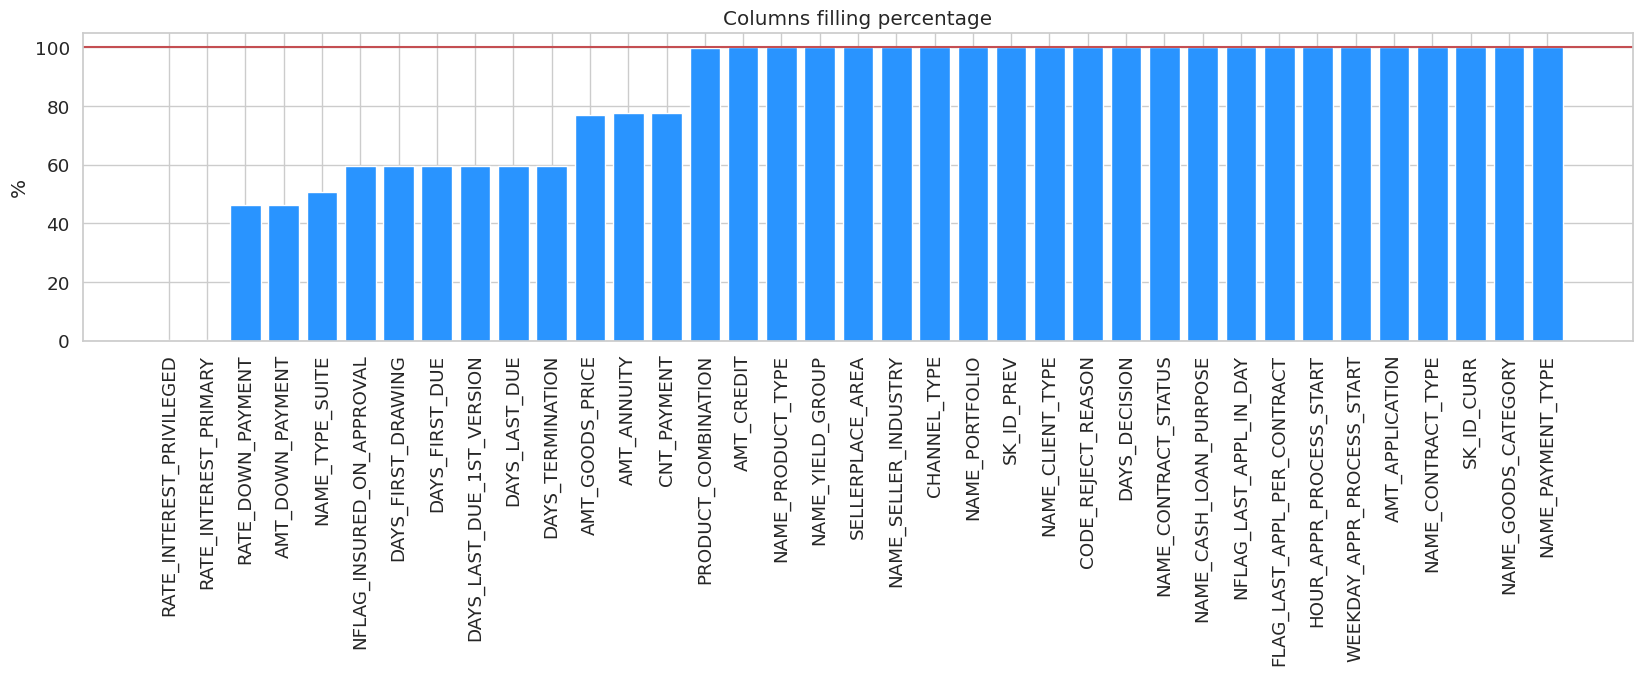

In [70]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_previous_appli)

In [71]:
# Analysis of common and unique values of SK_ID_PREV
EDA_kernel_kaggle.common_values_dataframes(previous_application,
                                           application_train,
                                           application_test,
                                           'SK_ID_PREV')

-------------------------------------------------------------------------------
Number of unique values for SK_ID_PREV in previous_application.csv : 1670214
Number of unique values for SK_ID_CURR in previous_application.csv : 338857
Number of unique values for SK_ID_CURR in application_train.csv and previous_application.csv : 291057
Number of common values for SK_ID_CURR in application_train.csv and previous_application.csv : 47800
-------------------------------------------------------------------------------
Number of duplicate values in previous_application.csv : 0
-------------------------------------------------------------------------------


**Observations and Conclusions:**

<ol><li>The table previous_application.csv consists of 1.67M rows in total. Each row corresponds to each of the previous loan that the client had with previously with Home Credit Group. It is possible for a single client of current application to have multiple previous loans with Home Credit Group.</li>
    <li>There are 37 columns in previous_application.csv, which contain the details about the previous loan.</li>
    <li>There are 338k unique SK_ID_CURR in previous_application, of which 291k correspond to the application_train SK_ID_CURRs and 47.8k correspond to application_test SK_ID_CURRs.</li></ol>
    
<ol><li>There are 16 columns out of the 37 columns which contain NaN values.</li>
    <li>Two of these columns have 99.64% missing values, which is very high, and we will have to come up with some smart way to handle such high NaN values. We cannot directly discard any feature at this point.</li>
    <li>Other than these two columns, rest of the columns also contain > 40% NaN values, except for 5 columns. </li></ol>

<b>Merging the TARGETS from application_train to previous_application table.</b>

In [72]:
print("Merging TARGET with previous_application Table")
prev_merged = application_train.iloc[:,:2].merge(previous_application,
                                                 on = 'SK_ID_CURR',
                                                 how = 'left')

Merging TARGET with previous_application Table


<a id='previous_application_plot_categ_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting categorical variables</span></span>

Let us now plot some of the Categorical Variables of table previous_application and see how they impact the Target Variable.

<b><u>Distribution of Categorical Variable NAME_CONTRACT_TYPE</u></b>

This column descibes the type of the Contract of the previous loan with the Home Credit Group.

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_CONTRACT_TYPE' are:
['Consumer loans' 'Cash loans' 'Revolving loans' nan 'XNA']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_CONTRACT_TYPE = 5


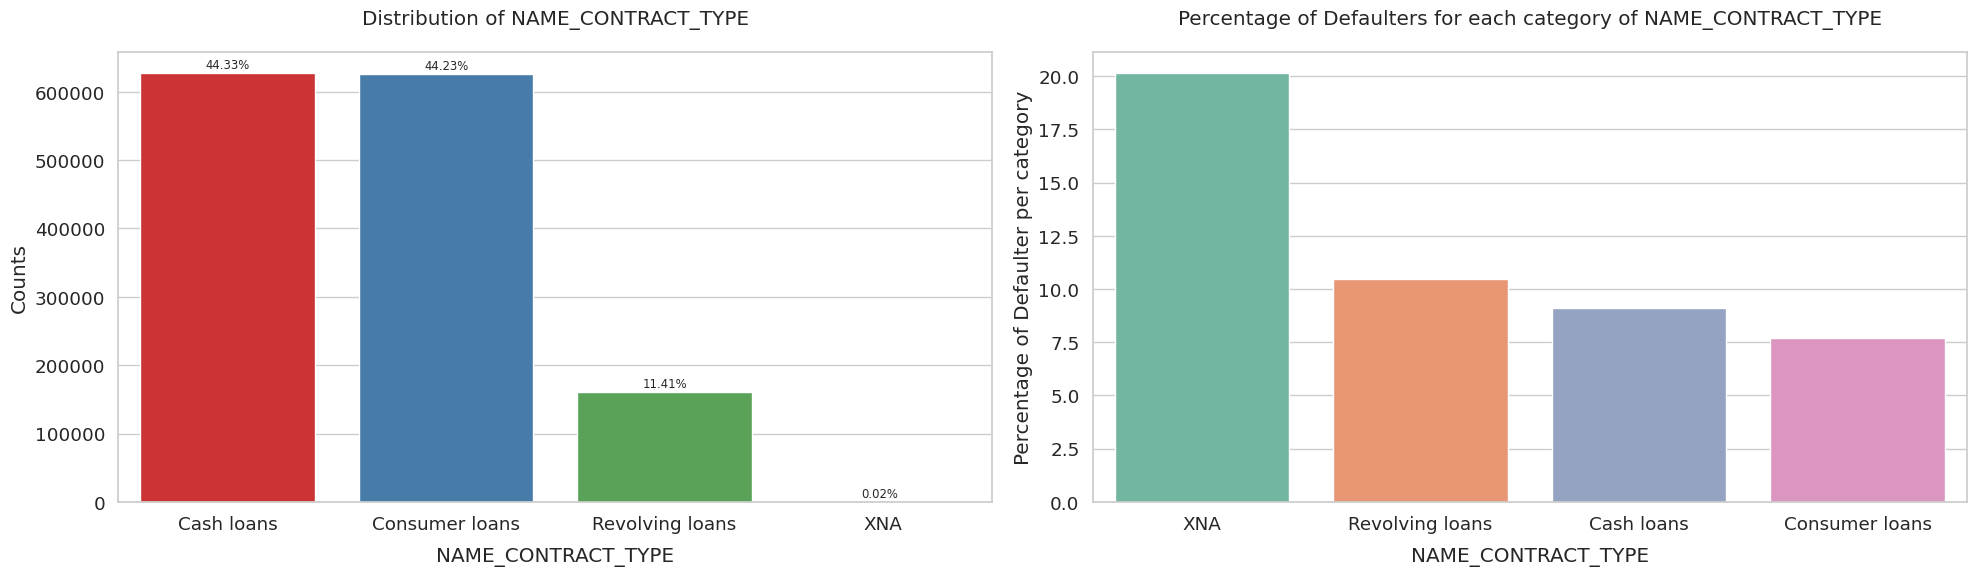

In [73]:
#let us first see the unique categories of 'NAME_CONTRACT_TYPE'
EDA_kernel_kaggle.print_unique_categories(prev_merged, 'NAME_CONTRACT_TYPE',
                                          show_counts = True)

# plotting the Bar Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_bar(prev_merged,
                                                 'NAME_CONTRACT_TYPE',
                                                 horizontal_adjust = 0.3,
                                                 figsize = (20, 6))

**Observations and Conclusions:**

From the above plots, we can observe the following:
<ol><li>From the first subplot, we see that most of the previous loans have been either Cash Loans or Consumer Loans, which correspond to roughly 44% of loans each. The remaining 11.41% corresponds to Revolving Loans, and there are some loans named XNA whose types are actually not known, but they are very few in numbers.</li>
    <li>Looking at the second subplot, we see that the Percentage of Defaulters for XNA type of loan are the highest, at 20% Default rate. The next highest Default Rate is among Revolving Loans, which is close to 10.5%.</li>
    <li>The Cash Loans have lesser default rates, roughly 9% while the consumer loans tend to have the lowest Percentage of Defaulters, which is close to 7.5%.</li></ol>

<b><u>Distribution of Categorical Variable NAME_CONTRACT_STATUS</u></b>

This column describes the status of the contract of the previous loan with Home Credit, i.e. whether it is active or closed, etc.

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_CONTRACT_STATUS' are:
['Approved' 'Canceled' 'Refused' nan 'Unused offer']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_CONTRACT_STATUS = 5


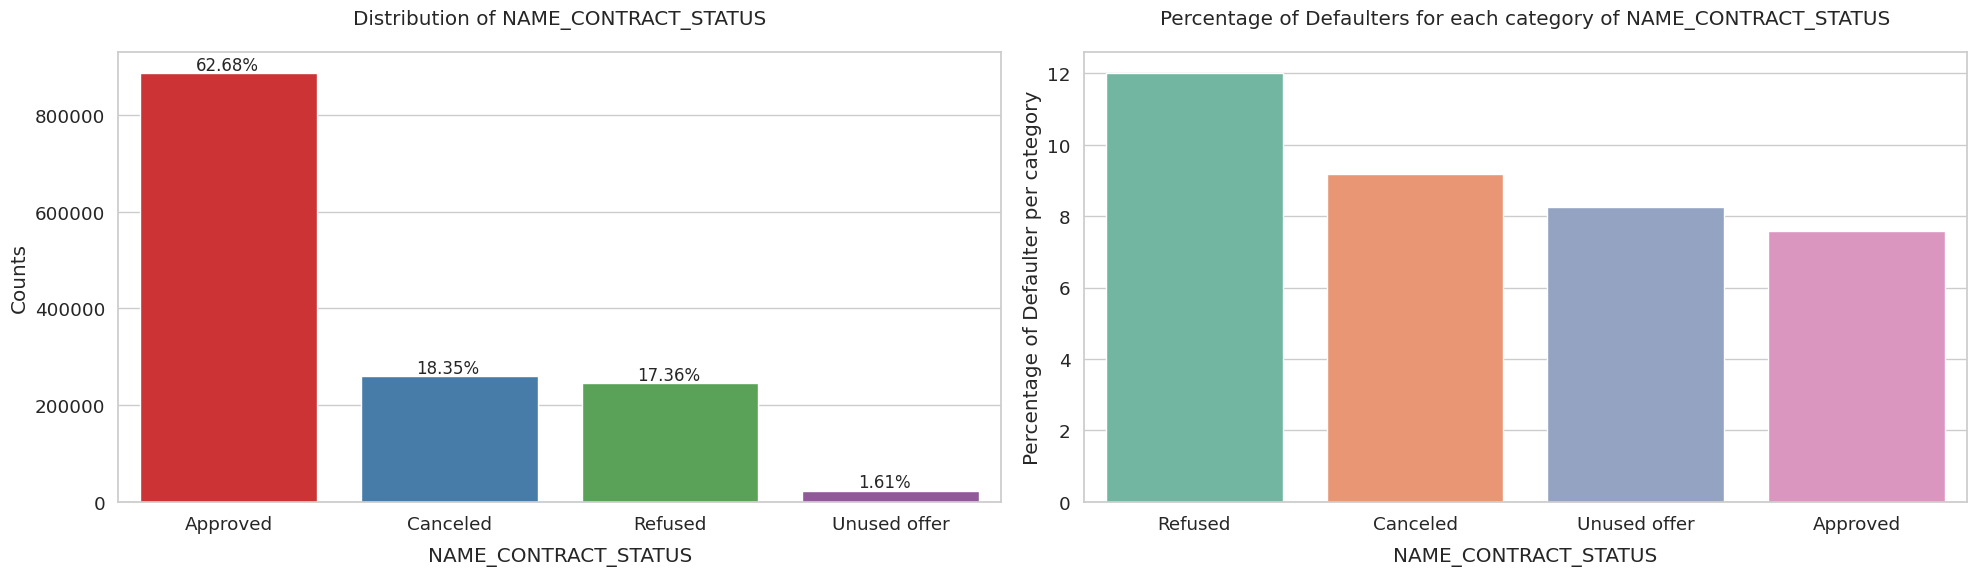

In [74]:
#let us first see the unique categories of 'NAME_CONTRACT_STATUS'
EDA_kernel_kaggle.print_unique_categories(prev_merged, 'NAME_CONTRACT_STATUS')

# plotting the Bar Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_bar(prev_merged,
                                                 'NAME_CONTRACT_STATUS',
                                                 horizontal_adjust = 0.25,
                                                 figsize = (20, 6),
                                                 fontsize_percent = 'small')

**Observations and Conclusions:**

From the above plots, we see that:
<ol><li>The most common type of Contract Status is the Approved Status. About 63% of the previous Credits have an Approved Status. The next two common status are Canceled and Refused, which both correspond to about 18% of the loans. This implies that most of the loans get approved and only some fraction of them do not. The least occurring type of contract status is Unused Offer which corresponds to just 1.61% of all the loans.</li>
    <li>Looking at the second subplot for percentage of defaulters, we see that the those loans which previously had Refused Status tend to have defaulted the highest in the current loans. They correspond to about 12% of Defaulters from that category. These are followed by Canceled Status which correspond to close to 9% of Default Rate. This behavious is quite expected logically, as these people must have been refused due to not having adequate profile. The least default rate is observed for Contract Status of Approved.</li></ol>

<b><u>Distribution of Categorical Variable CODE_REJECT_REASON</u></b>

This column describes the reason of the rejection of previously applied loan in Home Credit Group.

----------------------------------------------------------------------------------------------------
The unique categories of 'CODE_REJECT_REASON' are:
['XAP' 'LIMIT' nan 'HC' 'SCO' 'SCOFR' 'VERIF' 'CLIENT' 'XNA' 'SYSTEM']
----------------------------------------------------------------------------------------------------
Counts of each category are:
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CODE_REJECT_REASON = 10


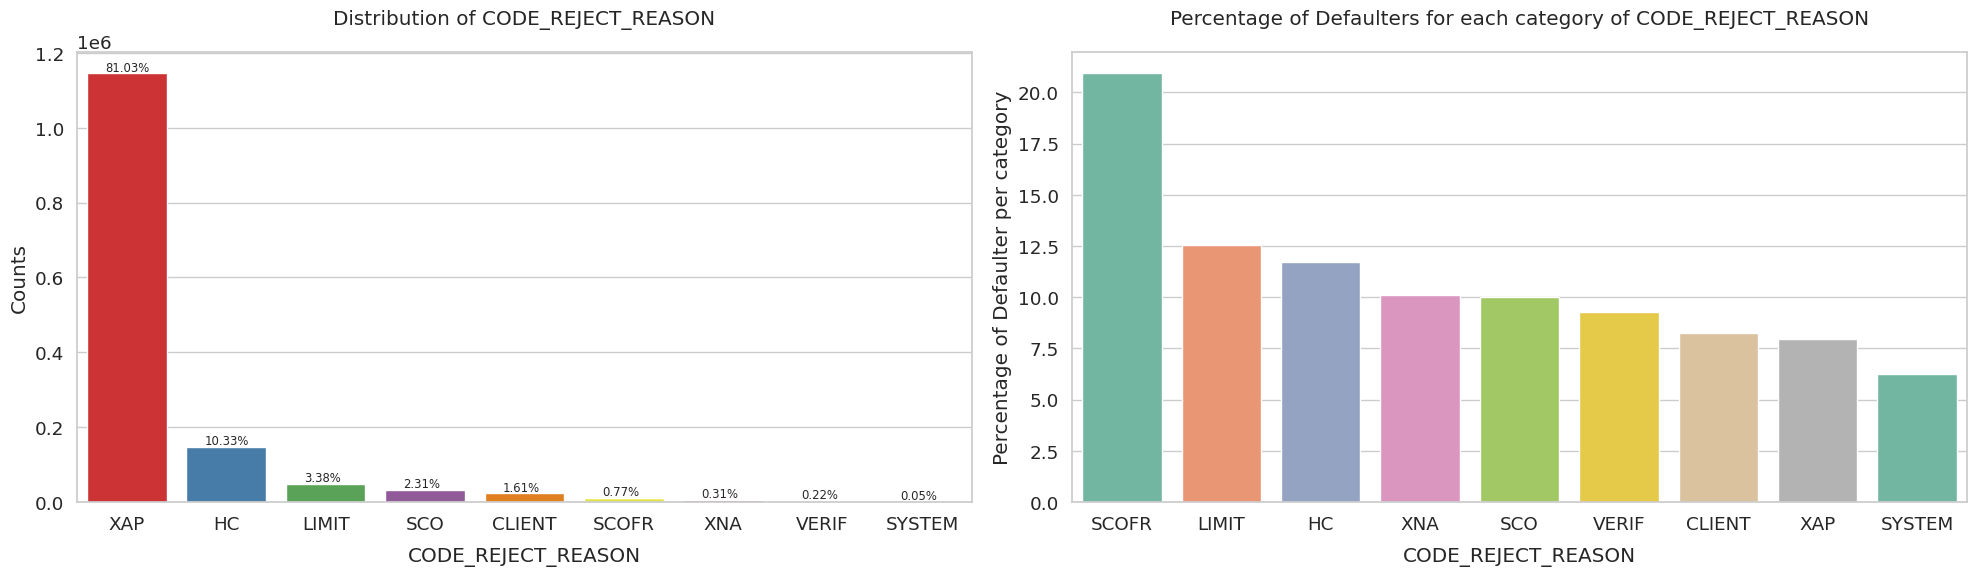

In [75]:
#let us first see the unique categories of 'CODE_REJECT_REASON'
EDA_kernel_kaggle.print_unique_categories(prev_merged, 'CODE_REJECT_REASON',
                                          show_counts = True)

# plotting the Bar Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_bar(prev_merged,
                                                 'CODE_REJECT_REASON',
                                                 horizontal_adjust = 0.18,
                                                 figsize = (20, 6))

**Observations and Conclusions:**

The above plot shows the distribution of the Categorical variable CODE_REJECT_REASON. Following insights can be generated from the above plot:
<ol><li>The most common type of reason of rejection is XAP, which is about ~81%. The other reasons form only a small part of the rejection reasons. HC is the second highest rejection reason with just 10.33% of occurrences.</li>
    <li>The distribution of percentage of defaulters for each category of CODE_REJECT_REASON in quite interesting. Those applicants who had their previous applications rejected by Code SCOFT have the highest percentage of Defaulters among them (~21%). This is followed by LIMIT and HC which have around 12.5% and 12% of Defaulters.</li>
    <li>The most common occurring rejection reason XAP corresponds to only 7.5% of Defaulters of all, and is the second lowest percentage of Defaulters after SYSTEM code.</li></ol>

<b><u>Distribution of Categorical Variable CHANNEL_TYPE</u></b>

This column describes the channel through which the client was acquired for the previous loan in Home Credit.

----------------------------------------------------------------------------------------------------
The unique categories of 'CHANNEL_TYPE' are:
['Stone' 'Credit and cash offices' 'Country-wide' 'Regional / Local'
 'AP+ (Cash loan)' 'Contact center' nan 'Channel of corporate sales'
 'Car dealer']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CHANNEL_TYPE = 9


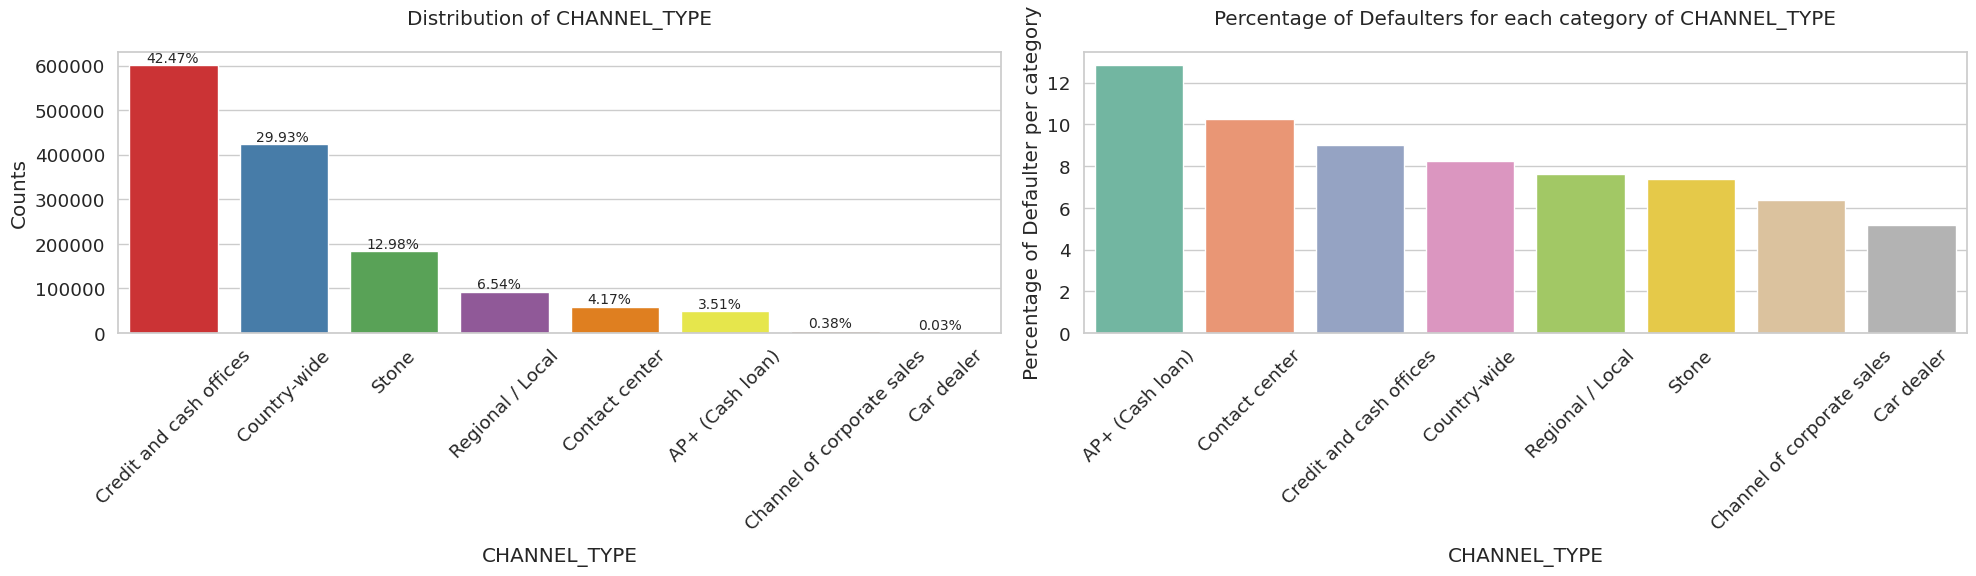

In [79]:
#let us first see the unique categories of 'CHANNEL_TYPE'
EDA_kernel_kaggle.print_unique_categories(prev_merged, 'CHANNEL_TYPE')

# plotting the Bar Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_bar(prev_merged, 'CHANNEL_TYPE',
                                                 horizontal_adjust = 0.15,
                                                 rotation = 45,
                                                 figsize = (20, 6),
                                                 fontsize_percent = 'x-small')

**Observations and Conclusions**

The above two plots show the distribution of CHANNEL_TYPE for previous loans in Home Credit.
<ol><li>From the first subplot we see that most of the applications were acquired through the Credit and cash offices which were roughly 42.47% applications, which were followed by Country-wide channel corresponding to 29.93% applications. Rest of the channel types corresponded to only a select number of applications.</li>
    <li>The highest Defaulting Percentage was seen among applications who had a channel type of AP+ (Cash loan) which corresponded to about 13% defaulters in that category. The rest of the channels had lower default percentages than this one. The channel Car Dealer showed a lowest Percentage of Defaulters in that category (only 5%).

<b><u>Distribution of Categorical Variable PRODUCT_COMBINATION</u></b>

This column gives details about the product combination of the previous applications.

----------------------------------------------------------------------------------------------------
The unique categories of 'PRODUCT_COMBINATION' are:
['POS other with interest' 'Cash X-Sell: low' 'POS industry with interest'
 'POS household with interest' 'POS mobile without interest' 'Card Street'
 'Card X-Sell' 'Cash X-Sell: high' 'Cash' 'Cash Street: high'
 'Cash X-Sell: middle' 'POS mobile with interest'
 'POS household without interest' 'POS industry without interest'
 'Cash Street: low' nan 'Cash Street: middle'
 'POS others without interest']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of PRODUCT_COMBINATION = 18


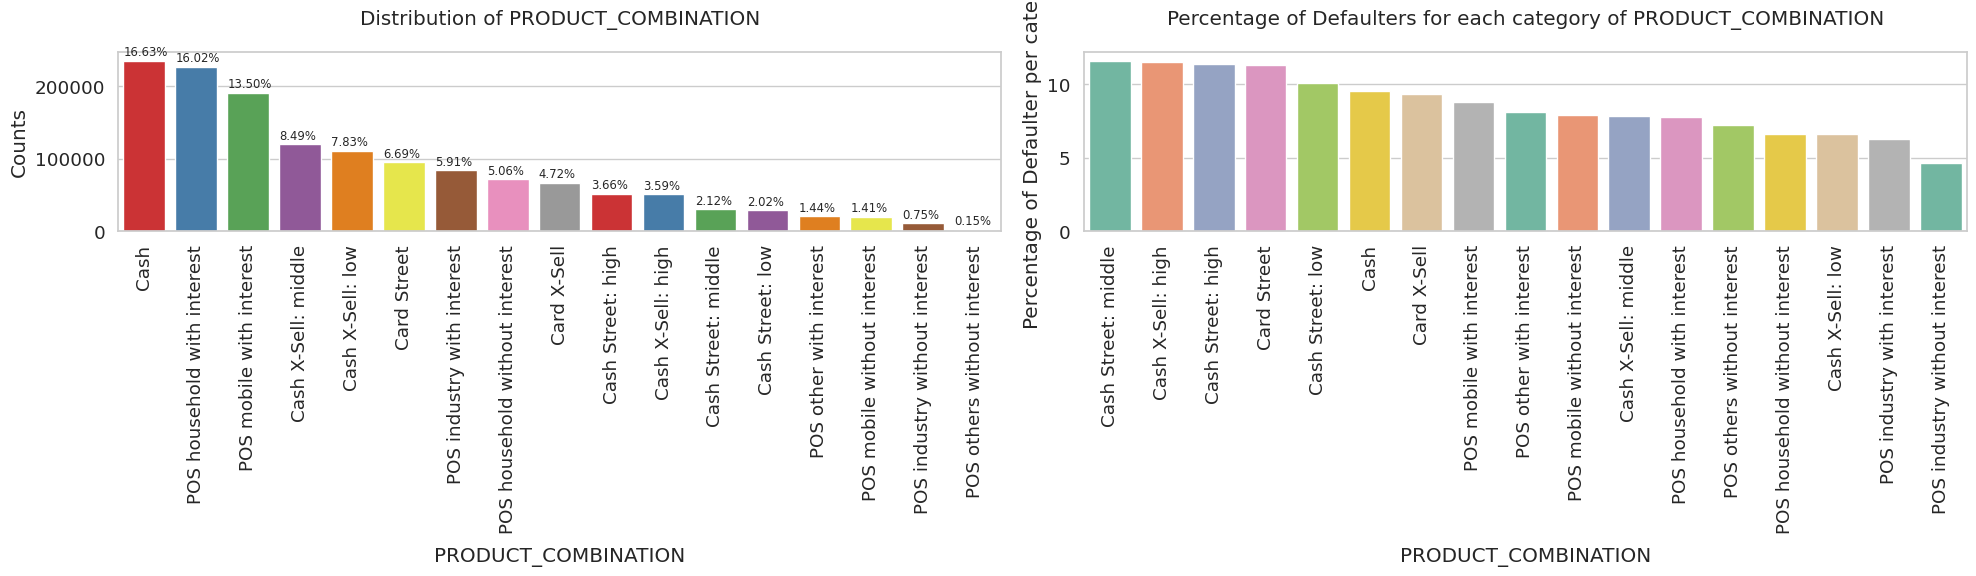

In [80]:
#let us first see the unique categories of 'PRODUCT_COMBINATION'
EDA_kernel_kaggle.print_unique_categories(prev_merged, 'PRODUCT_COMBINATION')

# plotting the Bar Plot for the Column
EDA_kernel_kaggle.plot_categorical_variables_bar(prev_merged,
                                                 'PRODUCT_COMBINATION',
                                                 rotation = 90,
                                                 figsize = (20, 6))

<b><u>Distribution of Categorical Variable PRODUCT_COMBINATION</u></b>

This column gives details about the product combination of the previous applications.

In [81]:
#let us first see the unique categories of 'PRODUCT_COMBINATION'
print_unique_categories(prev_merged, 'PRODUCT_COMBINATION')

# plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged, 'PRODUCT_COMBINATION', rotation = 90, figsize = (20, 6))
print('-'*100)

NameError: name 'print_unique_categories' is not defined

**Observations and Conclusions**

From the distribution of PRODUCT_COMBINATION, we can generate following insights:
<ol><li>The 3 most common types of Product Combination are Cash, POS household with interest and POS mobile with interest. They correspond to roughly 50% of all the applications. </li>
    <li>Looking at the Percentage of Defaulters per category plot, we see a highest defaulting tendency among Cash Street: mobile category, Cash X-sell: high, Cash Street: high and Card Street which all are near about 11-11.5% defaulters per category. The lowest Percentage of Defaulters are in the POS Industry without interest Category, which correspond to about 4.5% Defaulters.

<a id='previous_application_plot_conti_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting continous variables</span></span>

<u><b>Distribution of Continuous Variable with DAYS Features</b></u>

<b>DAYS_DECISION</b>

This column tells about the number of days relative to the current application when the decision was made about previous application.

/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:263: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:265: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

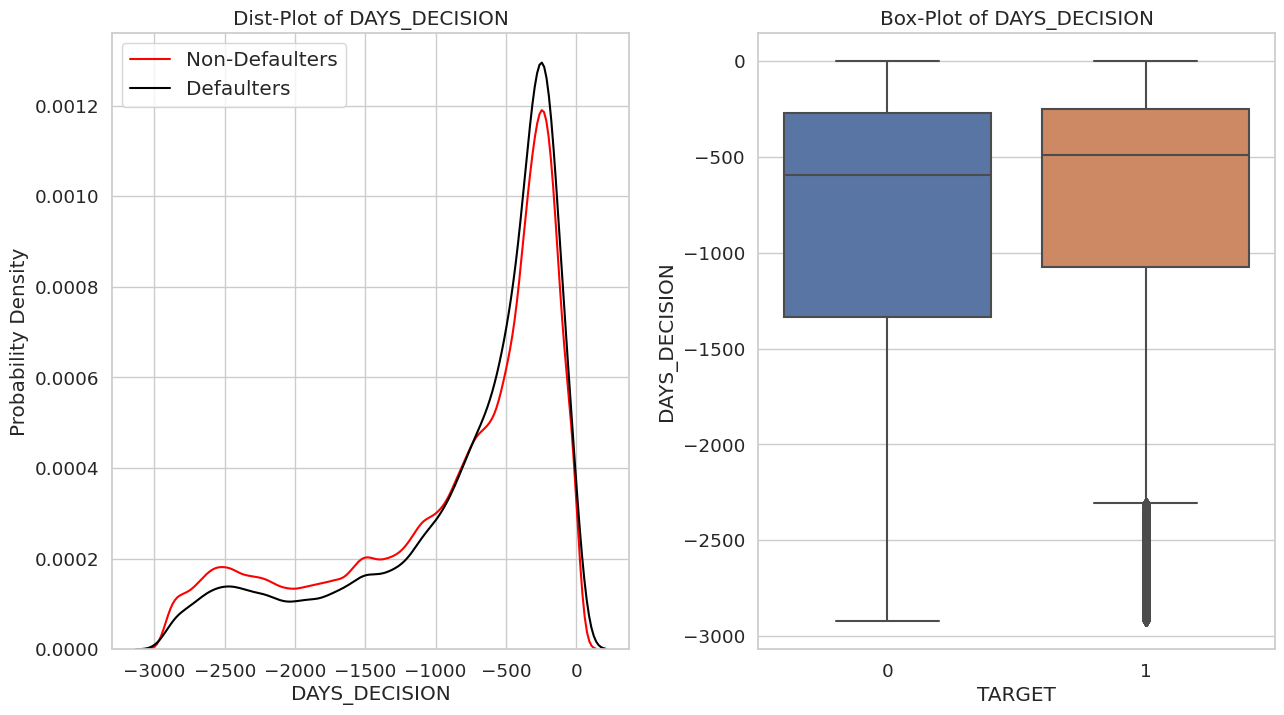

In [82]:
EDA_kernel_kaggle.plot_continuous_variables(prev_merged, 'DAYS_DECISION',
                                            plots = ['distplot', 'box'],
                                            figsize = (15,8))

**Observations and Conclusions**

From the above plot, we notice that for Defaulters, the number of days back when the decision was made is a bit lesser than that for Non-Defaulters. This implies that the Defaulters usually had the decision on their previous applications made more recently as compared to Non-Defaulters.

<b>DAYS_FIRST_DRAWING</b>

This column tells about the number of days back from current application that the first disbursement of the previous application was made.

----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_FIRST_DRAWING is -2922.0
The 1th percentile value of DAYS_FIRST_DRAWING is -2451.0
The 2th percentile value of DAYS_FIRST_DRAWING is -1179.0
The 3th percentile value of DAYS_FIRST_DRAWING is -674.0
The 4th percentile value of DAYS_FIRST_DRAWING is -406.0
The 5th percentile value of DAYS_FIRST_DRAWING is -262.0
The 6th percentile value of DAYS_FIRST_DRAWING is -156.0
The 7th percentile value of DAYS_FIRST_DRAWING is 365243.0
The 8th percentile value of DAYS_FIRST_DRAWING is 365243.0
The 9th percentile value of DAYS_FIRST_DRAWING is 365243.0
The 10th percentile value of DAYS_FIRST_DRAWING is 365243.0
The 20th percentile value of DAYS_FIRST_DRAWING is 365243.0
The 40th percentile value of DAYS_FIRST_DRAWING is 365243.0
The 60th percentile value of DAYS_FIRST_DRAWING is 365243.0
The 80th percentile value of DAYS_FIRST_DRAWING is 365243.0
The 100th percentile

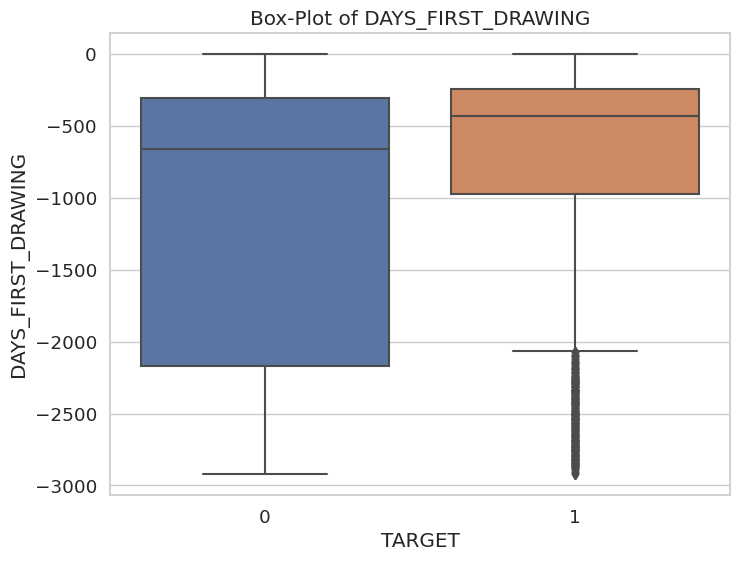

In [83]:
EDA_kernel_kaggle.print_percentiles(prev_merged, 'DAYS_FIRST_DRAWING',
                                    percentiles = list(range(0,11))\
                                    + list(range(20,101,20)))
EDA_kernel_kaggle.plot_continuous_variables(prev_merged, 'DAYS_FIRST_DRAWING',
                                            plots = ['box'], figsize = (8,6),
                                            scale_limits = [-3000,0])

**Observations and Conclusions:**

<ol><li>Looking at the percentile values of DAYS_FIRST_DRAWING, it seems like most of the values are erroneous, starting from 7th percentile values itself. These erroneous values will needed to be dopped.<li>
    <li>If we try to analyze the distribution of this column by removing the erroneous ponts, we see that most of the Defaulters had their First Drawing on previous credit more recently as compared to Non-Defaulters. The 75th percentile value for Defaulters is also significantly lesser than that of Non-Defaulters.

<b>DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, and DAYS_TERMINATION</b>

These columns also decribe about the number of days ago from the current application that certain activities happened. 

In [84]:
print('-'*100)
print("Percentile Values for DAYS_FIRST_DUE")
EDA_kernel_kaggle.print_percentiles(prev_merged, 'DAYS_FIRST_DUE',
                                    percentiles = list(range(0,11,2))
                                    + [20,40,60,80,100])

print("Percentile Values for DAYS_LAST_DUE_1ST_VERSION")
EDA_kernel_kaggle.print_percentiles(prev_merged, 'DAYS_LAST_DUE_1ST_VERSION',
                                    percentiles = list(range(0,11,2))
                                    + [20,40,60,80,100])

print("Percentile Values for DAYS_LAST_DUE")
EDA_kernel_kaggle.print_percentiles(prev_merged, 'DAYS_LAST_DUE',
                                    percentiles = list(range(0,11,2))
                                    + [20,40,60,80,100])

print("Percentile Values for DAYS_TERMINATION")
EDA_kernel_kaggle.print_percentiles(prev_merged, 'DAYS_TERMINATION',
                                    percentiles = list(range(0,11,2))
                                    + [20,40,60,80,100])

----------------------------------------------------------------------------------------------------
Percentile Values for DAYS_FIRST_DUE
----------------------------------------------------------------------------------------------------
The 0th percentile value of DAYS_FIRST_DUE is -2892.0
The 2th percentile value of DAYS_FIRST_DUE is -2759.0
The 4th percentile value of DAYS_FIRST_DUE is -2648.0
The 6th percentile value of DAYS_FIRST_DUE is -2555.0
The 8th percentile value of DAYS_FIRST_DUE is -2471.0
The 10th percentile value of DAYS_FIRST_DUE is -2388.0
The 20th percentile value of DAYS_FIRST_DUE is -1882.0
The 40th percentile value of DAYS_FIRST_DUE is -1070.0
The 60th percentile value of DAYS_FIRST_DUE is -647.0
The 80th percentile value of DAYS_FIRST_DUE is -329.0
The 100th percentile value of DAYS_FIRST_DUE is 365243.0
----------------------------------------------------------------------------------------------------
Percentile Values for DAYS_LAST_DUE_1ST_VERSION
------------

**Observations and Conclusions**

From all of the above percentile values, we realise that all the Days columns have these erroneous values somewhere or the other. Thus these values need to be replaced so that our model doesn't get affected by these.

<a id='previous_application_phik_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Phi-K matrix</span></span>

-------------------------------------------------------------------------------


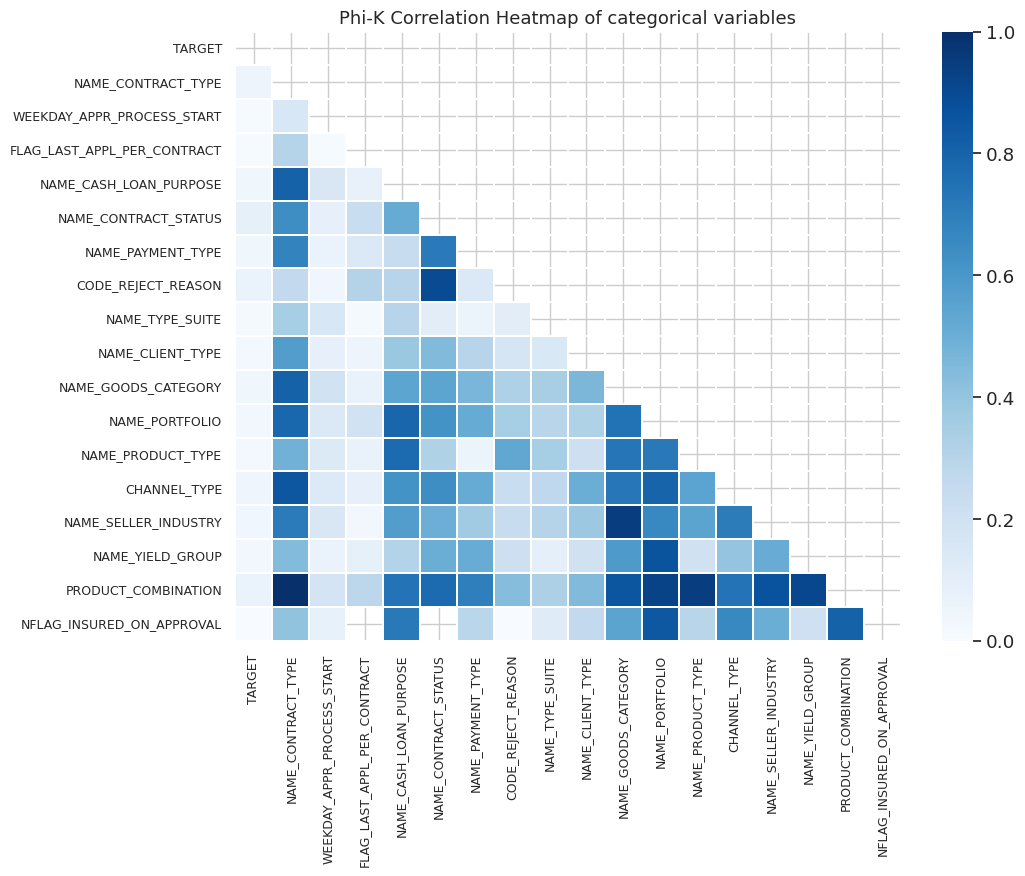

-------------------------------------------------------------------------------
The categories with the highest values of Phi-K correlation with the target variable are as follows :


/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:391: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



-------------------------------------------------------------------------------


In [108]:
cols_for_phik = ['TARGET'] + prev_merged.dtypes[prev_merged.dtypes ==
                                                'object'].index.tolist()\
                + ['NFLAG_INSURED_ON_APPROVAL']
EDA_kernel_kaggle.plot_phik_matrix(prev_merged, cols_for_phik, cmap = 'Blues',
                                   figsize = (11,9), fontsize = 9)

**Observations and Conclusions:**

From the above heatmap of values of Phi-K Coefficient for Categorical Features, we observe that:

<ol><li>The feature PRODUCT_COMBINATION shows association with lots of other features such as NAME_CONTRACT_TYPE, NAME_PRODUCT_TYPE, NAME_PORTFOLIO, etc.</li>
    <li>The feature NAME_GOODS_CATEGORY is also highly associated with NAME_SELLER_INDUSTRY</li>
    <li>If we look at the association with TARGET variable, we see that the features NAME_CONTRACT_STATUS, PRODUCT_COMBINATION, CODE_REJECT_REASON are some of the highest associated features, and would need further investigation</li></ol>
   

<a id='previous_application_correlation_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Correlation matrix</span></span>

/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:467: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



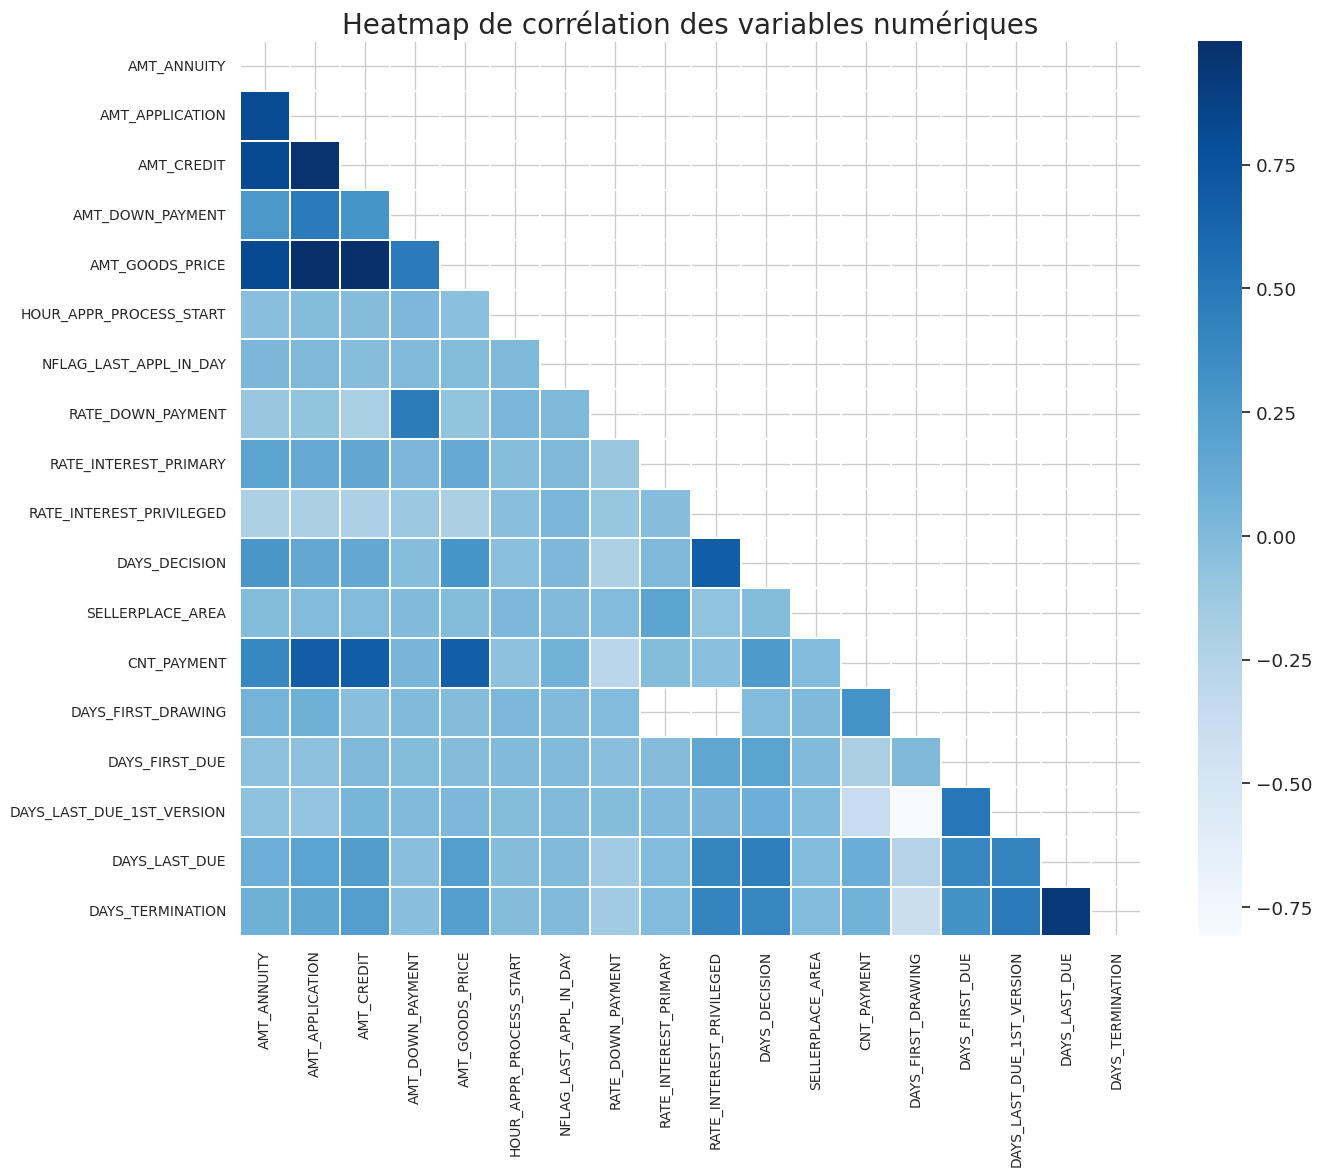

In [109]:
corr_mat = EDA_kernel_kaggle.correlation_matrix(prev_merged,
                     ['SK_ID_CURR','SK_ID_PREV','NFLAG_INSURED_ON_APPROVAL'],
                                                cmap = 'Blues',
                                                figsize = (14,12))
corr_mat.plot_correlation_matrix()

In [110]:
#Seeing the top columns with highest phik-correlation with the target variable in previous_applications table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)

interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_APPLICATION']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_DOWN_PAYMENT']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'NFLAG_LAST_APPL_IN_DAY']
interval columns not set, guessing: ['TARGET', 'RATE_DOWN_PAYMENT']
interval columns not set, guessing: ['TARGET', 'RATE_INTEREST_PRIMARY']
interval columns not set, guessing: ['TARGET', 'RATE_INTEREST_PRIVILEGED']
interval columns not set, guessing: ['TARGET', 'DAYS_DECISION']
interval columns not set, guessing: ['TARGET', 'SELLERPLACE_AREA']
interval columns not set, guessing: ['TARGET', 'CNT_PAYMENT']
interval columns not set, guessing: ['TARGET', 'DAYS_FIRST_DRAWING']
interval columns not set, guessing: ['TARGET', 'DAYS_F

Column Name  Phik-Correlation
12                CNT_PAYMENT          0.056639
10              DAYS_DECISION          0.053694
13         DAYS_FIRST_DRAWING          0.048993
7           RATE_DOWN_PAYMENT          0.039592
5     HOUR_APPR_PROCESS_START          0.038121
9    RATE_INTEREST_PRIVILEGED          0.028204
15  DAYS_LAST_DUE_1ST_VERSION          0.027878
16              DAYS_LAST_DUE          0.027320
17           DAYS_TERMINATION          0.026479
0                 AMT_ANNUITY          0.013808

**Observations and Conclusions:**

<ol>
    <li>The heatmap above shows the correlation between each feature in previous_application table with the rest of the features.</li>
    <li>From the heatmap, we can see some highly correlated features which have a darker colour.</li>
    <li>The high correlation is particularly observed for features:
        <ol><li>DAYS_TERMINATION and DAYS_LAST_DUE</li>
            <li>AMT_CREDIT and AMT_APPLICATION</li>
            <li>AMT_APPLICATION and AMT_GOODS_PRICE</li>
            <li>AMT_CREDIT and AMT_ANNUITY</li>
            <li>AMT_ANNUITY and AMT_CREDIT</li>
            <li>AMT_CREDIT and AMT_GOODS_PRICE</li></ol></li>
    <li>We can also see that the features don't particularly show good/high correlation with Target as such. This implies that there isn't much of a direct linear relation between Target and the features.</li></ol>

<a id='POS_CASH_balance_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset POS_CASH_balance</span></span>

* Monthly balance snapshots of previous **POS (point of sales)** and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

In [21]:
# -------------------------------
# File upload: POS_CASH_balance
# -------------------------------
# linked by 'SK_ID_CURR' to application_{train|test}
# and to installments_payments
# linked by 'SK_ID_PREV' to previous_application
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv',
                                       low_memory=False,
                                       encoding='utf-8')
POS_CASH_balance.name = 'POS_CASH_balance'

# --------------
# Dataset size
# --------------
print("The dataset 'POS_CASH_balance.csv' contains " +
      str(POS_CASH_balance.shape[0]) + " rows and " +
      str(POS_CASH_balance.shape[1]) + " columns.\n")

# ---------------
# Data overview
# ---------------
POS_CASH_balance.head(3)

The dataset 'POS_CASH_balance.csv' contains 10001358 rows and 8 columns.



SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0

In [22]:
# Columns name description
HomeCredit_columns.loc[HomeCredit_columns["Table"] ==
                       "POS_CASH_balance.csv"].style.hide(axis=0)

In [23]:
# --------------------
# Column description
# --------------------
info_POS_CASH = tools_dataframe.complet_description(POS_CASH_balance)
info_POS_CASH

Variable     Type   null Duplicated Filling percentage  \
0  CNT_INSTALMENT_FUTURE  float64  26087    9975192          99.739165   
1         CNT_INSTALMENT  float64  26071    9975214          99.739325   
2             SK_ID_PREV    int64      0    9065033              100.0   
3             SK_ID_CURR    int64      0    9664106              100.0   
4         MONTHS_BALANCE    int64      0   10001262              100.0   
5   NAME_CONTRACT_STATUS   object      0   10001349              100.0   
6                 SK_DPD    int64      0    9997958              100.0   
7             SK_DPD_DEF    int64      0    9999051              100.0   

        count unique     top     freq            mean            std  \
0   9975271.0    NaN     NaN      NaN        10.48384      11.109058   
1   9975287.0    NaN     NaN      NaN        17.08965      11.995056   
2  10001358.0    NaN     NaN      NaN  1903216.598957  535846.530722   
3  10001358.0    NaN     NaN      NaN   278403.863306   102763.74509   
4  10001358.0    NaN     NaN      NaN      -35.012588       26.06657   
5    10001358      9  Active  9151119             NaN            NaN   
6  10001358.0    NaN     NaN      NaN       11.606928     132.714043   
7  10001358.0    NaN     NaN      NaN        0.654468      32.762491   

         min        25%        50%        75%        max  
0        0.0        3.0        7.0       14.0       85.0  
1        1.0       10.0       12.0       24.0       92.0  
2  1000001.0  1434405.0  1896565.0  2368963.0  2843499.0  
3   100001.0   189550.0   278654.0   367429.0   456255.0  
4      -96.0      -54.0      -28.0      -13.0       -1.0  
5        NaN        NaN        NaN        NaN        NaN  
6        0.0        0.0        0.0        0.0     4231.0  
7        0.0        0.0        0.0        0.0     3595.0

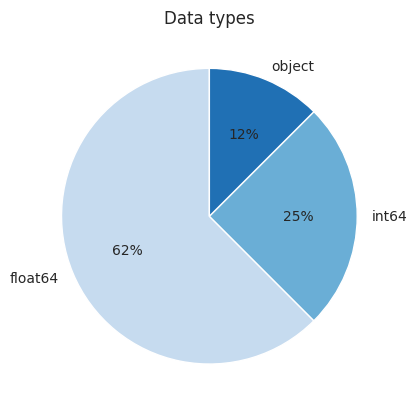

In [24]:
# Visualization data types
tools_dataframe.visu_dataTypes(info_POS_CASH)

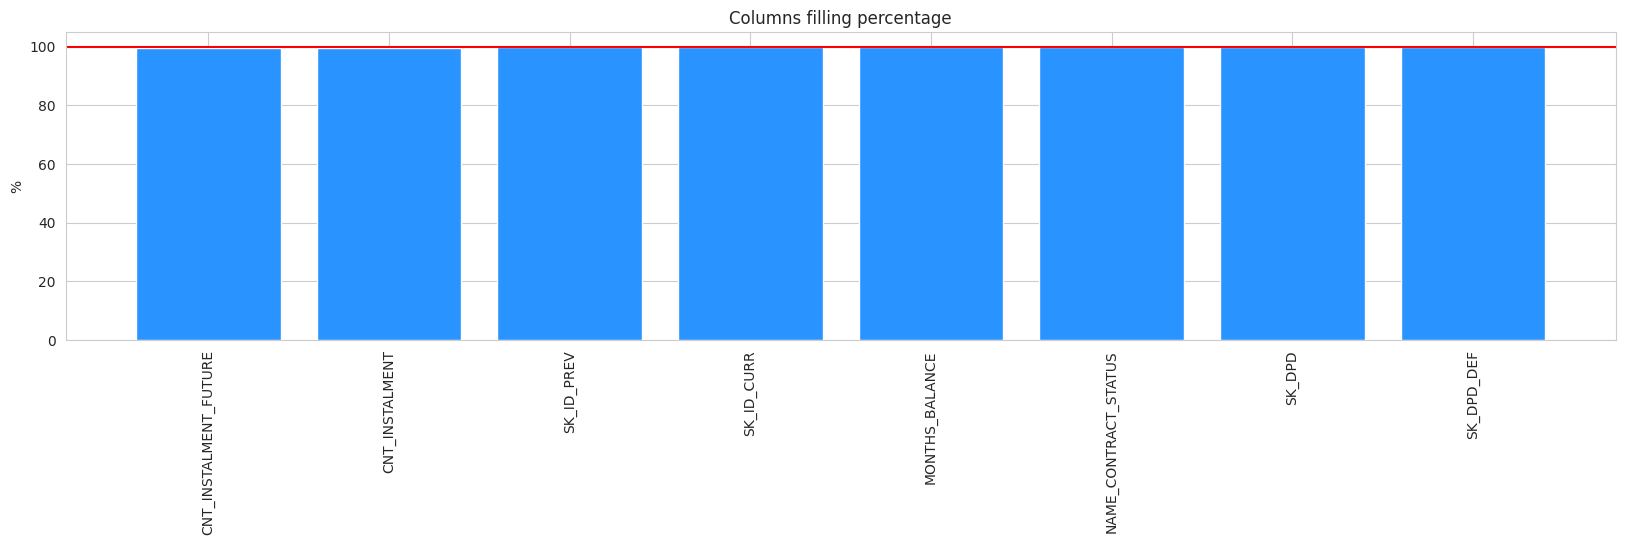

In [25]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_POS_CASH)

**Observations and Conclusions**

<ol><li>This table contains around 10M datapoints, where each row corresponds to the monthly snapshot of the status of the previous POS and Cash Loan that the client had with Home Credit Group. It consists of 8 columns, two of which are SK_ID_CURR and SK_ID_PREV.</li>
    <li>There are 936k unique previous loan IDs in the table, which correspond to 337k unique current applicants (SK_ID_CURR).</li>
    <li>Out of these 337k SK_ID_CURR, 289k belong to training set and 47.8k belong to test set.</li></ol>

<ol><li>There are only 2 columns which contain NaN values of the 8 columns from POS_CASH_balance. These columns are the Counts of Installments remaining and the term of the loan.</li>
    <li>These columns also contain very minimal proportion of NaN values, i.e only 0.26%%, so it is also not of much concern.</li></ol>

<b>Merging the TARGETS from application_train to POS_CASH_balance table.</b>

In [26]:
print("Merging TARGET with POS_CASH_balance Table")
pos_cash_merged = application_train.iloc[:,:2].merge(POS_CASH_balance, on = 'SK_ID_CURR', how = 'left')

Merging TARGET with POS_CASH_balance Table


<a id='POS_CASH_balance_plot_conti_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting continous variables</span></span>

Firstly we will group by the 'SK_ID_PREV' field and aggregate with mean, so that we get an averaged row for each of the previous loan that the client had.

In [29]:
pos_cash_merged = pos_cash_merged.groupby('SK_ID_PREV').mean()

/tmp/ipykernel_31368/4110638902.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<b><u>Distribution of Continuous Vairable CNT_INSTALMENT_FUTURE</u></b>

This column describes the number of installments left to pay on the previous credit.

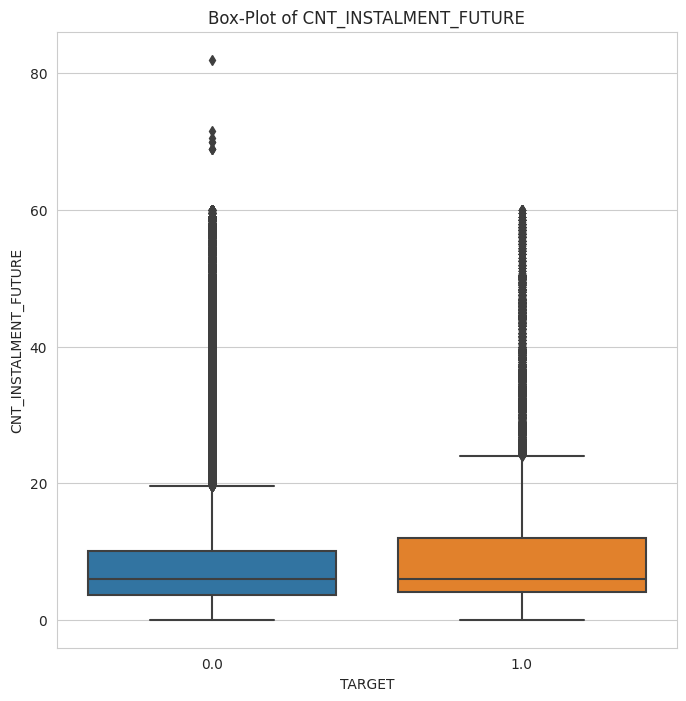

In [30]:
EDA_kernel_kaggle.plot_continuous_variables(pos_cash_merged,
                                            'CNT_INSTALMENT_FUTURE',
                                            plots = ['box'], figsize = (8,8))
del pos_cash_merged

**Observations and Conclusions**

Looking at the above box-plot for CNT_INSTALMENT_FUTURE, we see that the percentile values>50% for Defaulters are usually higher than those of Non-Defaulters. Even the upper limit whisker for Defaulters is higher than that of Non-Defaulters. This suggests that the Defaulters tend to have more number of Installments remaining on their previous credits as compared to Non-Defaulters.

<a id='POS_CASH_balance_correlation_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Correlation matrix</span></span>

/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:467: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



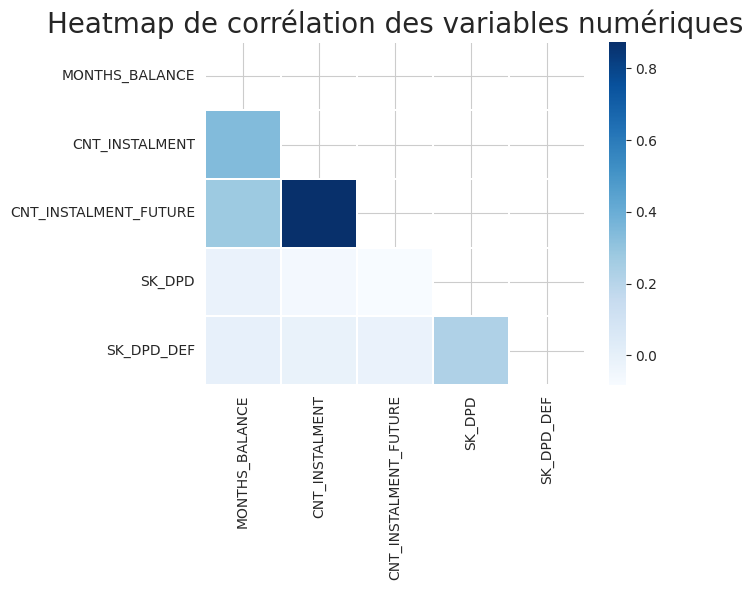

In [27]:
corr_mat = EDA_kernel_kaggle.correlation_matrix(pos_cash_merged,
                                                ['SK_ID_CURR','SK_ID_PREV'],
                                                figsize = (7,6))
corr_mat.plot_correlation_matrix()

In [28]:
#Seeing the top columns with highest phik-correlation with the target variable in POS_CASH_balance table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)

interval columns not set, guessing: ['TARGET', 'MONTHS_BALANCE']
interval columns not set, guessing: ['TARGET', 'CNT_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'CNT_INSTALMENT_FUTURE']
interval columns not set, guessing: ['TARGET', 'SK_DPD']
interval columns not set, guessing: ['TARGET', 'SK_DPD_DEF']
----------------------------------------------------------------------------------------------------
Columns with highest values of Phik-correlation with Target Variable are:


Column Name  Phik-Correlation
2  CNT_INSTALMENT_FUTURE          0.033194
1         CNT_INSTALMENT          0.030947
0         MONTHS_BALANCE          0.027391
3                 SK_DPD          0.012773
4             SK_DPD_DEF          0.010539

**Observations and Conclusions:**

<ol>
    <li>The above heatmap shows the correlation between the fetures</li>
    <li>From the heatmap of correlation matrix, we one set of moderately correlated features, which are: CNT_INSTALMENT and CNT_INSTALMENT_FUTURE.</li>
    <li>The correlation of features with Target is very low, this shows the absence of a linear relationship between the feature and the target variable.</li></ol>

<a id='installments_payments_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset installments_payments</span></span>

* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
* There is 
    * a) one row for every payment that was made
    * b) one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [6]:
# -------------------------------
# File upload: installments_payments
# -------------------------------
# linked by 'SK_ID_PREV' to previous_application
installments_payments = pd.read_csv('installments_payments.csv',
                                   low_memory=False,
                                   encoding='utf-8')
installments_payments.name = 'installments_payments'

# --------------
# Dataset size
# --------------
print("The dataset 'installments_payments.csv' contains " +
      str(installments_payments.shape[0]) + " rows and " +
      str(installments_payments.shape[1]) + " columns.\n")

# ---------------
# Data overview
# ---------------
installments_payments.head(3)

The dataset 'installments_payments.csv' contains 13605401 rows and 8 columns.



SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000

In [7]:
# Columns name description
HomeCredit_columns.loc[HomeCredit_columns["Table"] ==
                       "installments_payments.csv"].style.hide(axis=0)

In [8]:
# --------------------
# Column description
# --------------------
info_install_paym = tools_dataframe.complet_description(installments_payments)
info_install_paym

Variable     Type  null Duplicated Filling percentage  \
0      DAYS_ENTRY_PAYMENT  float64  2905   13599457          99.978648   
1             AMT_PAYMENT  float64  2905   12658261          99.978648   
2              SK_ID_PREV    int64     0   12607649              100.0   
3              SK_ID_CURR    int64     0   13265814              100.0   
4  NUM_INSTALMENT_VERSION  float64     0   13605336              100.0   
5   NUM_INSTALMENT_NUMBER    int64     0   13605124              100.0   
6         DAYS_INSTALMENT  float64     0   13602479              100.0   
7          AMT_INSTALMENT  float64     0   12702862              100.0   

        count            mean            std        min        25%        50%  \
0  13602496.0    -1051.113684     800.585883    -4921.0    -1662.0     -827.0   
1  13602496.0     17238.22325   54735.783981        0.0   3398.265   8125.515   
2  13605401.0  1903364.969549  536202.905546  1000001.0  1434191.0  1896520.0   
3  13605401.0   278444.881738  102718.310411   100001.0   189639.0   278685.0   
4  13605401.0        0.856637       1.035216        0.0        0.0        1.0   
5  13605401.0       18.870896      26.664067        1.0        4.0        8.0   
6  13605401.0    -1042.269992     800.946284    -2922.0    -1654.0     -818.0   
7  13605401.0    17050.906989   50570.254429        0.0   4226.085    8884.08   

         75%          max  
0     -370.0         -1.0  
1  16108.425  3771487.845  
2  2369094.0    2843499.0  
3   367530.0     456255.0  
4        1.0        178.0  
5       19.0        277.0  
6     -361.0         -1.0  
7   16710.21  3771487.845

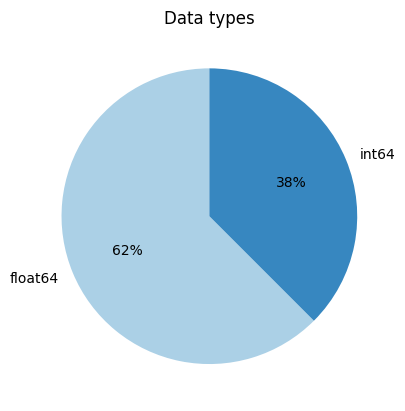

In [9]:
# Visualization data types
tools_dataframe.visu_dataTypes(info_install_paym)

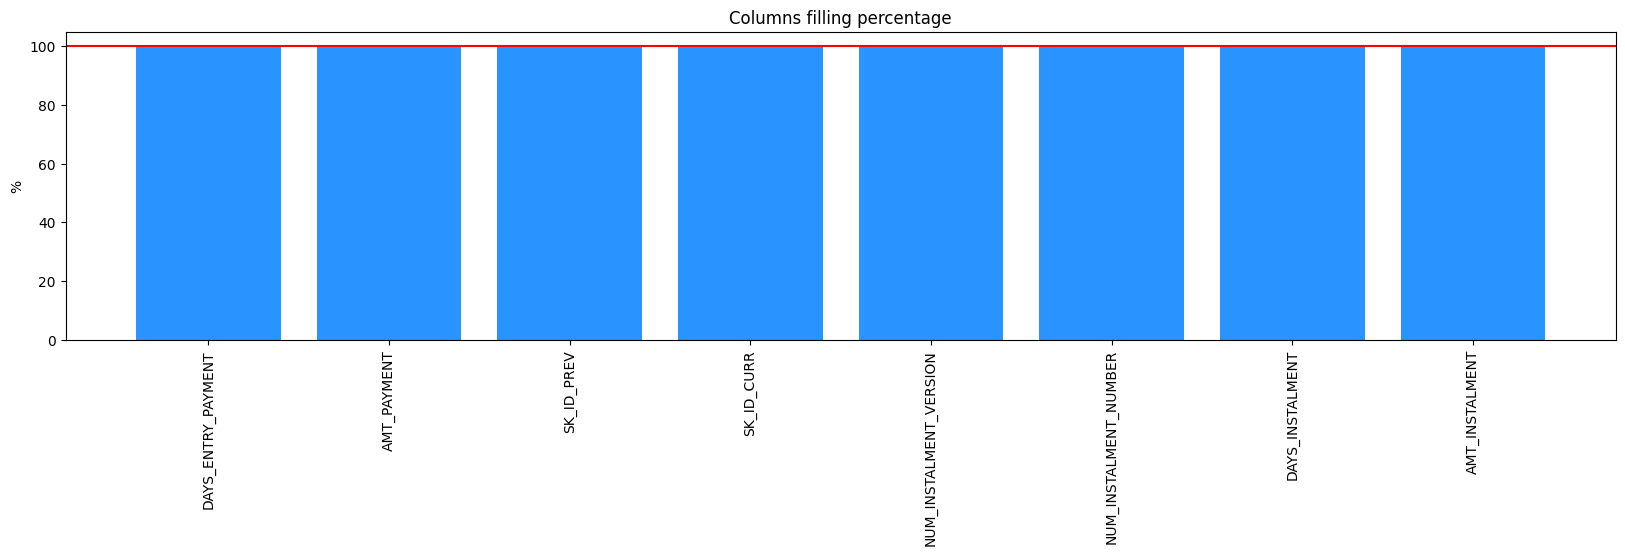

In [10]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_install_paym)

**Observations and Conclusions**

<ol><li>There are about 13.6M datapoints in the table installments_payments.csv. Each row represents each installment history related to the a particular loan that the client previously had with Home Credit Group.</li>
    <li>There are 997k unique previous loans in the installments_payments. These belong to 339k unique SK_ID_CURR, which are ID of applicants of current loan.</li>
    <li>Out of these 339k SK_ID_CURR, 291k belong to the training dataset, and 47.9k belong to the test dataset. This implies that almost out of 307k unique SK_ID_CURR in application_train, 291k previously had some form of loan with Home Credit. Similarly for 48.7k of those in test dataset, 47.9k had loan previously with Home Credit.</li>
    <li>The table has 8 unique features, 6 of which describe the statistics of each installment for previous loan. </li></ol>

<ol><li>There are only 2 columns which contain NaN values of the 8 columns from installments_payments.</li>
    <li>These columns also contain very minimal proportion of NaN values, i.e only 0.02%, so it is not of much concern.</li></ol>

<b>Merging the TARGETS from application_train to installments_payments table.</b>

In [15]:
print("Merging TARGET with installments_payments Table")
installments_merged = application_train.iloc[:,:2]\
                            .merge(installments_payments,
                                   on = 'SK_ID_CURR', how = 'left')

Merging TARGET with installments_payments Table


<b>Merging the TARGETS from application_train to installments_payments table.</b>

In [11]:
print("Merging TARGET with installments_payments Table")
installments_merged = application_train.iloc[:,:2]\
                        .merge(installments_payments, on = 'SK_ID_CURR',
                               how = 'left')

Merging TARGET with installments_payments Table


NameError: name 'application_train' is not defined

<a id='installments_payments_plot_conti_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting continous variables</span></span>

Firstly we will group by the 'SK_ID_PREV' field and aggregate with mean, so that we get an averaged row for each of the previous loan that the client had.

In [18]:
installments_merged = installments_merged.groupby('SK_ID_PREV').mean()

<b><u>Distribution of Continuous Vairable DAYS_INSTALMENT</u></b>

This column lists the days when the installment of previous credit was to be paid.

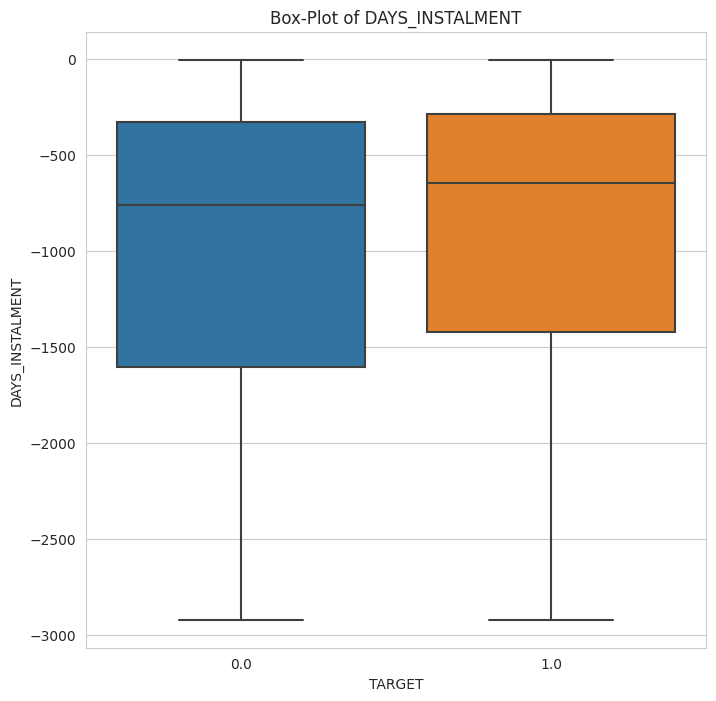

In [19]:
EDA_kernel_kaggle.plot_continuous_variables(installments_merged,
                                            'DAYS_INSTALMENT',
                                            plots = ['box'], figsize = (8,8))

<b><u>Distribution of Continuous Vairable DAYS_ENTRY_PAYMENT</u></b>

This column lists the days when the installment of previous credit was actually paid.

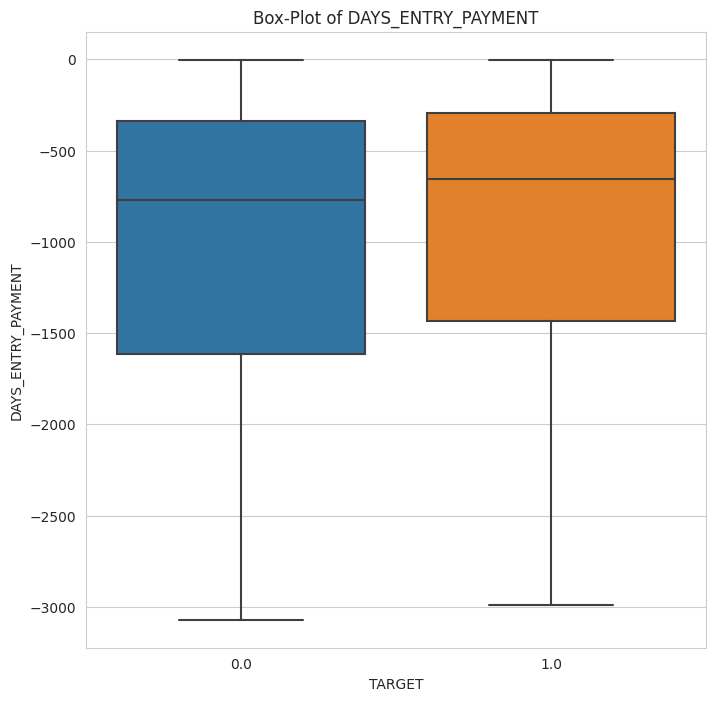

In [20]:
EDA_kernel_kaggle.plot_continuous_variables(installments_merged,
                                            'DAYS_ENTRY_PAYMENT',
                                            plots = ['box'], figsize = (8,8))
del installments_merged

**Observations and Conclusions**

From the above two plots, we can see a similar pattern, where the Defaulters tend to have lesser number of days since their last payment, while Non-Defaulters have more number of days since their last payments. All quantiles of Defaulters have more recent days than those of Non-Defaulters. Thus, Non-Defaulters usually have more gap in their payments from the day of application as compared to Defaulters.

<a id='installments_payments_correlation_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Correlation matrix</span></span>

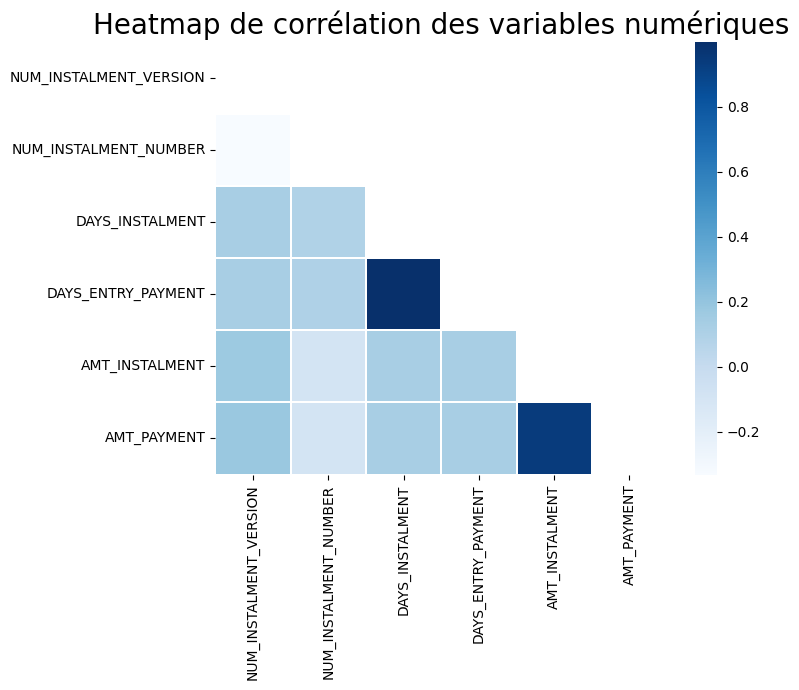

In [16]:
corr_mat = EDA_kernel_kaggle.correlation_matrix(installments_merged,
                                                ['SK_ID_CURR','SK_ID_PREV'],
                                                figsize = (8,7))
corr_mat.plot_correlation_matrix()

In [17]:
#Seeing the top columns with highest phik-correlation with the target variable in installments_payments table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)
print("-"*100)

interval columns not set, guessing: ['TARGET', 'NUM_INSTALMENT_VERSION']
interval columns not set, guessing: ['TARGET', 'NUM_INSTALMENT_NUMBER']
interval columns not set, guessing: ['TARGET', 'DAYS_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'DAYS_ENTRY_PAYMENT']
interval columns not set, guessing: ['TARGET', 'AMT_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT']
----------------------------------------------------------------------------------------------------
Columns with highest values of Phik-correlation with Target Variable are:


Column Name  Phik-Correlation
2         DAYS_INSTALMENT          0.046824
3      DAYS_ENTRY_PAYMENT          0.033128
1   NUM_INSTALMENT_NUMBER          0.022993
4          AMT_INSTALMENT          0.004125
5             AMT_PAYMENT          0.003084
0  NUM_INSTALMENT_VERSION          0.002198

----------------------------------------------------------------------------------------------------


**Observations and Conclusions:**

<ol>
    <li>The heatmap above shows the correlation between each feature in installments_payments table with the rest of the features.</li>
    <li>From the heatmap of correlation matrix, we see a couple of highly correlated features. These are:
        <ul><li>AMT_INSTALMENT and AMT_PAYMENT</li>
            <li>DAYS_INSTALMENT and DAYS_ENTRY_PAYMENT</li>
        </ul></li>
    <li>These two sets of correlated features are understandable, as they are actually the features as to when the installment was due to be paid vs when it was paid and also the amount that was due vs the amount that was paid.</li>
    <li>These features will be useful for creating new sets of completely uncorrelated features.</li>
    <li>The correlation of features with Target isn't noticeable, this shows the absence of a linear relationship between the feature and the target variable.</li></ol>

<a id='credit_card_balance_dataset'></a>

## <span style='background:#0085dd'><span style='color:white'>Dataset credit_card_balance</span></span>

* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [31]:
# ---------------------------------
# File upload: credit_card_balance
# ---------------------------------
# linked by 'SK_ID_CURR' to application_{train|test}
# linked by 'SK_ID_PREV' to previous_application
cc_balance = pd.read_csv('credit_card_balance.csv',
                                        low_memory=False,
                                        encoding='utf-8')
cc_balance.name = 'cc_balance'

# --------------
# Dataset size
# --------------
print("The dataset 'credit_card_balance.csv' contains " +
      str(cc_balance.shape[0]) + " rows and " +
      str(cc_balance.shape[1]) + " columns.\n")

# ---------------
# Data overview
# ---------------
cc_balance.head(3)

The dataset 'credit_card_balance.csv' contains 3840312 rows and 23 columns.



SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  

[3 rows x 23 columns]

In [32]:
# Columns name description
HomeCredit_columns.loc[HomeCredit_columns["Table"] ==
                       "credit_card_balance.csv"].style.hide(axis=0)

In [33]:
# --------------------
# Column description
# --------------------
info_cred_card_balance = tools_dataframe.complet_description(cc_balance)
info_cred_card_balance

Variable     Type    null Duplicated Filling percentage  \
0          AMT_PAYMENT_CURRENT  float64  767988    2909115          80.001937   
1     CNT_DRAWINGS_POS_CURRENT  float64  749816    3090363          80.475128   
2   CNT_DRAWINGS_OTHER_CURRENT  float64  749816    3090485          80.475128   
3     AMT_DRAWINGS_ATM_CURRENT  float64  749816    3088229          80.475128   
4   AMT_DRAWINGS_OTHER_CURRENT  float64  749816    3088664          80.475128   
5     AMT_DRAWINGS_POS_CURRENT  float64  749816    2921748          80.475128   
6     CNT_DRAWINGS_ATM_CURRENT  float64  749816    3090452          80.475128   
7    CNT_INSTALMENT_MATURE_CUM  float64  305236    3534955          92.051792   
8      AMT_INST_MIN_REGULARITY  float64  305236    3222810          92.051792   
9                   SK_ID_PREV    int64       0    3736005              100.0   
10        NAME_CONTRACT_STATUS   object       0    3840305              100.0   
11        CNT_DRAWINGS_CURRENT    int64       0    3840183              100.0   
12        AMT_TOTAL_RECEIVABLE  float64       0    2501304              100.0   
13   AMT_PAYMENT_TOTAL_CURRENT  float64       0    3657355              100.0   
14    AMT_RECEIVABLE_PRINCIPAL  float64       0    2644473              100.0   
15                      SK_DPD    int64       0    3839395              100.0   
16        AMT_DRAWINGS_CURRENT  float64       0    3653307              100.0   
17     AMT_CREDIT_LIMIT_ACTUAL    int64       0    3840131              100.0   
18                 AMT_BALANCE  float64       0    2492408              100.0   
19              MONTHS_BALANCE    int64       0    3840216              100.0   
20                  SK_ID_CURR    int64       0    3736754              100.0   
21               AMT_RECIVABLE  float64       0    2501434              100.0   
22                  SK_DPD_DEF    int64       0    3839934              100.0   

        count unique     top     freq           mean            std  \
0   3072324.0    NaN     NaN      NaN   10280.537702   36078.084953   
1   3090496.0    NaN     NaN      NaN       0.559479       3.240649   
2   3090496.0    NaN     NaN      NaN       0.004812       0.082639   
3   3090496.0    NaN     NaN      NaN    5961.324822   28225.688579   
4   3090496.0    NaN     NaN      NaN     288.169582    8201.989345   
5   3090496.0    NaN     NaN      NaN    2968.804848   20796.887047   
6   3090496.0    NaN     NaN      NaN       0.309449       1.100401   
7   3535076.0    NaN     NaN      NaN      20.825084      20.051494   
8   3535076.0    NaN     NaN      NaN    3540.204129    5600.154122   
9   3840312.0    NaN     NaN      NaN   1904503.5899  536469.470563   
10    3840312      7  Active  3698436            NaN            NaN   
11  3840312.0    NaN     NaN      NaN       0.703144       3.190347   
12  3840312.0    NaN     NaN      NaN   58098.285489  105971.801103   
13  3840312.0    NaN     NaN      NaN    7588.856739   32005.987768   
14  3840312.0    NaN     NaN      NaN   55965.876905  102533.616843   
15  3840312.0    NaN     NaN      NaN       9.283667        97.5157   
16  3840312.0    NaN     NaN      NaN    7433.388179   33846.077334   
17  3840312.0    NaN     NaN      NaN    153807.9574  165145.699523   
18  3840312.0    NaN     NaN      NaN   58300.155262  106307.031025   
19  3840312.0    NaN     NaN      NaN     -34.521921      26.667751   
20  3840312.0    NaN     NaN      NaN  278324.207289  102704.475133   
21  3840312.0    NaN     NaN      NaN   58088.811177  105965.369908   
22  3840312.0    NaN     NaN      NaN       0.331622      21.479231   

           min        25%        50%          75%          max  
0          0.0     152.37     2702.7       9000.0  4289207.445  
1          0.0        0.0        0.0          0.0        165.0  
2          0.0        0.0        0.0          0.0         12.0  
3     -6827.31        0.0        0.0          0.0    2115000.0  
4          0.0        0.0        0.0          0

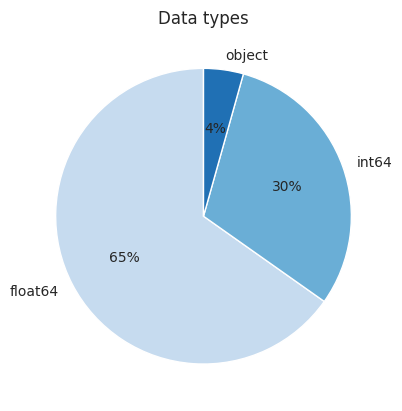

In [34]:
# Visualization data types
tools_dataframe.visu_dataTypes(info_cred_card_balance)

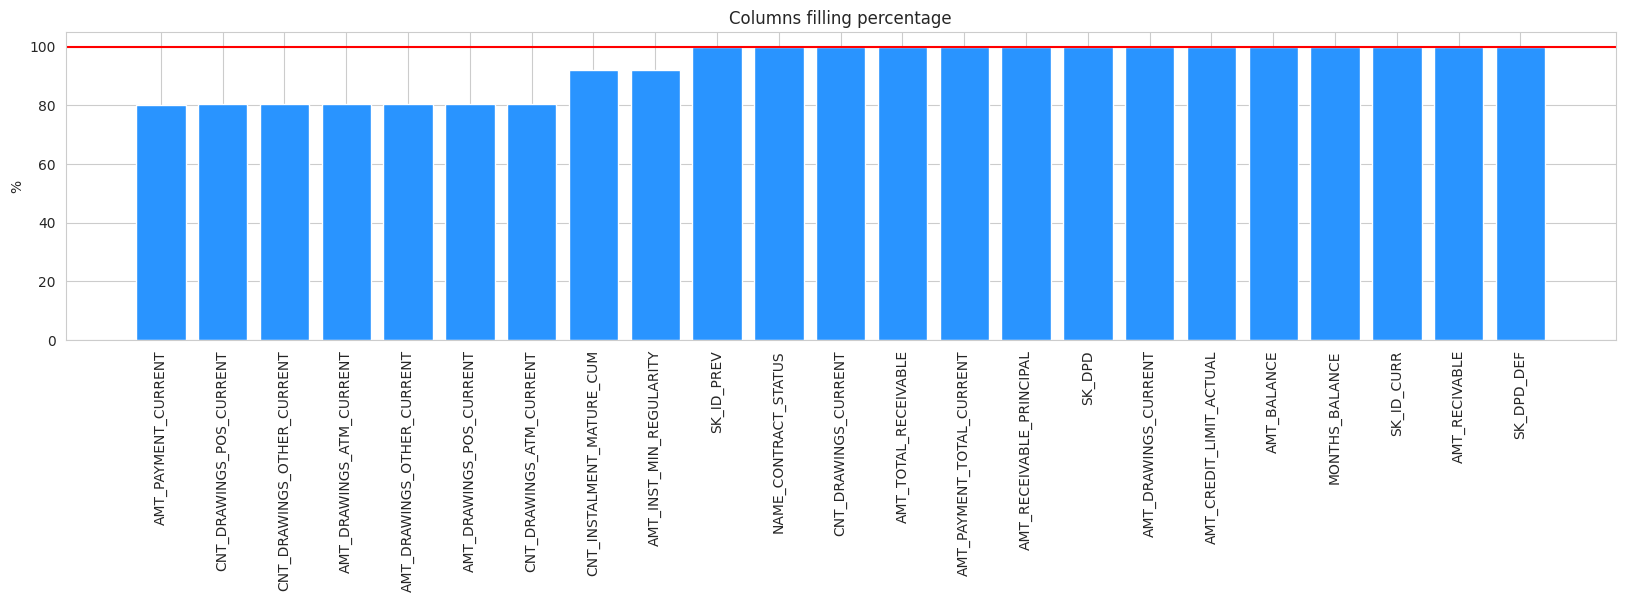

In [35]:
# Visualization column filling
tools_dataframe.column_filling_visu(info_cred_card_balance)

**Observations and Conclusions**

<ol><li>There are around 3.84M rows in the table credit_card_balance.csv, each of which corresponds to the monthly status of the Credit Card which the applicant had with Home Credit Group. This table contains 23 features which contain the statistics about each month's Credit Card status, such as Balance amount, Amount of Drawings, Number of drawings, status, etc.</li>
    <li>There are 104.3k unique Credit Cards whose details are in this table.</li>
    <li>Out of these 104.3k there are 103.5k unique SK_ID_CURR. What this means is that most of the applicants had just 1 credit card with them, and only few of them had more than 1. These SK_ID_CURR are the ID of the applicants who have currently applied for loan.</li>
    <li>Out of the 103k unique SK_ID_CURR, 86.9k of these applicants belong to the training set, and 16.6k belong to test application set.</li>
    <li>Out of 307k applicants in application_train table, only 86.9k of those had a credit card previously with Home Credit Group.

<ol><li>Out of the 23 features, 9 of these features contain some NaN values.</li>
    <li>If we look at the percentages of NaN values, they are considerably lower than the rest of the tables we have seen so far.</li>
    <li>7 of these features have close to 20% NaN values. These features are mostly related to the Amounts of Drawing and Counts of Drawings. Other two of the features are related to the installments statistics.</li></ol>

<b>Merging the TARGETS from application_train to credit_card_balance table.</b>

In [36]:
print("Merging TARGET with credit_card_balance Table")
cc_balance_merged = application_train.iloc[:,:2].merge(cc_balance, on = 'SK_ID_CURR', how = 'left')

Merging TARGET with credit_card_balance Table


<a id='cc_balance_plot_conti_vari'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Plotting continous variables</span></span>

Firstly we will group by the 'SK_ID_PREV' field and aggregate with mean, so that we get an averaged row for each of the previous loan that the client had.

In [39]:
cc_balance_merged = cc_balance_merged.groupby('SK_ID_PREV').mean()

/tmp/ipykernel_31368/1022205764.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<b><u>Distribution of Continuous Vairable AMT_BALANCE</u></b>

This column provided the average amount of balance that a person usually had on his credit card loan account for previous loan.

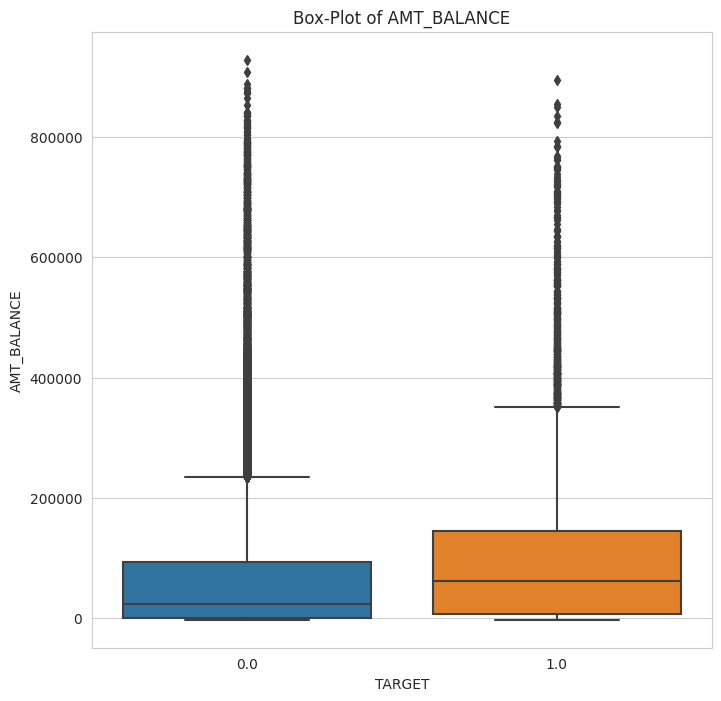

In [40]:
EDA_kernel_kaggle.plot_continuous_variables(cc_balance_merged, 'AMT_BALANCE',
                                            plots = ['box'], figsize = (8,8))

**Observations and Conclusions**

* From the above plot, it can be seen that the Defaulters have a higher value of AMT_BALANCE as compared to Non-Defaulters. They show a higher values of all the quantiles and even the whiskers. This could imply that the Credit amount for Defaulters could also be relatively higher as compared to Non-Defaulters.
* We see that the Defaulters here too appeared to have a higher minimum installment each month as compared to Non-Defaulters. This usually tells about the spending and borrowing habbit of the people. The defaulters show a higher spending and borrowing habits as compared to Non-Defaulters.

<b><u>Distribution of Continuous Vairable AMT_TOTAL_RECEIVABLE</u></b>

This column describes the average of total amount receivable on the previous credit.

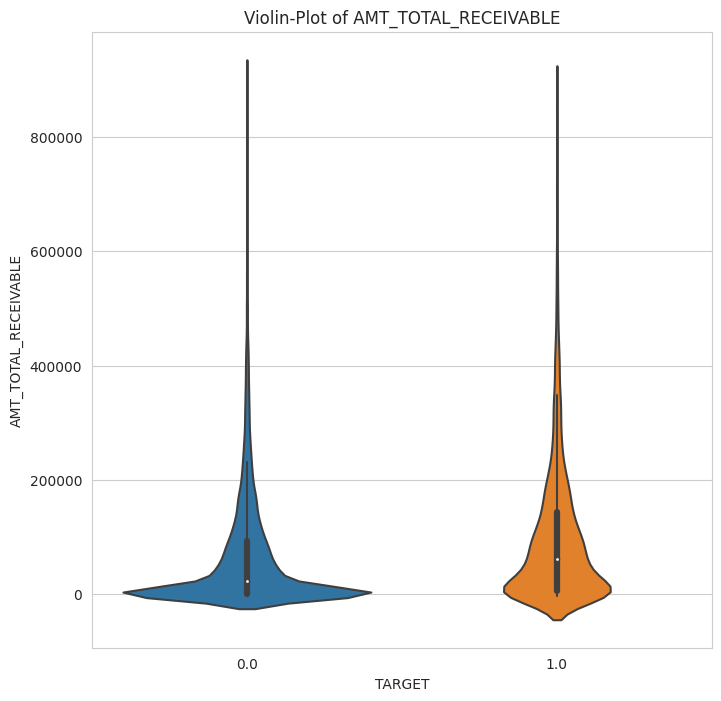

In [41]:
EDA_kernel_kaggle.plot_continuous_variables(cc_balance_merged,
                                            'AMT_TOTAL_RECEIVABLE',
                                            plots = ['violin'],
                                            figsize = (8,8))

**Observations and Conclusions**

Looking at the box plot of AMT_TOTAL_RECEIVABLE, we see a similar behavious as seen with other amounts as well, which is that the Defaulters usually had higher Amount Receivable on their previous credit, which may imply the higher amounts of credits that they may have taken. The PDF also shows a very higher peak at lower amounts for Non-Defaulters as compared to Defaulters.

<b><u>Distribution of Continuous Vairable CNT_INSTALMENT_MATURE_CUM</u></b>

The column describes about the average number of installments paid on the previous credits.

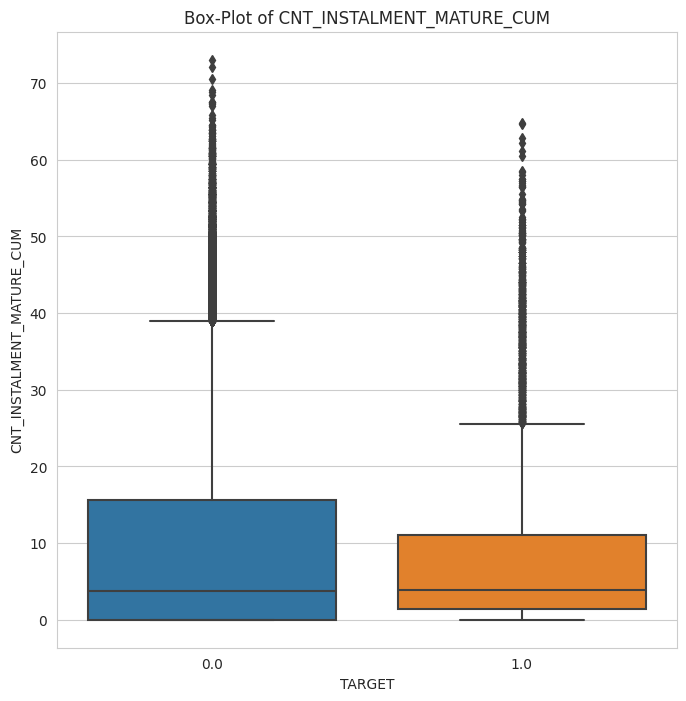

In [42]:
EDA_kernel_kaggle.plot_continuous_variables(cc_balance_merged,
                                            'CNT_INSTALMENT_MATURE_CUM',
                                            plots = ['box'], figsize = (8,8))

**Observations and Conclusions**

From the above plot, we see a very interesting behaviour. This plot shows that the Non-Defaulters usually had higher range of values for the number of installments paid as compared to Defaulters. This might show the defaulting behaviour, where in the defaulters usually would pay fewer number of installments on their previous credit.

<a id='credit_card_balance_correlation_matrix'></a>

---
### <span style='background:#0075bc'><span style='color:white'>Correlation matrix</span></span>

/home/raquelsp/Documents/Openclassrooms/P7_implementez_modele_scoring/P7_travail/P7_scoring_credit/EDA_kernel_kaggle.py:467: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



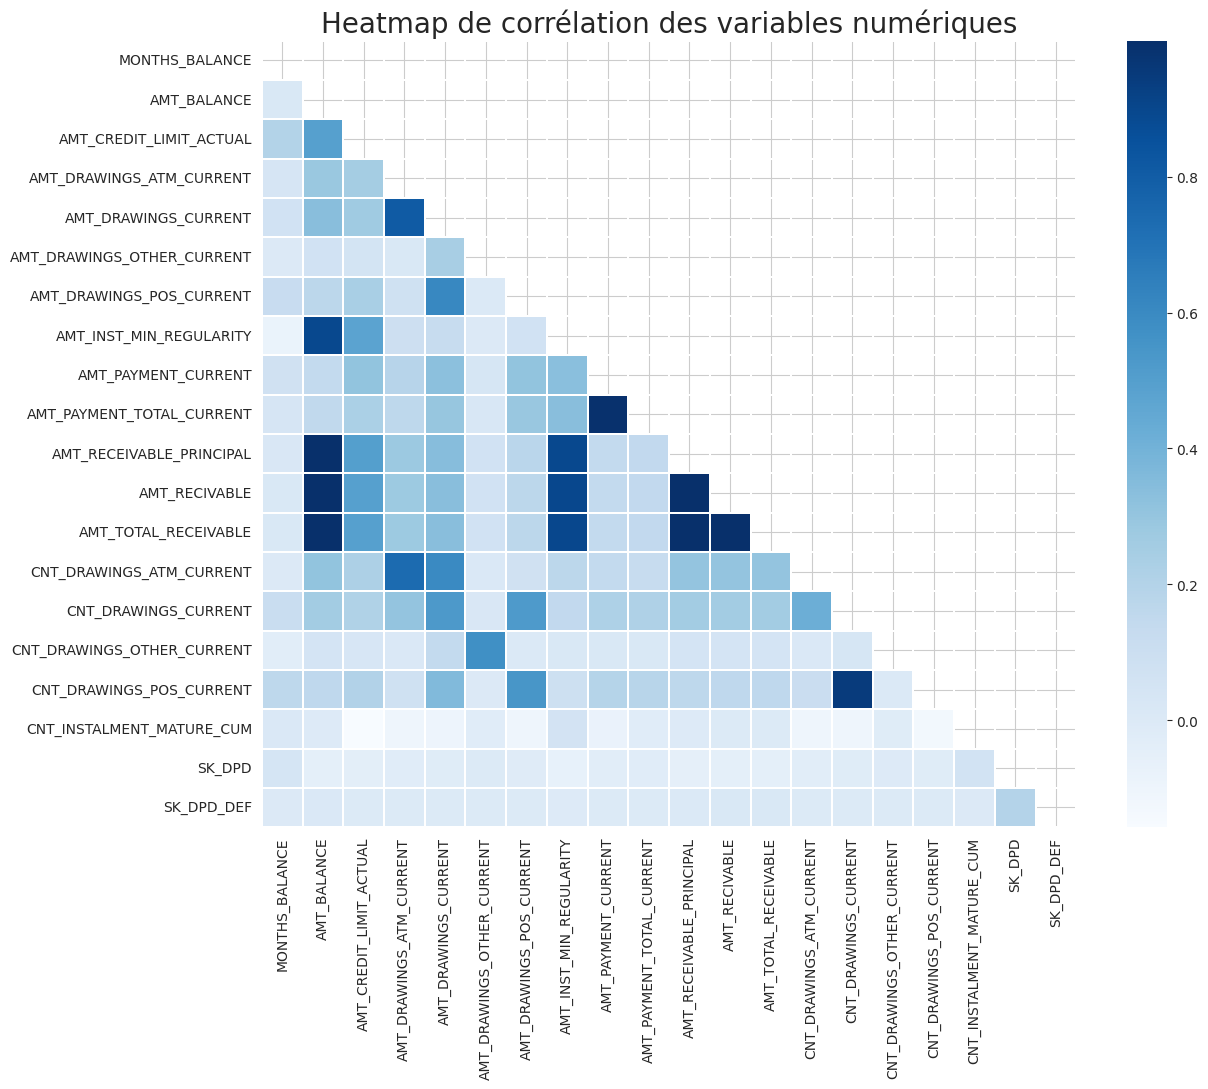

In [37]:
corr_mat = EDA_kernel_kaggle.correlation_matrix(cc_balance_merged,
                                                ['SK_ID_CURR','SK_ID_PREV'],
                                                figsize = (13,11))
corr_mat.plot_correlation_matrix()

In [38]:
#Seeing the top columns with highest phik-correlation with the target variable in credit_card_balance table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)

interval columns not set, guessing: ['TARGET', 'MONTHS_BALANCE']
interval columns not set, guessing: ['TARGET', 'AMT_BALANCE']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT_LIMIT_ACTUAL']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_ATM_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_OTHER_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_DRAWINGS_POS_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_INST_MIN_REGULARITY']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_PAYMENT_TOTAL_CURRENT']
interval columns not set, guessing: ['TARGET', 'AMT_RECEIVABLE_PRINCIPAL']
interval columns not set, guessing: ['TARGET', 'AMT_RECIVABLE']
interval columns not set, guessing: ['TARGET', 'AMT_TOTAL_RECEIVABLE']
interval columns not set, guessing: ['TARGET', 'CNT_DRAWINGS_ATM_CURREN

Column Name  Phik-Correlation
1                 AMT_BALANCE          0.059838
11              AMT_RECIVABLE          0.059311
12       AMT_TOTAL_RECEIVABLE          0.059287
10   AMT_RECEIVABLE_PRINCIPAL          0.058895
0              MONTHS_BALANCE          0.050360
7     AMT_INST_MIN_REGULARITY          0.042174
17  CNT_INSTALMENT_MATURE_CUM          0.038261
13   CNT_DRAWINGS_ATM_CURRENT          0.030052
2     AMT_CREDIT_LIMIT_ACTUAL          0.028752
14       CNT_DRAWINGS_CURRENT          0.027868

**Observations and Conclusions:**

<ol>
    <li>The heatmap above shows visually the correlation among features in credit_card_balance table.</li>
    <li>From the heatmap of correlation matrix, we see a few couples of highly correlated features. These are:
        <ul><li>AMT_RECEIVABLE_PRINCIPLE, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE and AMT_BALANCE</li>
            <li>We also observe high correlation between these 3 AMT_RECEIVABLE columns</li>
            <li>AMT_PAYMENT_TOTAL_CURRENT and AMT_PAYMENT_CURRENT</li>
        </ul></li>
    <li>The sets of 2nd and 3rd correlating features are understandable because they more or less the same tale.</li>
    <li>The correlation of features with Target isn't noticeable, this shows the absence of a linear relationship between the feature and the target variable.</li></ol>

<a id='conclusions_EDA'></a>

---
---

# <span style='background:#2994ff'><span style='color:white'>**Conclusions from EDA** </span></span>


From the Exhaustive Exporatory Data Analysis that we performed, we can draw some high level conclusions of our given dataset.
* Firstly, the whole dataset will need to be merged together with some ingenious way for the merged data to make sense.
* All datasets present an important quantity of missing values.
* It is imperative to use smart ways of handling missing values as most of the machine learning algorithms cannot inherently handle them, except for Boosting Models, i.e. XGBoost and LightGBM, which treat the NaNs as a separate category.
* Some categories are very well discriminatory between the Defaulters and Non-Defaulters, which could be important for the purpose of classification.
* There are few Continuous Numerical Variables which contain Erroneous points, we would have to handle those points.
* We also noticed some correlated features, which would just be increasing the dimensionality of data, and not add much value. We would want to remove such features.
* Overall the dataset is Imbalanced, and we would need to come up with techniques to handle such imbalance.
* For Default Risk prediction, the Defaulters usually tend to have some behaviour which is not normal, and thus, we cannot remove outliers or far-off points, as they may suggest some important Defaulting tendency.
* With all these insights, we will move to Data Cleaning and Feature Engineering task.